In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd 

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [54]:
df = pd.read_csv('../data/processed/complete_merged.csv')

In [55]:
# Basic information about the merged dataset
print("Dataset Shape:", df.shape)
print("\nColumn Information:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (696, 79)

Column Information:
Country                                                                                                     object
Year                                                                                                       float64
Agricultural production index (2014-2016=100)                                                              float64
Balance of payments, current account (million US$)                                                         float64
CPI: Consumer Price Index (2010=100)                                                                       float64
Economy: Agriculture (% of Gross Value Added)                                                              float64
Economy: Industry (% of Gross Value Added)                                                                 float64
Economy: Services and other activity (% of GVA)                                                            float64
Employment in agriculture (% of em

In [56]:
# Descriptive statistics for numerical variables
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Descriptive Statistics for Numerical Variables:")
df[numeric_cols].describe()

Descriptive Statistics for Numerical Variables:


/Users/kenjiminemura/.pyenv/versions/3.12.4/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/kenjiminemura/.pyenv/versions/3.12.4/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Year  Agricultural production index (2014-2016=100)  \
count   696.000000                                     594.000000   
mean   2019.666667                                     105.727273   
std       3.684435                                      15.708872   
min    2015.000000                                      64.000000   
25%    2015.000000                                      99.000000   
50%    2020.000000                                     102.000000   
75%    2024.000000                                     112.000000   
max    2024.000000                                     220.000000   

       Balance of payments, current account (million US$)  \
count                                         562.000000    
mean                                        14418.112100    
std                                         55979.475881    
min                                             0.000000    
25%                                           331.000000    
50%                                          1509.000000    
75%                                          6107.000000    
max                                        818822.000000    

       CPI: Consumer Price Index (2010=100)  \
count                            586.000000   
mean                             539.167235   
std                             4690.865029   
min                               88.000000   
25%                              111.000000   
50%                              127.000000   
75%                              155.000000   
max                            93584.000000   

       Economy: Agriculture (% of Gross Value Added)  \
count                                     621.000000   
mean                                       11.336071   
std                                        11.960299   
min                                         0.000000   
25%                                         2.400000   
50%                                         7.600000   
75%                                        18.000000   
max                                        75.600000   

       Economy: Industry (% of Gross Value Added)  \
count                                  630.000000   
mean                                    26.722381   
std                                     11.619798   
min                                      4.500000   
25%                                     18.425000   
50%                                     25.800000   
75%                                     33.675000   
max                                     69.800000   

       Economy: Services and other activity (% of GVA)  \
count                                       630.000000   
mean                                         62.090635   
std                                          14.917319   
min                                          16.400000   
25%                                          52.325000   
50%                                          61.200000   
75%                                          72.875000   
max                                          94.500000   

       Employment in agriculture (% of employed)  \
count                                 578.000000   
mean                                   23.210727   
std                                    21.462605   
min                                     0.100000   
25%                                     4.125000   
50%                                    16.700000   
75%                                    36.575000   
max                                    86.300000   

       Employment in industry (% of employed)  \
count                              579.000000   
mean                                19.493264   
std                                  7.646032   
min                                  3.100000   
25%                                 14.300000   
50%                                 19.200000   
75%                                 24.000000   
max                                 54.100000   

 

In [57]:
df["Life expectancy at birth - average"] = (df["Life expectancy at birth - Female (years)"] + df["Life expectancy at birth - Male (years)"])/2
df.head()

Country    Year  Agricultural production index (2014-2016=100)  \
0  Afghanistan  2015.0                                           96.0   
1  Afghanistan  2020.0                                          112.0   
2  Afghanistan  2024.0                                          111.0   
3      Albania  2015.0                                          100.0   
4      Albania  2020.0                                          106.0   

   Balance of payments, current account (million US$)  \
0                                             4193.0    
1                                             3137.0    
2                                                NaN    
3                                              980.0    
4                                             1315.0    

   CPI: Consumer Price Index (2010=100)  \
0                                 133.0   
1                                 150.0   
2                                   NaN   
3                                 111.0   
4                                 121.0   

   Economy: Agriculture (% of Gross Value Added)  \
0                                           22.0   
1                                           31.4   
2                                           35.5   
3                                           22.5   
4                                           21.9   

   Economy: Industry (% of Gross Value Added)  \
0                                         9.6   
1                                        13.6   
2                                        16.9   
3                                        24.8   
4                                        22.9   

   Economy: Services and other activity (% of GVA)  \
0                                             68.3   
1                                             55.0   
2                                             47.5   
3                                             52.7   
4                                             55.1   

   Employment in agriculture (% of employed)  \
0                                       44.6   
1                                       46.0   
2                                       46.6   
3                                       41.3   
4                                       36.2   

   Employment in industry (% of employed)  \
0                                    20.7   
1                                    18.5   
2                                    18.3   
3                                    18.7   
4                                    20.6   

   Employment in services (% employed)  \
0                                 34.7   
1                                 35.5   
2                                 35.1   
3                                 40.0   
4                                 43.2   

   GDP growth rate (annual %, const. 2015 prices)  \
0                                             2.5   
1                                             2.1   
2                                             6.2   
3                                             2.2   
4                                             3.5   

   GDP per capita (current US$)  \
0                         554.0   
1                         512.7   
2                         344.6   
3                        3950.4   
4                        5289.0   

   GDP: Gross domestic product (million current US$)  \
0                                            18700.0   
1                                            19983.0   
2                                            14175.0   
3                                            11387.0   
4                                            15163.0   

   International trade: balance (million current US$)  \
0                                             7151.0    
1                                             7484.0    
2                                             4337.0    
3                                             2391.0    
4                                             2995.0    

   Interna

# Análisis Exploratorio de Datos (EDA)

## 1. Análisis de Variables Categóricas

Primero vamos a analizar las variables categóricas del dataset.

In [58]:
# Análisis de variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
print("Variables categóricas:", list(categorical_cols))
print("\n" + "="*50)

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"Valores únicos: {df[col].nunique()}")
    print("Distribución de frecuencias:")
    value_counts = df[col].value_counts()
    print(value_counts.head(10))  # Top 10 most frequent values
    print("-" * 30)

Variables categóricas: ['Country', 'Capital city', 'National currency', 'Region', 'UN membership date']


Country:
Valores únicos: 232
Distribución de frecuencias:
Country
Afghanistan                 3
Panama                      3
New Caledonia               3
New Zealand                 3
Nicaragua                   3
Niger                       3
Nigeria                     3
Niue                        3
North Macedonia             3
Northern Mariana Islands    3
Name: count, dtype: int64
------------------------------

Capital city:
Valores únicos: 232
Distribución de frecuencias:
Capital city
Kabul          3
Panama City    3
Nouméa         3
Wellington     3
Managua        3
Niamey         3
Abuja          3
Alofi          3
Skopje         3
Garapan        3
Name: count, dtype: int64
------------------------------

National currency:
Valores únicos: 156
Distribución de frecuencias:
National currency
Euro (EUR)                    93
US Dollar (USD)               45
E. Caribbean D

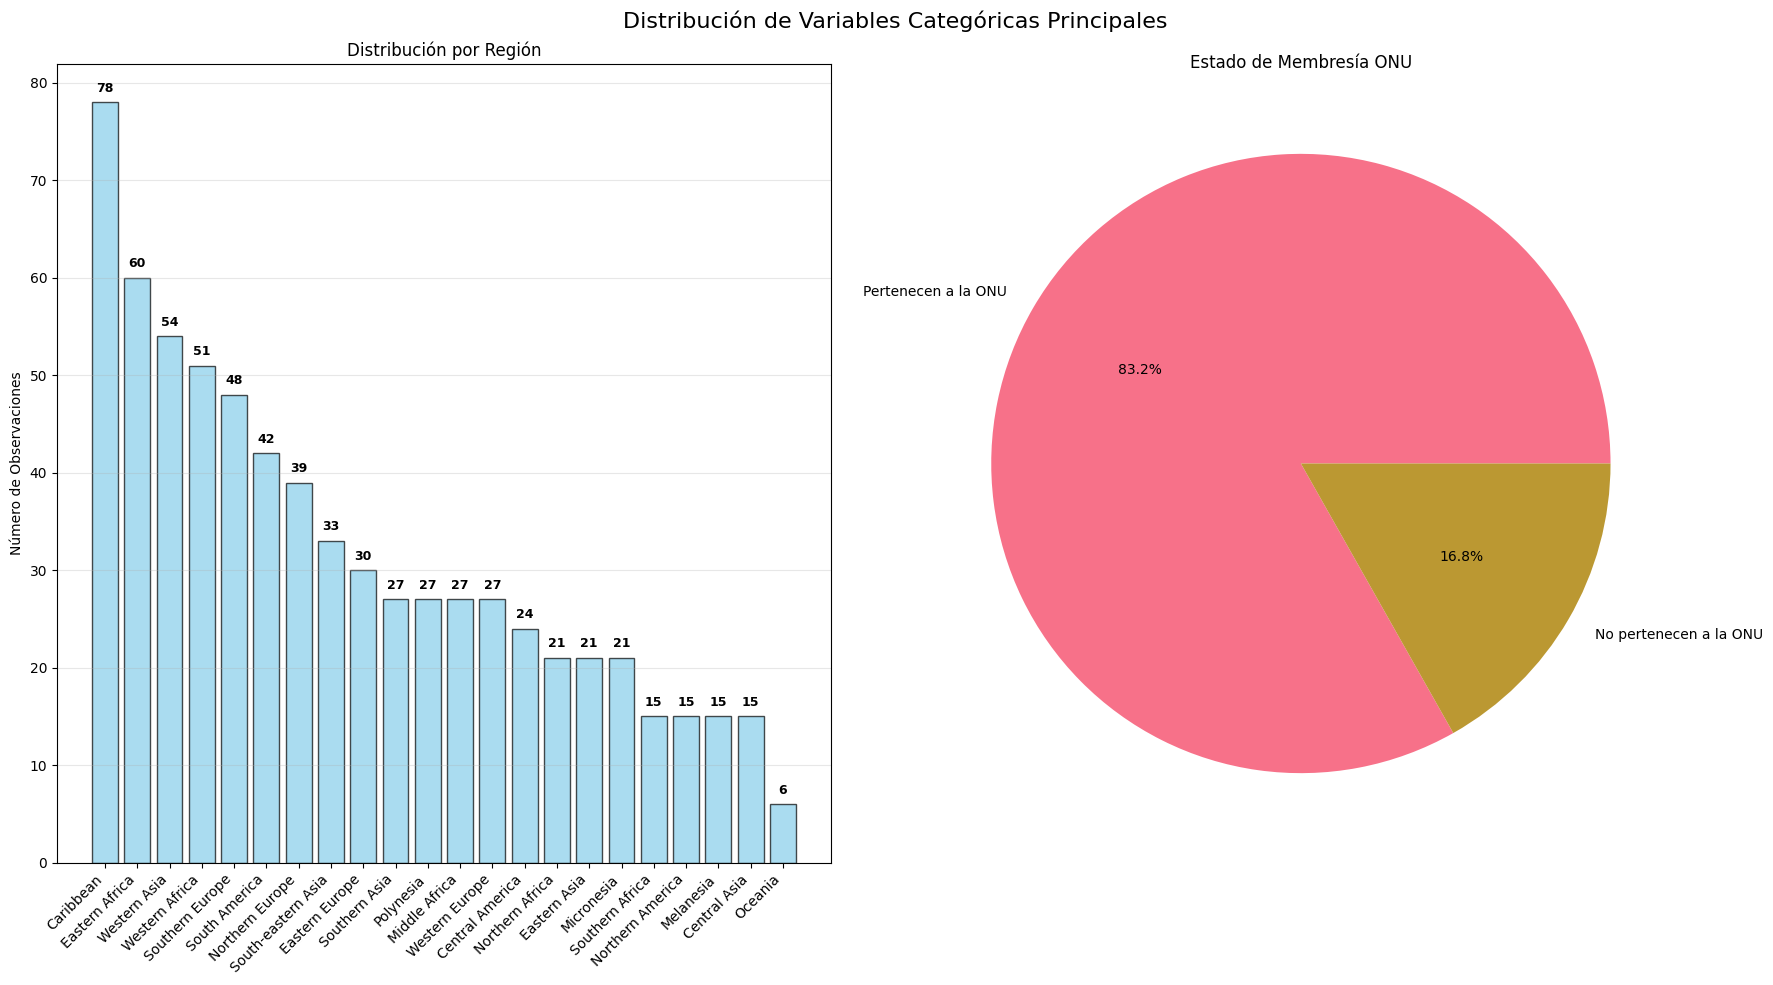

In [59]:
# Visualización de variables categóricas importantes
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Distribución de Variables Categóricas Principales', fontsize=16)

# Región - Bar Plot
region_counts = df['Region'].value_counts()
axes[0].bar(range(len(region_counts)), region_counts.values, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xticks(range(len(region_counts)))
axes[0].set_xticklabels(region_counts.index, rotation=45, ha='right', fontsize=10)
axes[0].set_ylabel('Número de Observaciones')
axes[0].set_title('Distribución por Región')
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, v in enumerate(region_counts.values):
    axes[0].text(i, v + max(region_counts.values) * 0.01, str(v), 
                ha='center', va='bottom', fontsize=9, fontweight='bold')

# UN membership status - This variable tells us whether the country is a member of the UN or not
membership_status = df['UN membership date'].isna().value_counts()
axes[1].pie([membership_status[False], membership_status[True]], 
               labels=['Pertenecen a la ONU', 'No pertenecen a la ONU'], 
               autopct='%1.1f%%')
axes[1].set_title('Estado de Membresía ONU')

plt.tight_layout()
plt.savefig("../src/visualization/categorical_distribution.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Poblacion

/var/folders/84/rzj502rs77q4skxhxghrfkx00000gn/T/ipykernel_22490/4126312425.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_pop, x='Population_M', y='Region', palette='viridis', ax=axes[0])
/var/folders/84/rzj502rs77q4skxhxghrfkx00000gn/T/ipykernel_22490/4126312425.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x="Population_M", y='Country', palette='plasma', ax=axes[1])


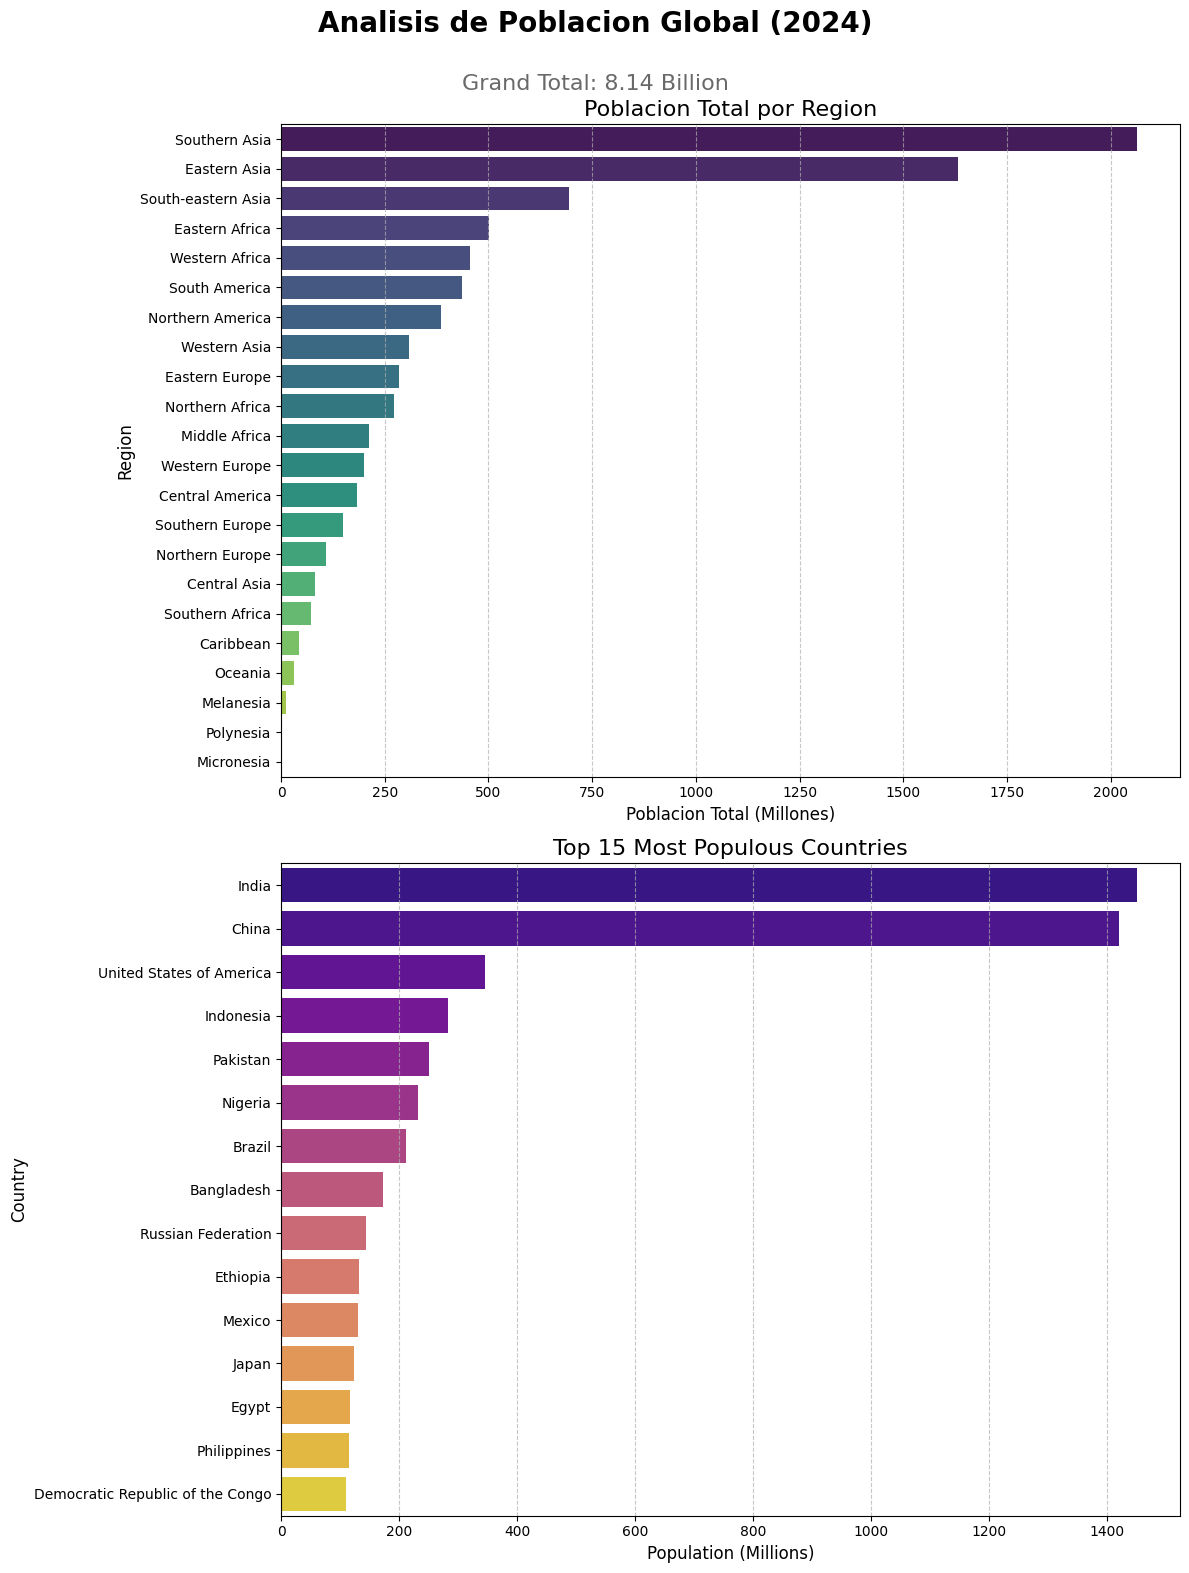

In [60]:
pop_column = 'Population (000, 2024)'
pop_analysis = df[['Country', "Region",'Year', pop_column]].dropna()
latest_pop_data = pop_analysis.loc[pop_analysis.groupby('Country')['Year'].idxmax()].copy()

latest_pop_data['Population_M'] = latest_pop_data[pop_column] / 1000
region_pop = latest_pop_data.groupby('Region')['Population_M'].sum().sort_values(ascending=False).reset_index()

total_world_population = latest_pop_data['Population_M'].sum()
grand_total_billions = total_world_population / 1000
total_text = f"Grand Total: {grand_total_billions:.2f} Billion"

# Create the data for the second plot (Top 15 Countries)
top_n = 15
top_countries = latest_pop_data.sort_values('Population_M', ascending=False).head(top_n)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 16))

# --- Plot 1: Total Population by Region (on the first axis: axes[0]) ---
sns.barplot(data=region_pop, x='Population_M', y='Region', palette='viridis', ax=axes[0])
axes[0].set_title('Poblacion Total por Region', fontsize=16)
axes[0].set_xlabel('Poblacion Total (Millones)', fontsize=12)
axes[0].set_ylabel('Region', fontsize=12)
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# --- Plot 2: Top N Most Populous Countries (on the second axis: axes[1]) ---
sns.barplot(data=top_countries, x="Population_M", y='Country', palette='plasma', ax=axes[1])
axes[1].set_title(f'Top {top_n} Most Populous Countries', fontsize=16)
axes[1].set_xlabel('Population (Millions)', fontsize=12)
axes[1].set_ylabel('Country', fontsize=12)
axes[1].grid(axis='x', linestyle='--', alpha=0.7)


fig.suptitle('Analisis de Poblacion Global (2024)', fontsize=20, weight='bold')
fig.text(
    0.5, 
    0.93,
    total_text,
    ha='center',
    fontsize=16,
    color='dimgray'
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("../src/visualization/population.png", dpi=300,bbox_inches='tight', facecolor='white')
plt.show()

In [61]:
col_list = [
    'Country', 
    'Year', 
    'Agricultural production index (2014-2016=100)',
    'Balance of payments, current account (million US$)',
    'CPI: Consumer Price Index (2010=100)',
    'Economy: Agriculture (% of Gross Value Added)',
    'Economy: Industry (% of Gross Value Added)',
    'Economy: Services and other activity (% of GVA)',
    'Employment in agriculture (% of employed)',
    'Employment in industry (% of employed)',
    'Employment in services (% employed)',
    'GDP growth rate (annual %, const. 2015 prices)',
    'GDP per capita (current US$)',
    'GDP: Gross domestic product (million current US$)',
    'International trade: balance (million current US$)',
    'International trade: exports (million current US$)',
    'International trade: imports (million current US$)',
    'Unemployment (% of labour force)',
    'Labour force participation rate - Female (per 100 pop.)',
    'Labour force participation rate - Male (per 100 pop.)',
    'Labour force participation rate - Female/Labour force participation rate - Male Ratio',
    'Education: Government expenditure (% of GDP)',
    'Fertility rate, total (live births per woman)',
    'Health: Current expenditure (% of GDP)',
    'Health: Physicians (per 1 000 pop.)',
    'Intentional homicide rate (per 100 000 pop.)',
    'Population growth rate (average annual %)',
    'Refugees and others of concern to UNHCR (000)',
    'Seats held by women in national parliaments (%)',
    'Under five mortality rate (per 1000 live births)',
    'Urban population (% of total population)',
    'Urban population growth rate (average annual %)',
    'Education: Primary gross enrol. ratio - Female (per 100 pop.)',
    'Education: Primary gross enrol. ratio - Male (per 100 pop.)',
    'Education: Primary gross enrol. ratio - Female/Education: Primary gross enrol. ratio - Male Ratio',
    'Education: Upper Sec. gross enrol. ratio - Female (per 100 pop.)',
    'Education: Upper Sec. gross enrol. ratio - Male (per 100 pop.)',
    'Education: Upper Sec. gross enrol. ratio - Female/Education: Upper Sec. gross enrol. ratio - Male Ratio',
    'Education: Lower Sec. gross enrol. ratio - Female (per 100 pop.)',
    'Education: Lower Sec. gross enrol. ratio - Male (per 100 pop.)',
    'Education: Lower Sec. gross enrol. ratio - Female/Education: Lower Sec. gross enrol. ratio - Male Ratio',
    'International migrant stock (000)',
    'International migrant stock (% of total pop.)',
    'International migrant stock/International migrant stock Ratio',
    'Life expectancy at birth - Female (years)',
    'Life expectancy at birth - Male (years)',
    'Life expectancy at birth - Female/Life expectancy at birth - Male Ratio',
    'Population age distribution - 0-14 years (%)',
    'Population age distribution - 60+ years (%)',
    'Population age distribution - 0-14 years/Population age distribution - 60+ years Ratio',
    'Energy production, primary (Petajoules)',
    'Energy supply per capita (Gigajoules)',
    'Forested area (% of land area)',
    'Important sites for terrestrial biodiversity protected (%)',
    'Individuals using the Internet (per 100 inhabitants)',
    'Net Official Development Assist. disbursed (% of GNI)',
    'Net Official Development Assist. received (% of GNI)',
    'Research & Development expenditure (% of GDP)',
    'Threatened species (number)',
    'Tourist/visitor arrivals at national borders (000)',
    'CO2 emission estimates - Total (million tons)',
    'CO2 emission estimates - Per capita (tons per capita)',
    'CO2 emission estimates - Total/CO2 emission estimates - Per capita Ratio',
    'Pop. using safely managed drinking water - Urban (%)',
    'Pop. using safely managed drinking water - Rural (%)',
    'Pop. using safely managed drinking water - Urban/Pop. using safely managed drinking water - Rural Ratio',
    'Pop. using safely managed sanitation - Urban (%)',
    'Pop. using safely managed sanitation - Rural (%)',
    'Pop. using safely managed sanitation - Urban/Pop. using safely managed sanitation - Rural Ratio',
    'Capital city', 'Exchange rate (per US$)', 'National currency',
    'Pop. density (per km2, 2024)', 'Population (000, 2024)', 'Region',
    'Sex ratio (m per 100 f)', 'Surface area (km2)', 'UN membership date',
    'Capital_city_pop', 'Life expectancy at birth - average',
       ]

df["Education: Primary gross enrol. ratio - average"] = (df["Education: Primary gross enrol. ratio - Female (per 100 pop.)"] + df["Education: Primary gross enrol. ratio - Male (per 100 pop.)"]) / 2
df["Education: Primary gross enrol. ratio - brecha"] = df["Education: Primary gross enrol. ratio - Female (per 100 pop.)"] - df["Education: Primary gross enrol. ratio - Male (per 100 pop.)"]
df["Education: Upper Sec. gross enrol. ratio - average"] = (df["Education: Upper Sec. gross enrol. ratio - Female (per 100 pop.)"] + df['Education: Upper Sec. gross enrol. ratio - Male (per 100 pop.)']) / 2
df["Education: Upper Sec. gross enrol brecha"] = df["Education: Upper Sec. gross enrol. ratio - Female (per 100 pop.)"] - df["Education: Upper Sec. gross enrol. ratio - Male (per 100 pop.)"]
df["Education: Lower Sec. gross enrol. ratio - average"] = (df["Education: Lower Sec. gross enrol. ratio - Female (per 100 pop.)"] + df["Education: Lower Sec. gross enrol. ratio - Male (per 100 pop.)"]) / 2
df["Education: Lower Sec. gross enrol brecha"] = df["Education: Lower Sec. gross enrol. ratio - Female (per 100 pop.)"] - df["Education: Lower Sec. gross enrol. ratio - Male (per 100 pop.)"]


In [62]:
# Crear agrupaciones de regiones más manejables para el análisis
region_mapping = {
    # EUROPA (4 regiones → 1 grupo)
    'Southern Europe': 'Europa',
    'Western Europe': 'Europa', 
    'Eastern Europe': 'Europa',
    'Northern Europe': 'Europa',
    
    # ASIA (5 regiones → 1 grupo)
    'Southern Asia': 'Asia',
    'Western Asia': 'Asia',
    'South-eastern Asia': 'Asia',
    'Eastern Asia': 'Asia',
    'Central Asia': 'Asia',
    
    # ÁFRICA (4 regiones → 1 grupo)
    'Northern Africa': 'África',
    'Middle Africa': 'África',
    'Western Africa': 'África',
    'Southern Africa': 'África',
    'Eastern Africa': 'África',
    
    # AMÉRICAS (4 regiones → 1 grupo)
    'Northern America': 'Norteamérica',
    'Central America': 'Norteamérica',
    'Caribbean': 'Norteamérica',
    'South America': 'Sudamérica',
    
    # OCEANÍA (4 regiones → 1 grupo)
    'Oceania': 'Oceanía',
    'Polynesia': 'Oceanía',
    'Melanesia': 'Oceanía',
    'Micronesia': 'Oceanía'
}

# Aplicar el mapeo
df['Region_Grouped'] = df['Region'].map(region_mapping)

### Education

In [63]:
df_edu = df[["Country","Year","Region_Grouped","Education: Primary gross enrol. ratio - average","Education: Lower Sec. gross enrol. ratio - average","Education: Upper Sec. gross enrol. ratio - average",
             "Education: Primary gross enrol. ratio - brecha","Education: Lower Sec. gross enrol brecha","Education: Upper Sec. gross enrol brecha"]].dropna()
df_edu.rename(columns={
    "Education: Primary gross enrol. ratio - average": "Ratio Matriculación Primaria",
    "Education: Lower Sec. gross enrol. ratio - average": "Ratio Matriculación Secundaria Baja",
    "Education: Upper Sec. gross enrol. ratio - average": "Ratio Matriculación Secundaria Alta",
    "Education: Primary gross enrol. ratio - brecha": "Brecha Matriculación Primaria",
    "Education: Lower Sec. gross enrol brecha": "Brecha Matriculación Secundaria Baja",
    "Education: Upper Sec. gross enrol brecha": "Brecha Matriculación Secundaria Alta"
}, inplace=True)
df_edu = df_edu[df_edu['Year'] == 2024].copy()
df_edu.head()

Country    Year Region_Grouped  Ratio Matriculación Primaria  \
5     Albania  2024.0         Europa                         95.60   
14    Andorra  2024.0         Europa                         90.15   
26  Argentina  2024.0     Sudamérica                        110.20   
29    Armenia  2024.0           Asia                         92.90   
35  Australia  2024.0        Oceanía                         99.10   

    Ratio Matriculación Secundaria Baja  Ratio Matriculación Secundaria Alta  \
5                                 94.80                                96.65   
14                                95.35                               101.85   
26                               127.25                               105.90   
29                               101.60                                88.00   
35                               109.00                               185.00   

    Brecha Matriculación Primaria  Brecha Matriculación Secundaria Baja  \
5                            -5.8                                  -6.8   
14                           -0.5                                  -2.7   
26                            2.8                                   4.3   
29                           -1.2                                  -1.0   
35                            0.2                                  -3.0   

    Brecha Matriculación Secundaria Alta  
5                                  -10.5  
14                                   3.7  
26                                   9.2  
29                                   2.2  
35                                 -10.0

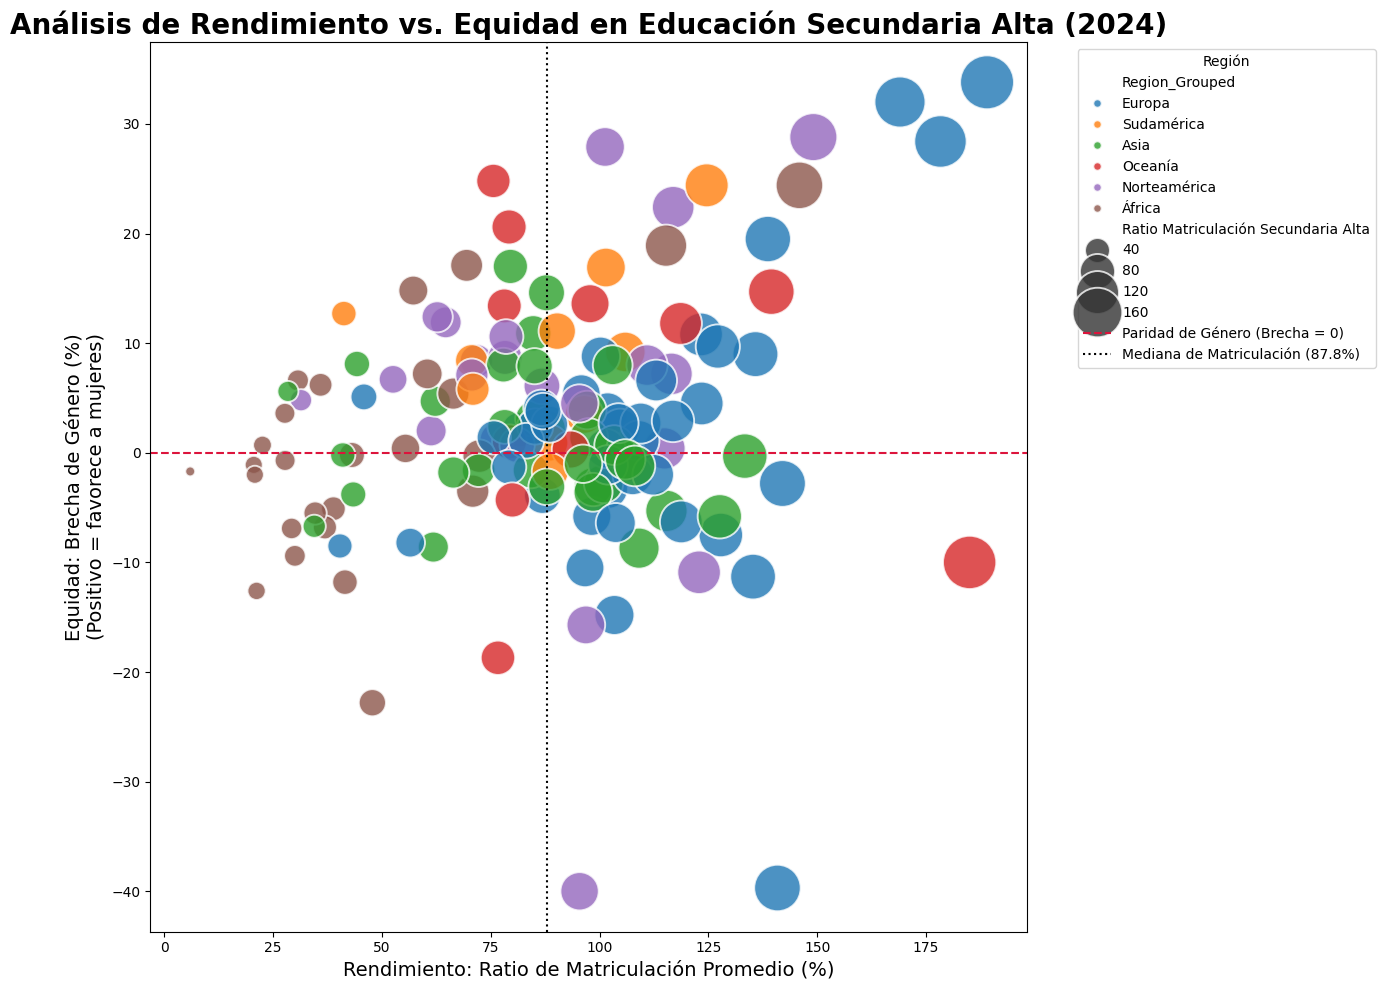

In [64]:
plt.figure(figsize=(16, 10))

# Crear el gráfico de dispersión (bubble chart)
scatter_plot = sns.scatterplot(
    data=df_edu,
    x="Ratio Matriculación Secundaria Alta",
    y="Brecha Matriculación Secundaria Alta",
    hue="Region_Grouped",  # Color para cada región
    size="Ratio Matriculación Secundaria Alta",  # El tamaño de la burbuja representa el ratio
    sizes=(50, 1500),  # Rango de tamaño de las burbujas
    alpha=0.8,
    palette='tab10' # Una paleta de colores vibrante
)

# Línea de Equidad de Género (Brecha = 0)
plt.axhline(0, color='crimson', linestyle='--', linewidth=1.5, label='Paridad de Género (Brecha = 0)')

# Línea de Rendimiento Promedio (Mediana del ratio de matriculación)
median_ratio = df_edu["Ratio Matriculación Secundaria Alta"].median()
plt.axvline(median_ratio, color='black', linestyle=':', linewidth=1.5, label=f'Mediana de Matriculación ({median_ratio:.1f}%)')


# --- Personalización y Títulos ---
plt.title('Análisis de Rendimiento vs. Equidad en Educación Secundaria Alta (2024)', fontsize=20, weight='bold')
plt.xlabel('Rendimiento: Ratio de Matriculación Promedio (%)', fontsize=14)
plt.ylabel('Equidad: Brecha de Género (%)\n(Positivo = favorece a mujeres)', fontsize=14)

# Mover la leyenda fuera del gráfico para no obstruir los datos
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Región')

plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajustar el layout para dar espacio a la leyenda
plt.savefig("../src/visualization/education.png", dpi=300,bbox_inches='tight', facecolor='white')
plt.show()

## 2. Análisis de Variables Numéricas - Distribuciones

In [65]:
# Seleccionar variables clave para análisis detallado

key_variables = [
    "GDP per capita (current US$)",
    "GDP growth rate (annual %, const. 2015 prices)",
    "Unemployment (% of labour force)",
    "Health: Physicians (per 1 000 pop.)",
    "Life expectancy at birth - average",
    "Intentional homicide rate (per 100 000 pop.)",
    "Health: Current expenditure (% of GDP)"
]

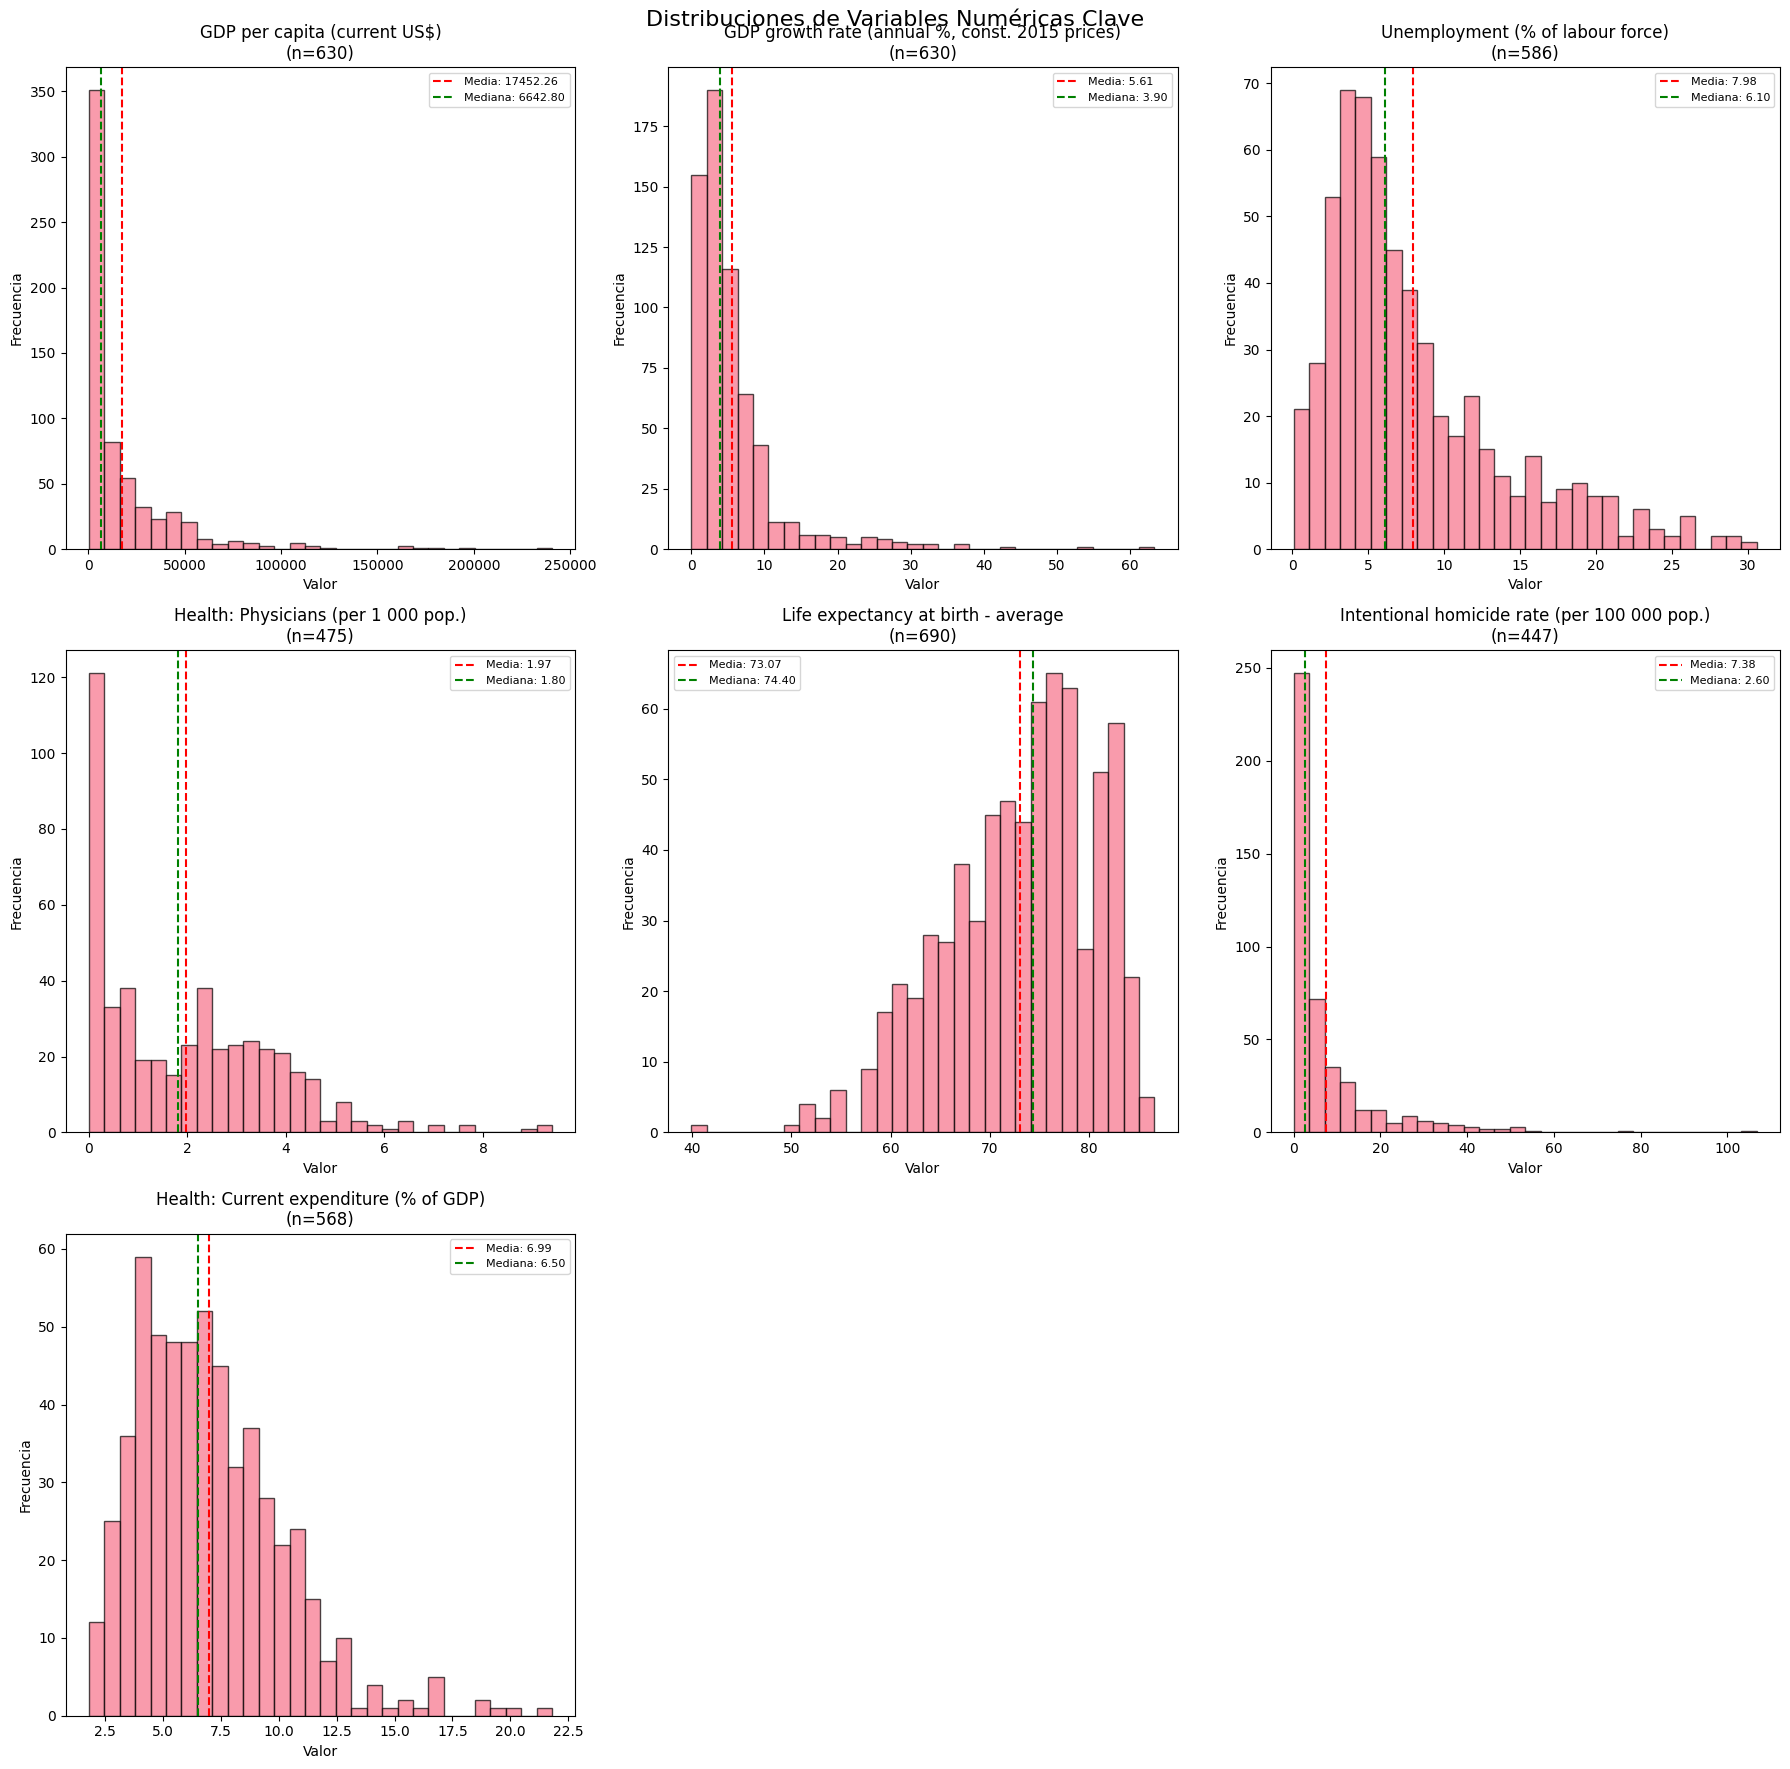

In [66]:
# Histogramas de variables numéricas clave
n_vars = len(key_variables)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
fig.suptitle('Distribuciones de Variables Numéricas Clave', fontsize=16)

for i, var in enumerate(key_variables):
    row = i // n_cols
    col = i % n_cols
    
    # Filtrar valores no nulos
    data = df[var].dropna()
    
    if len(data) > 0:
        axes[row, col].hist(data, bins=30, alpha=0.7, edgecolor='black')
        axes[row, col].set_title(f'{var}\n(n={len(data)})')
        axes[row, col].set_xlabel('Valor')
        axes[row, col].set_ylabel('Frecuencia')
        
        # Agregar estadísticas básicas
        mean_val = data.mean()
        median_val = data.median()
        axes[row, col].axvline(mean_val, color='red', linestyle='--', label=f'Media: {mean_val:.2f}')
        axes[row, col].axvline(median_val, color='green', linestyle='--', label=f'Mediana: {median_val:.2f}')
        axes[row, col].legend(fontsize=8)
    else:
        axes[row, col].text(0.5, 0.5, 'Sin datos', transform=axes[row, col].transAxes, 
                           ha='center', va='center')
        axes[row, col].set_title(f'{var}\n(Sin datos)')

# Ocultar subplots vacíos
for i in range(len(key_variables), n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.savefig("../src/visualization/key_variables_histogram.png", dpi=300,bbox_inches='tight', facecolor='white')
plt.show()

📊 CREANDO VISUALIZACIONES DE TODAS LAS VARIABLES CLAVE POR AÑO
Años disponibles: [np.float64(2015.0), np.float64(2020.0), np.float64(2024.0)]
Variables a visualizar: 7

Procesando 1/7: GDP per capita (current US$)


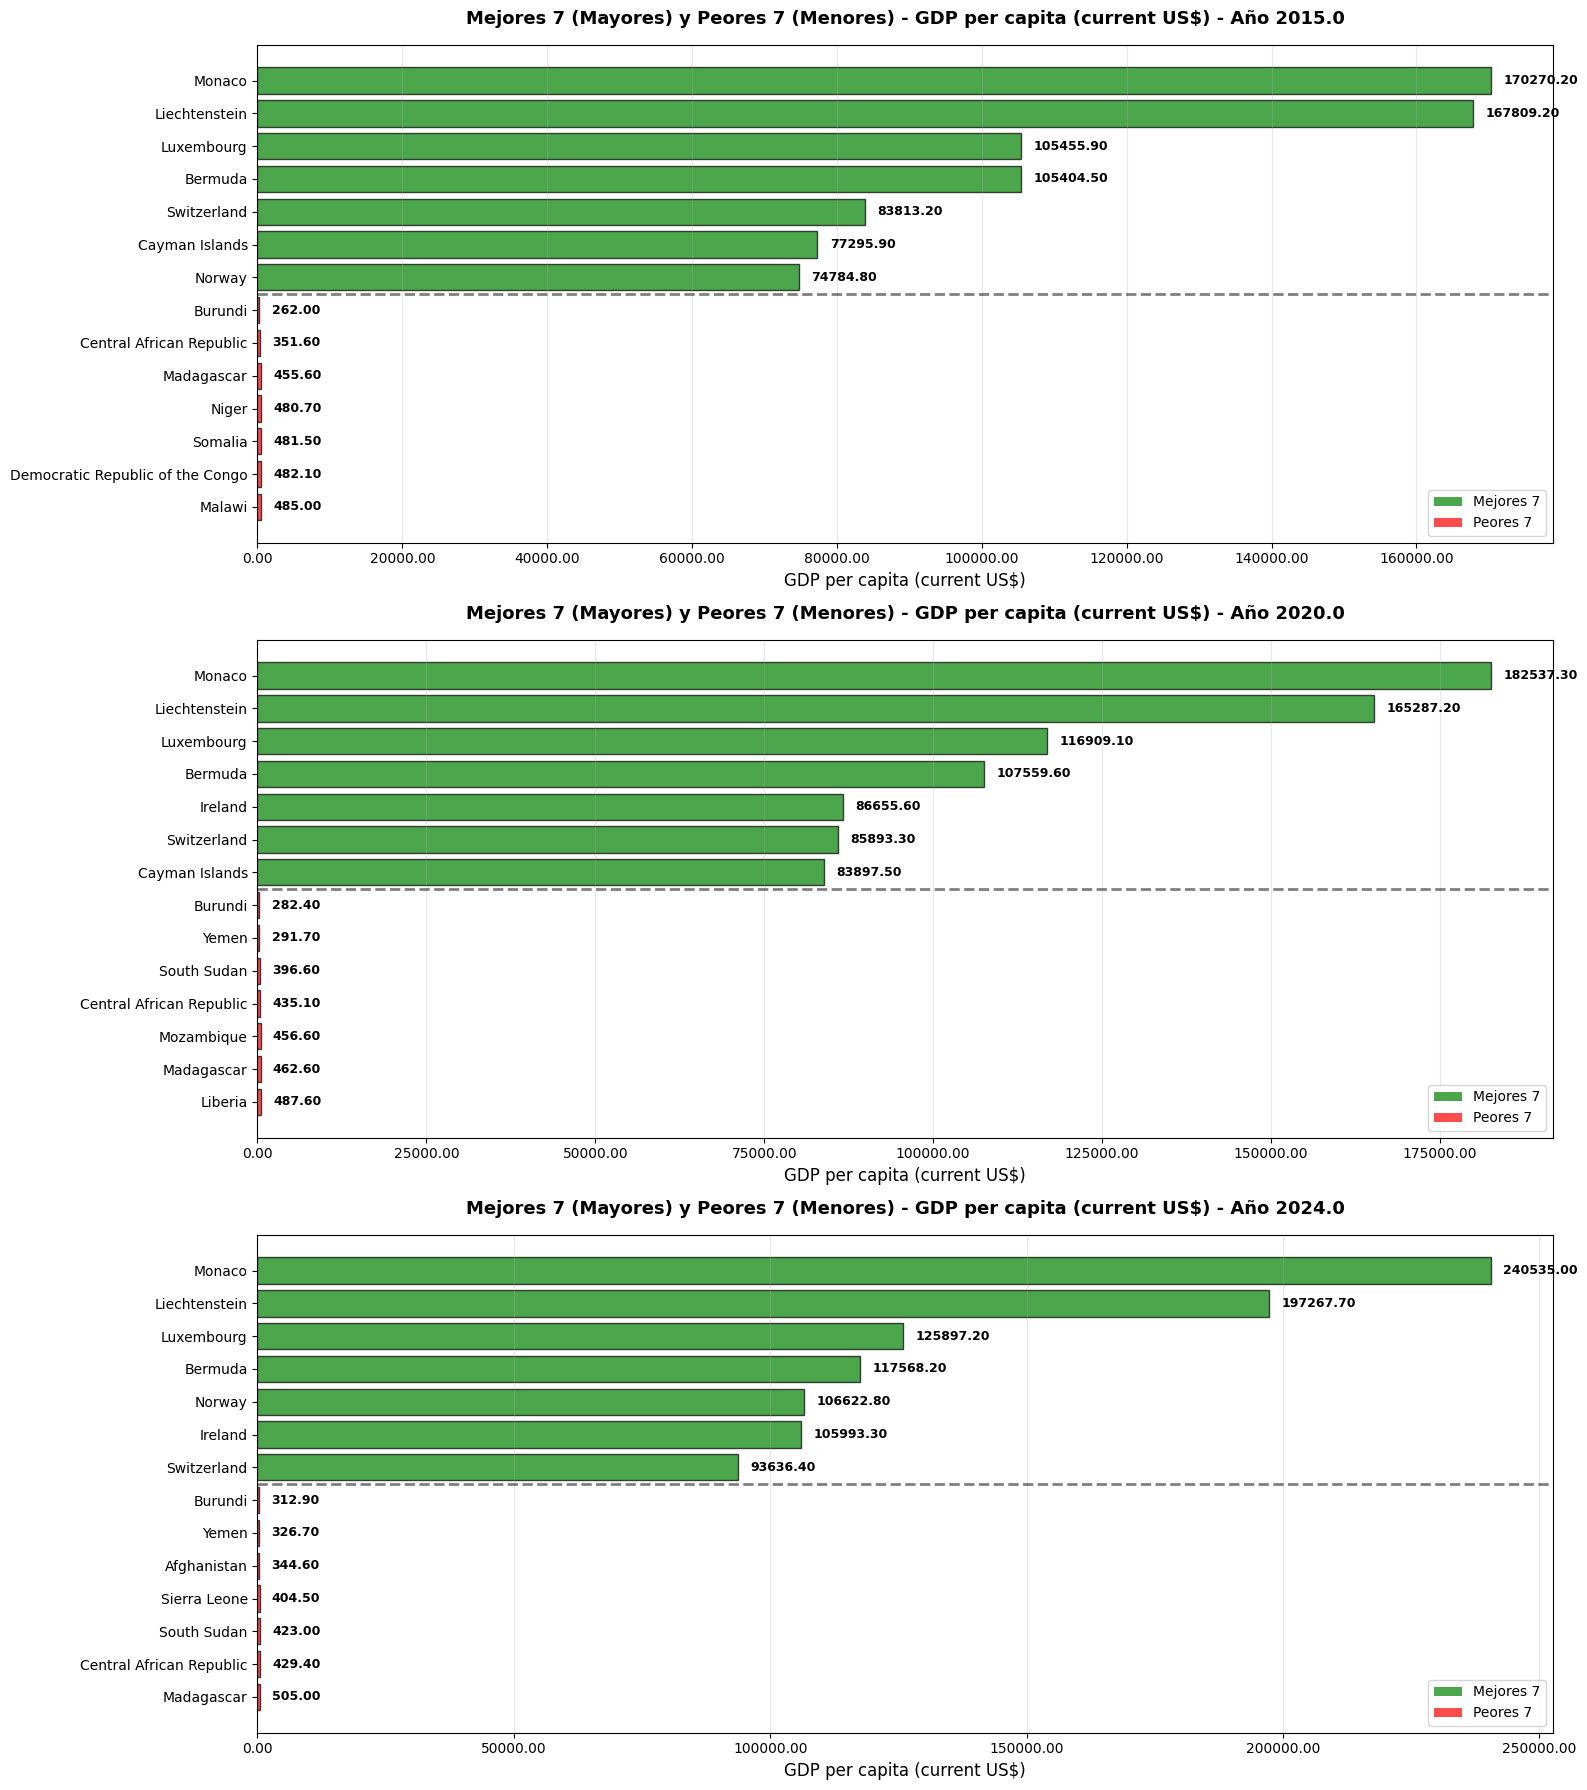


Procesando 2/7: GDP growth rate (annual %, const. 2015 prices)


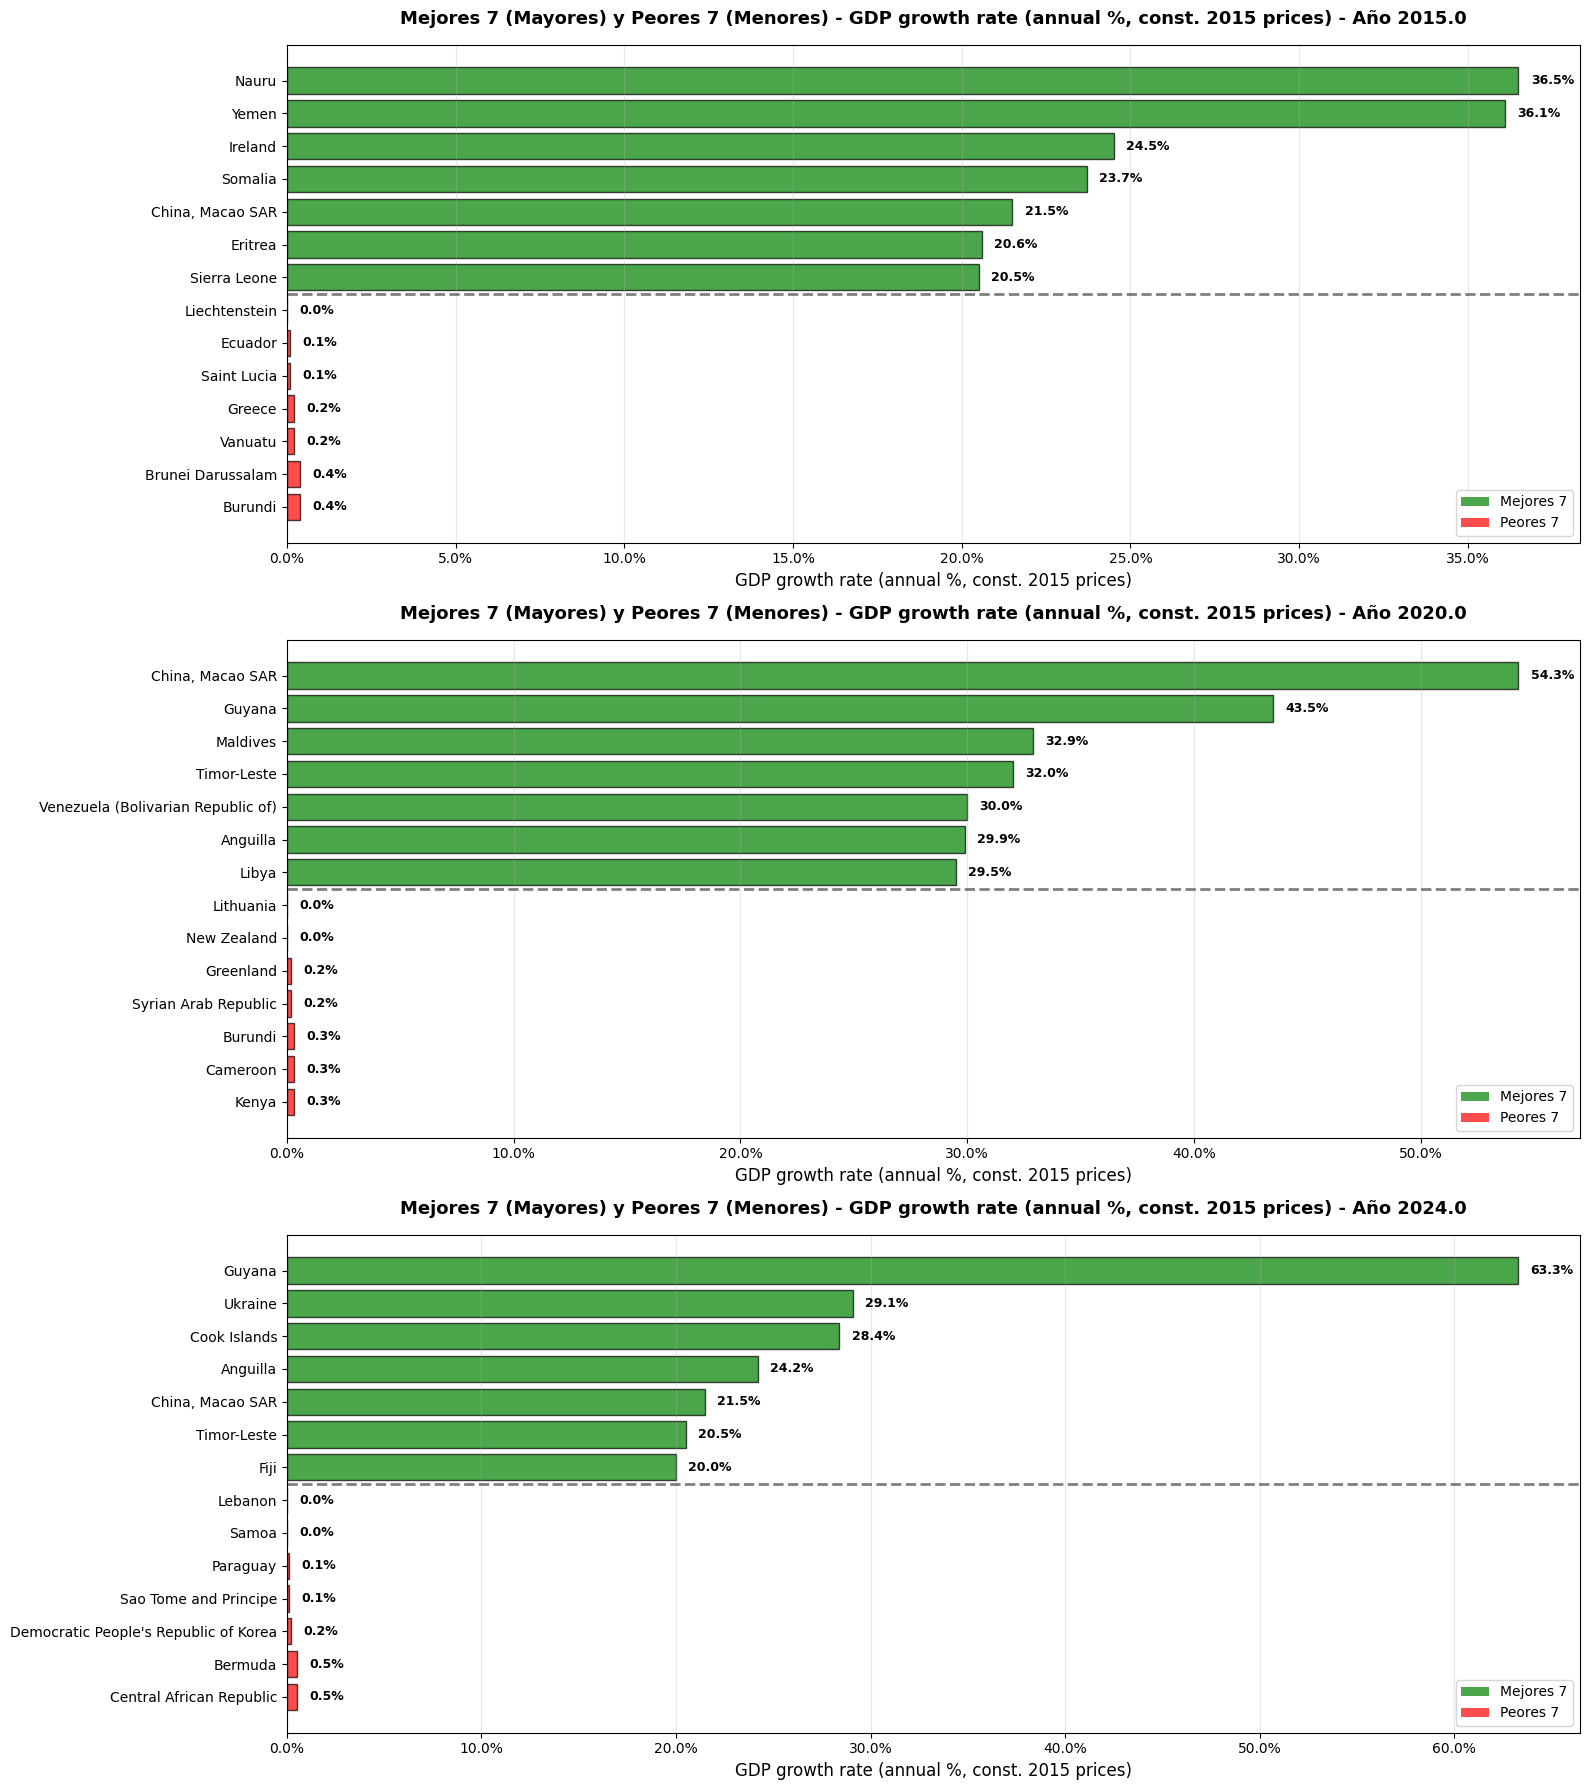


Procesando 3/7: Unemployment (% of labour force)


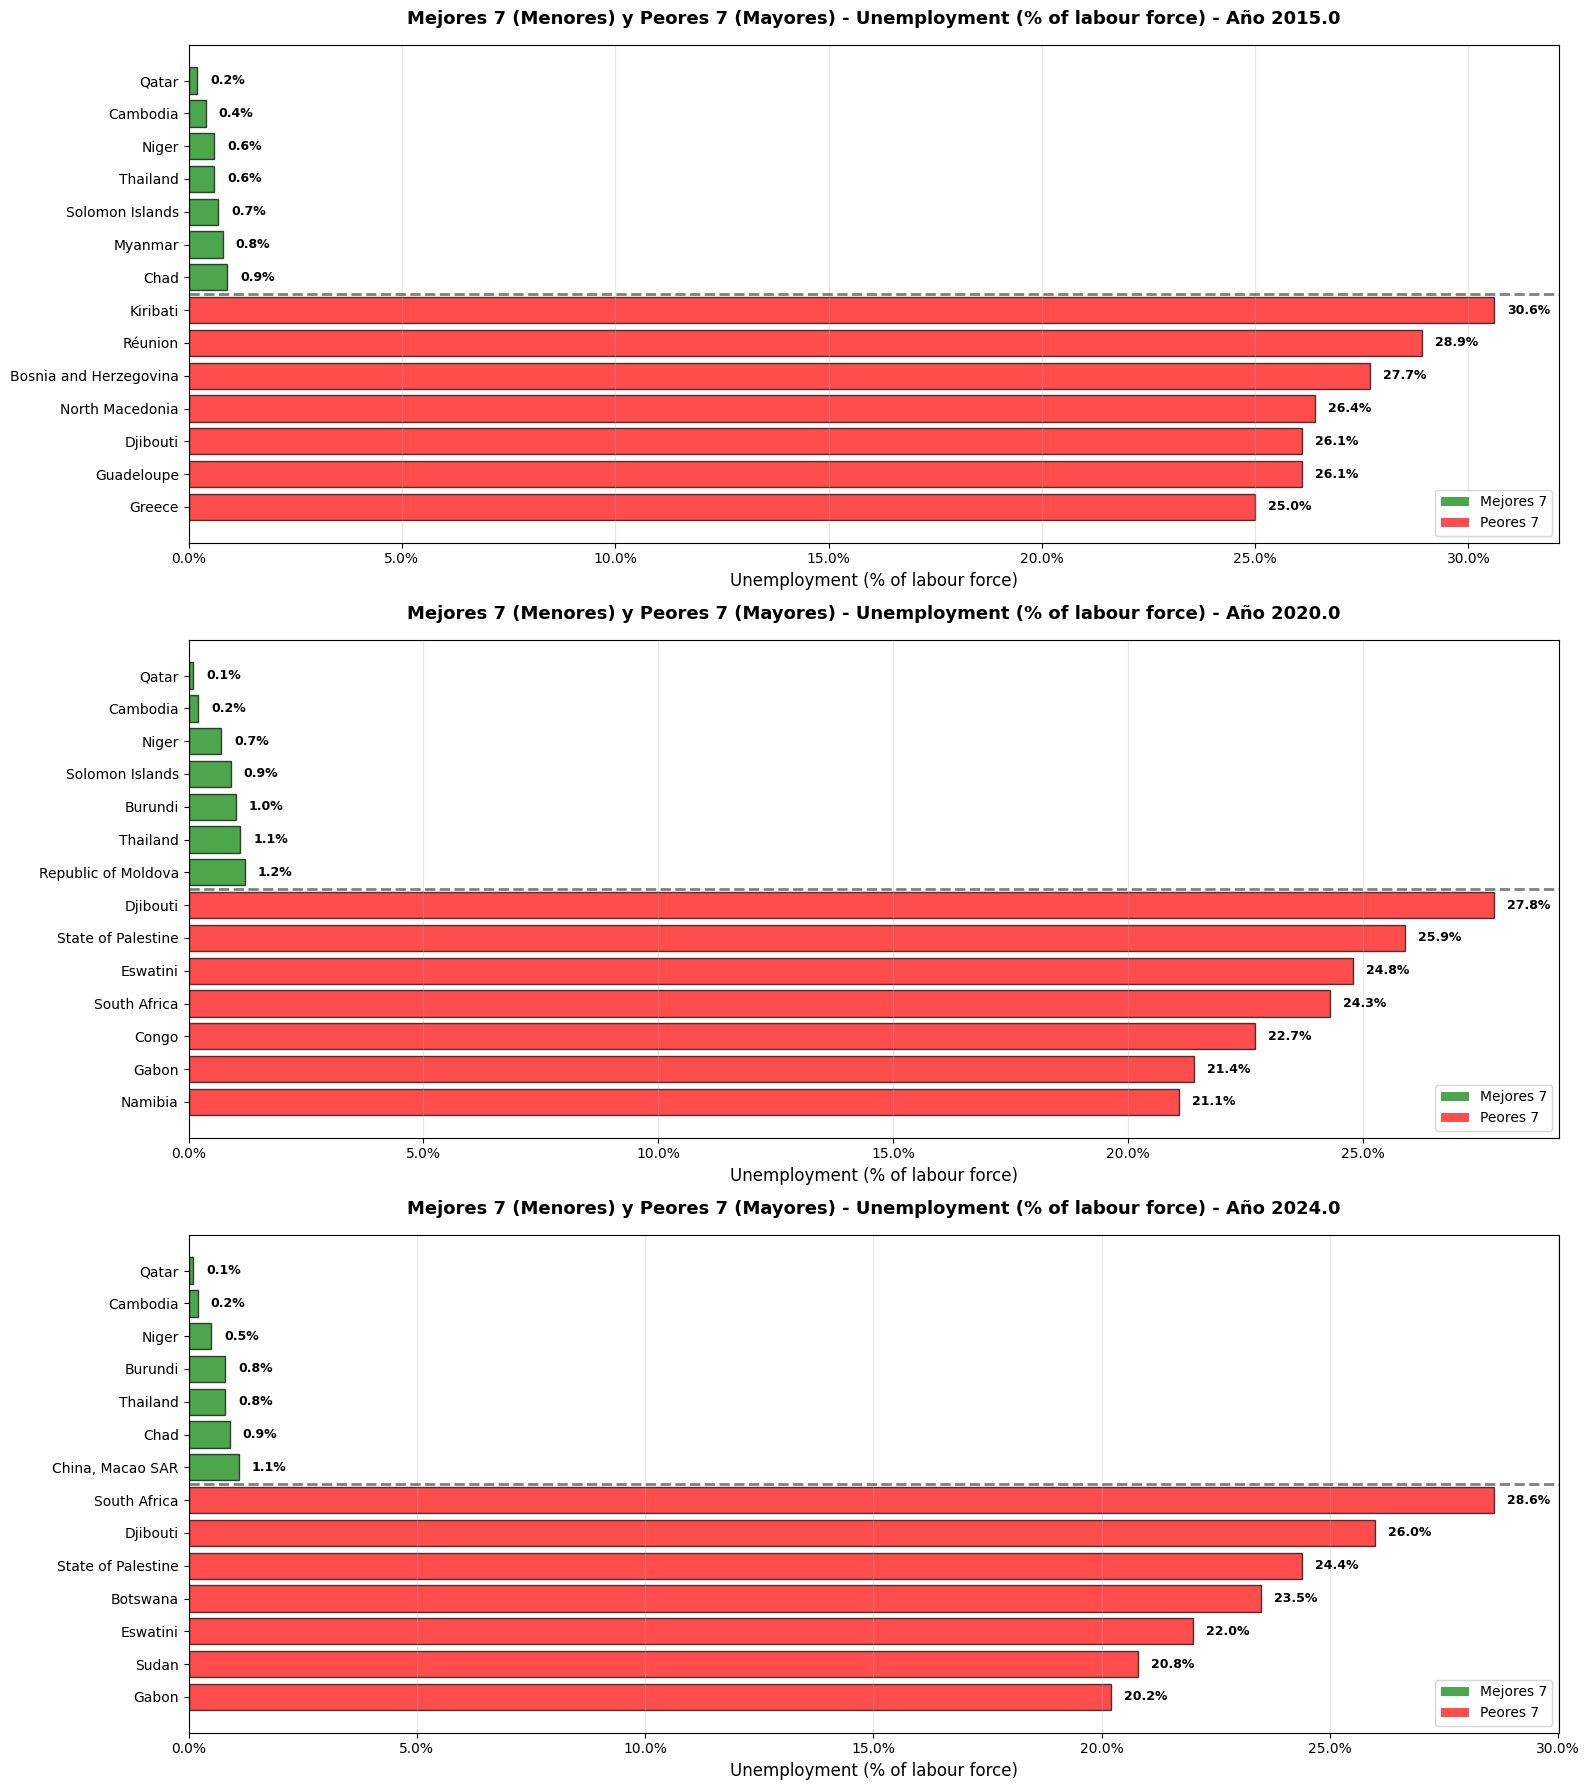


Procesando 4/7: Health: Physicians (per 1 000 pop.)


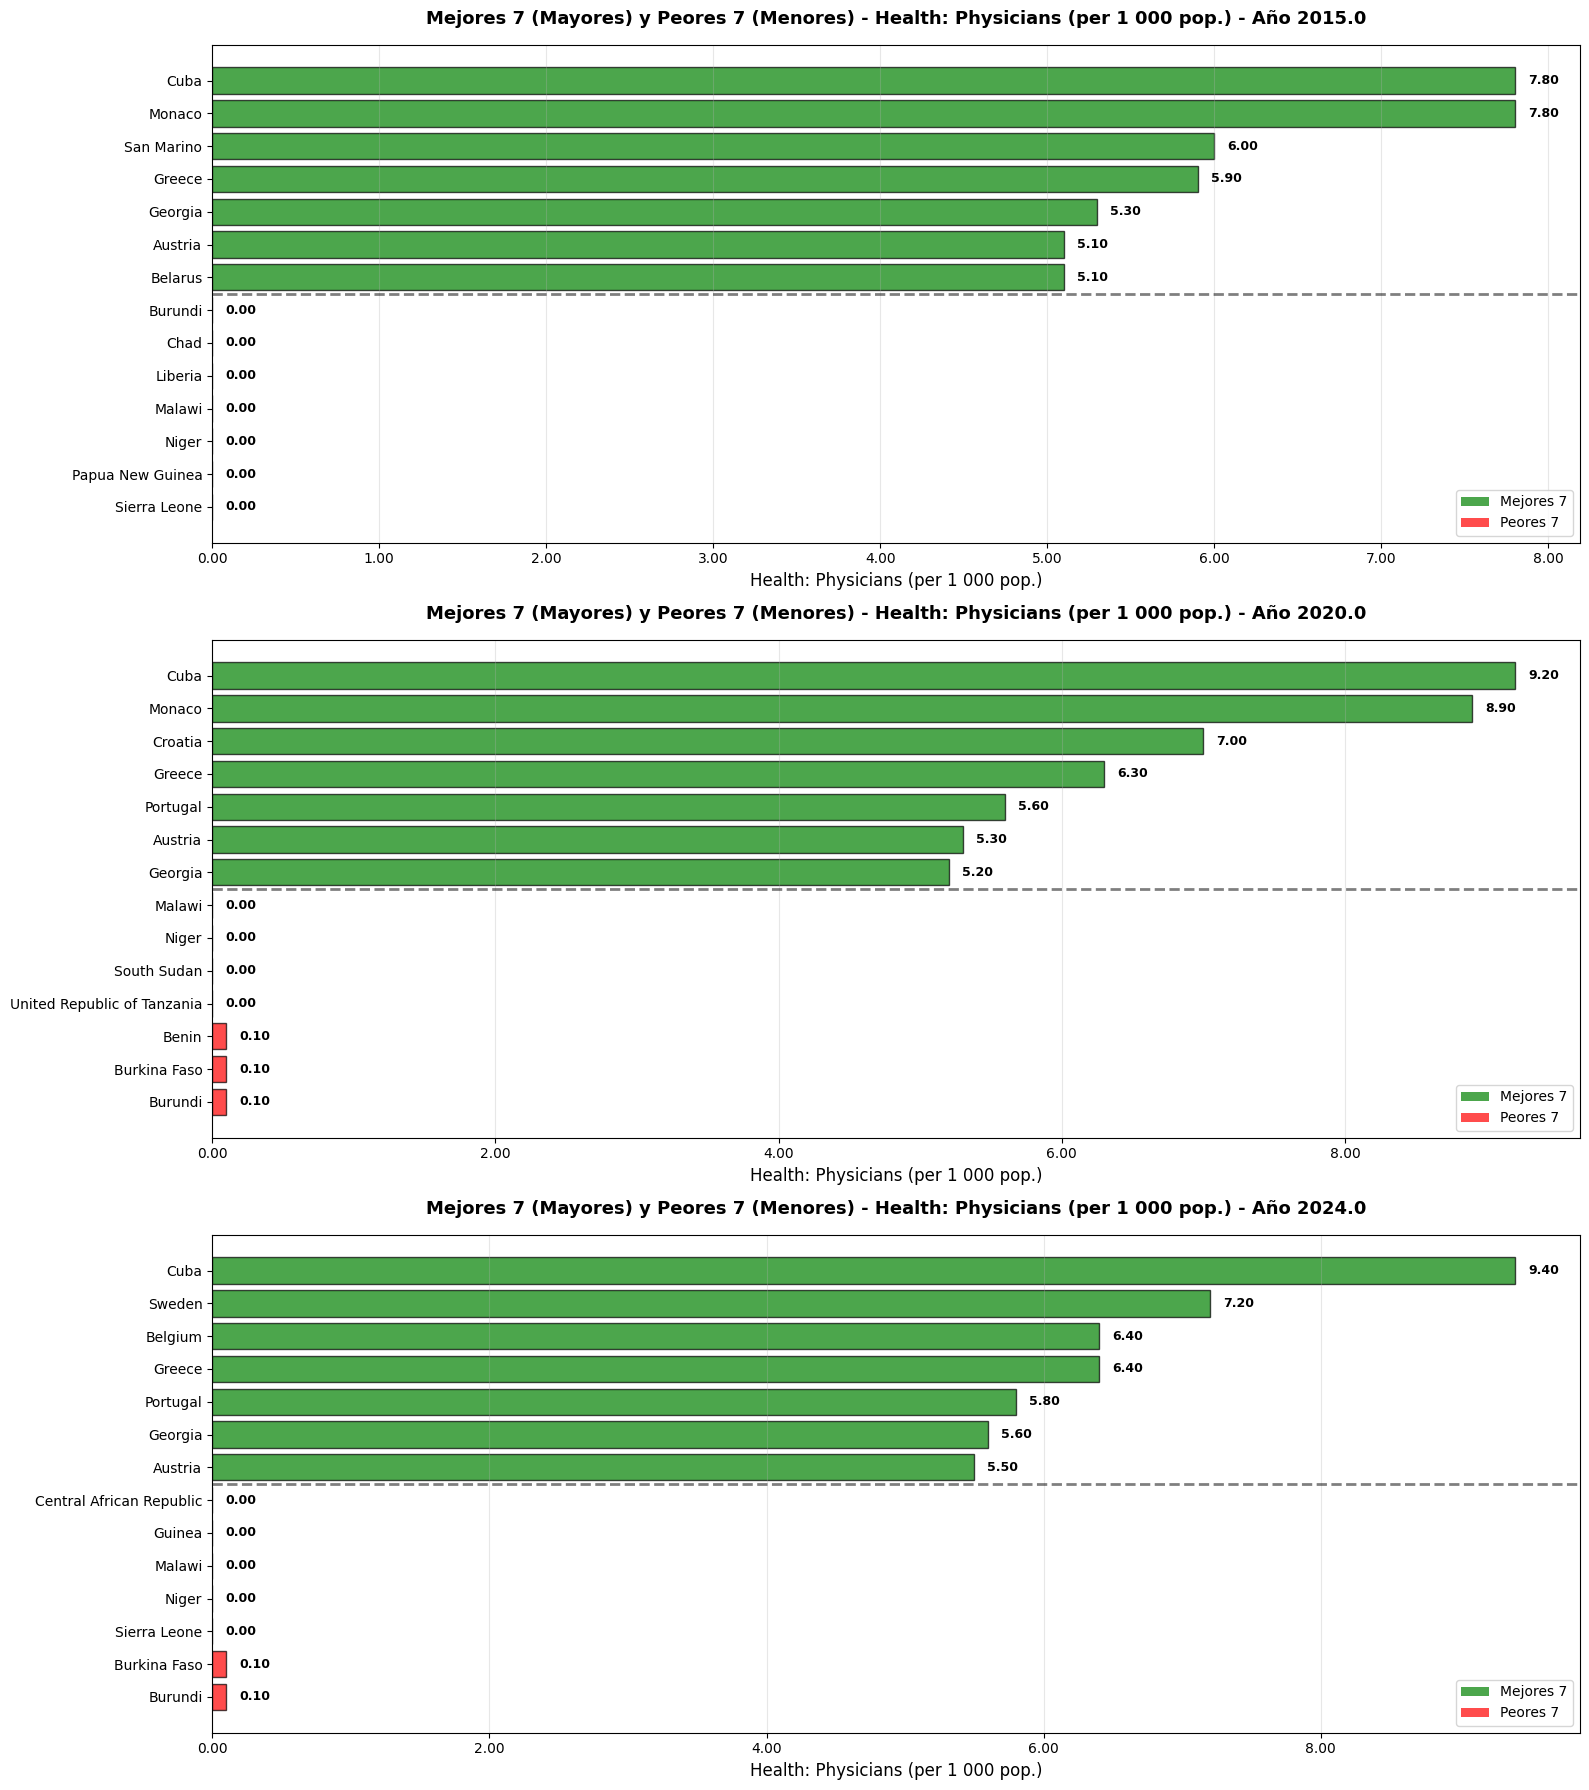


Procesando 5/7: Life expectancy at birth - average


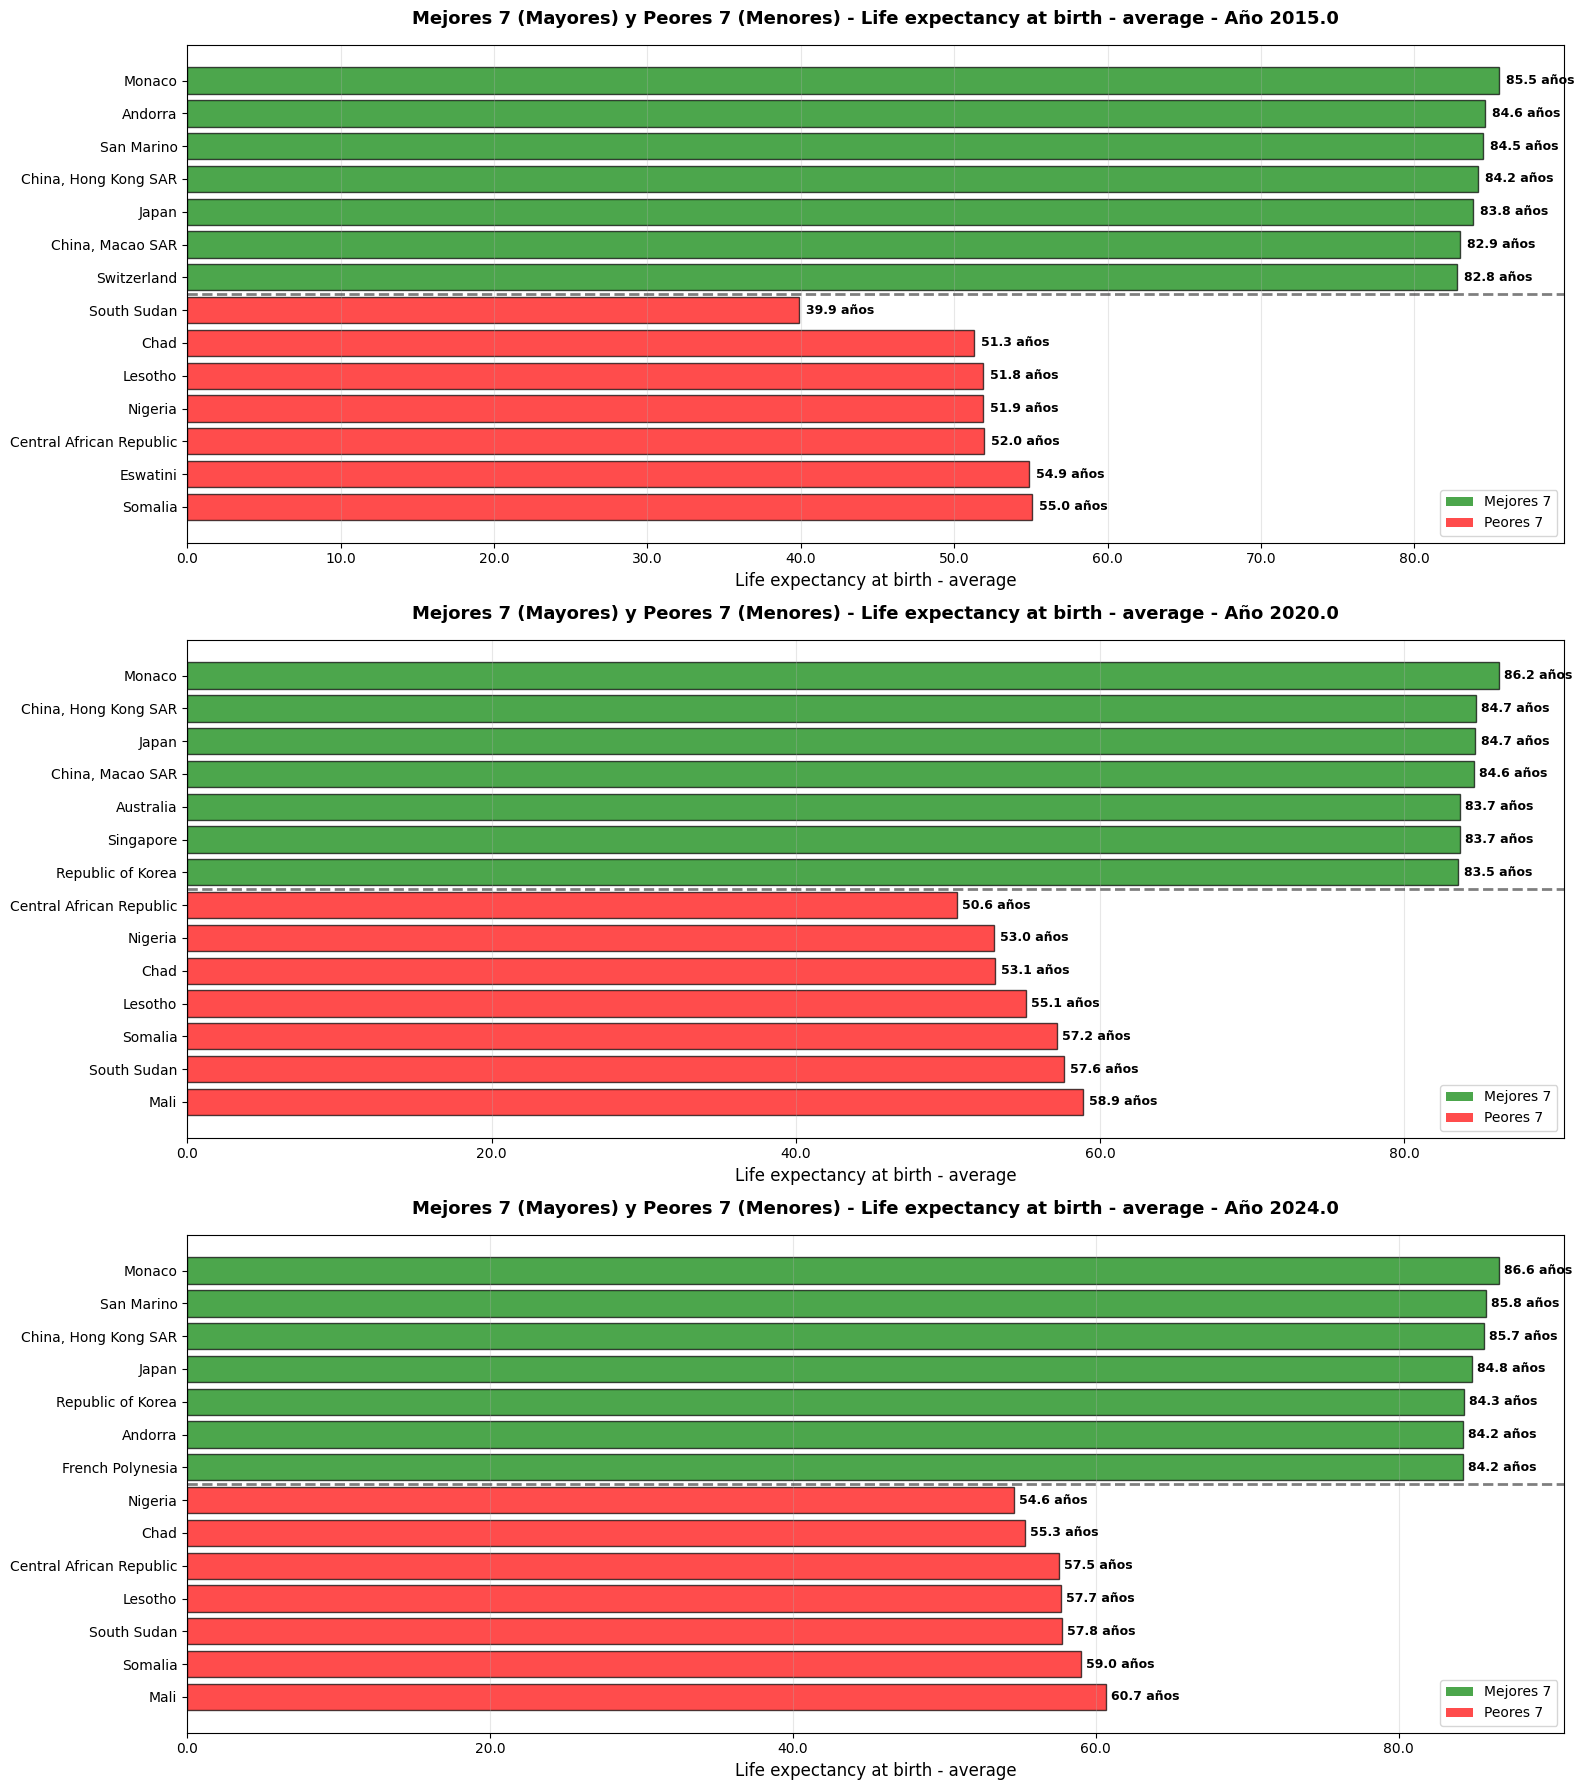


Procesando 6/7: Intentional homicide rate (per 100 000 pop.)


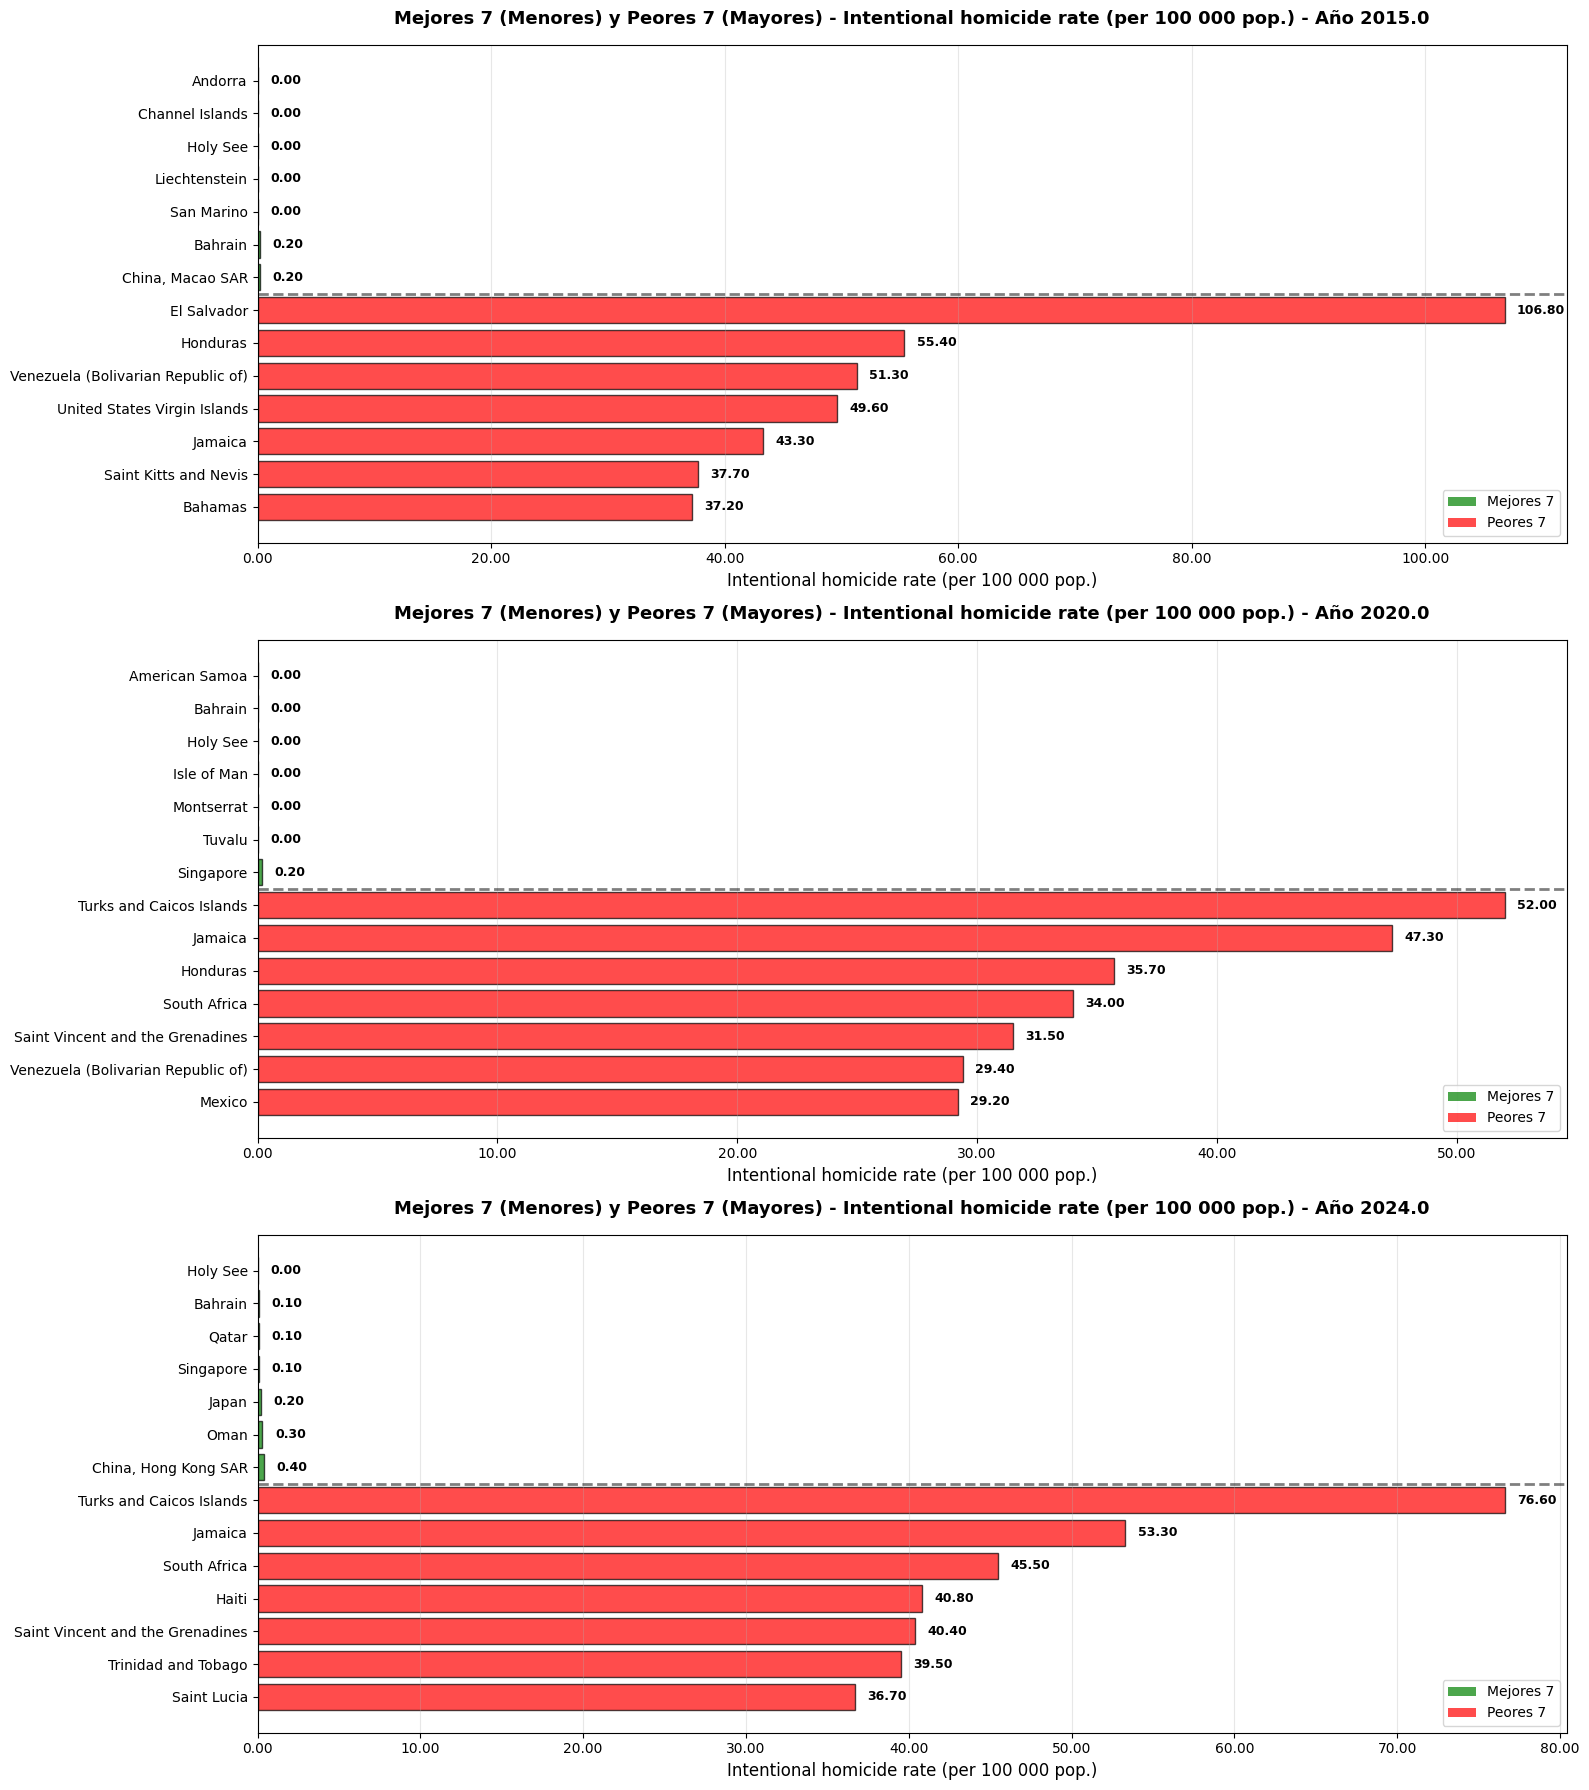


Procesando 7/7: Health: Current expenditure (% of GDP)


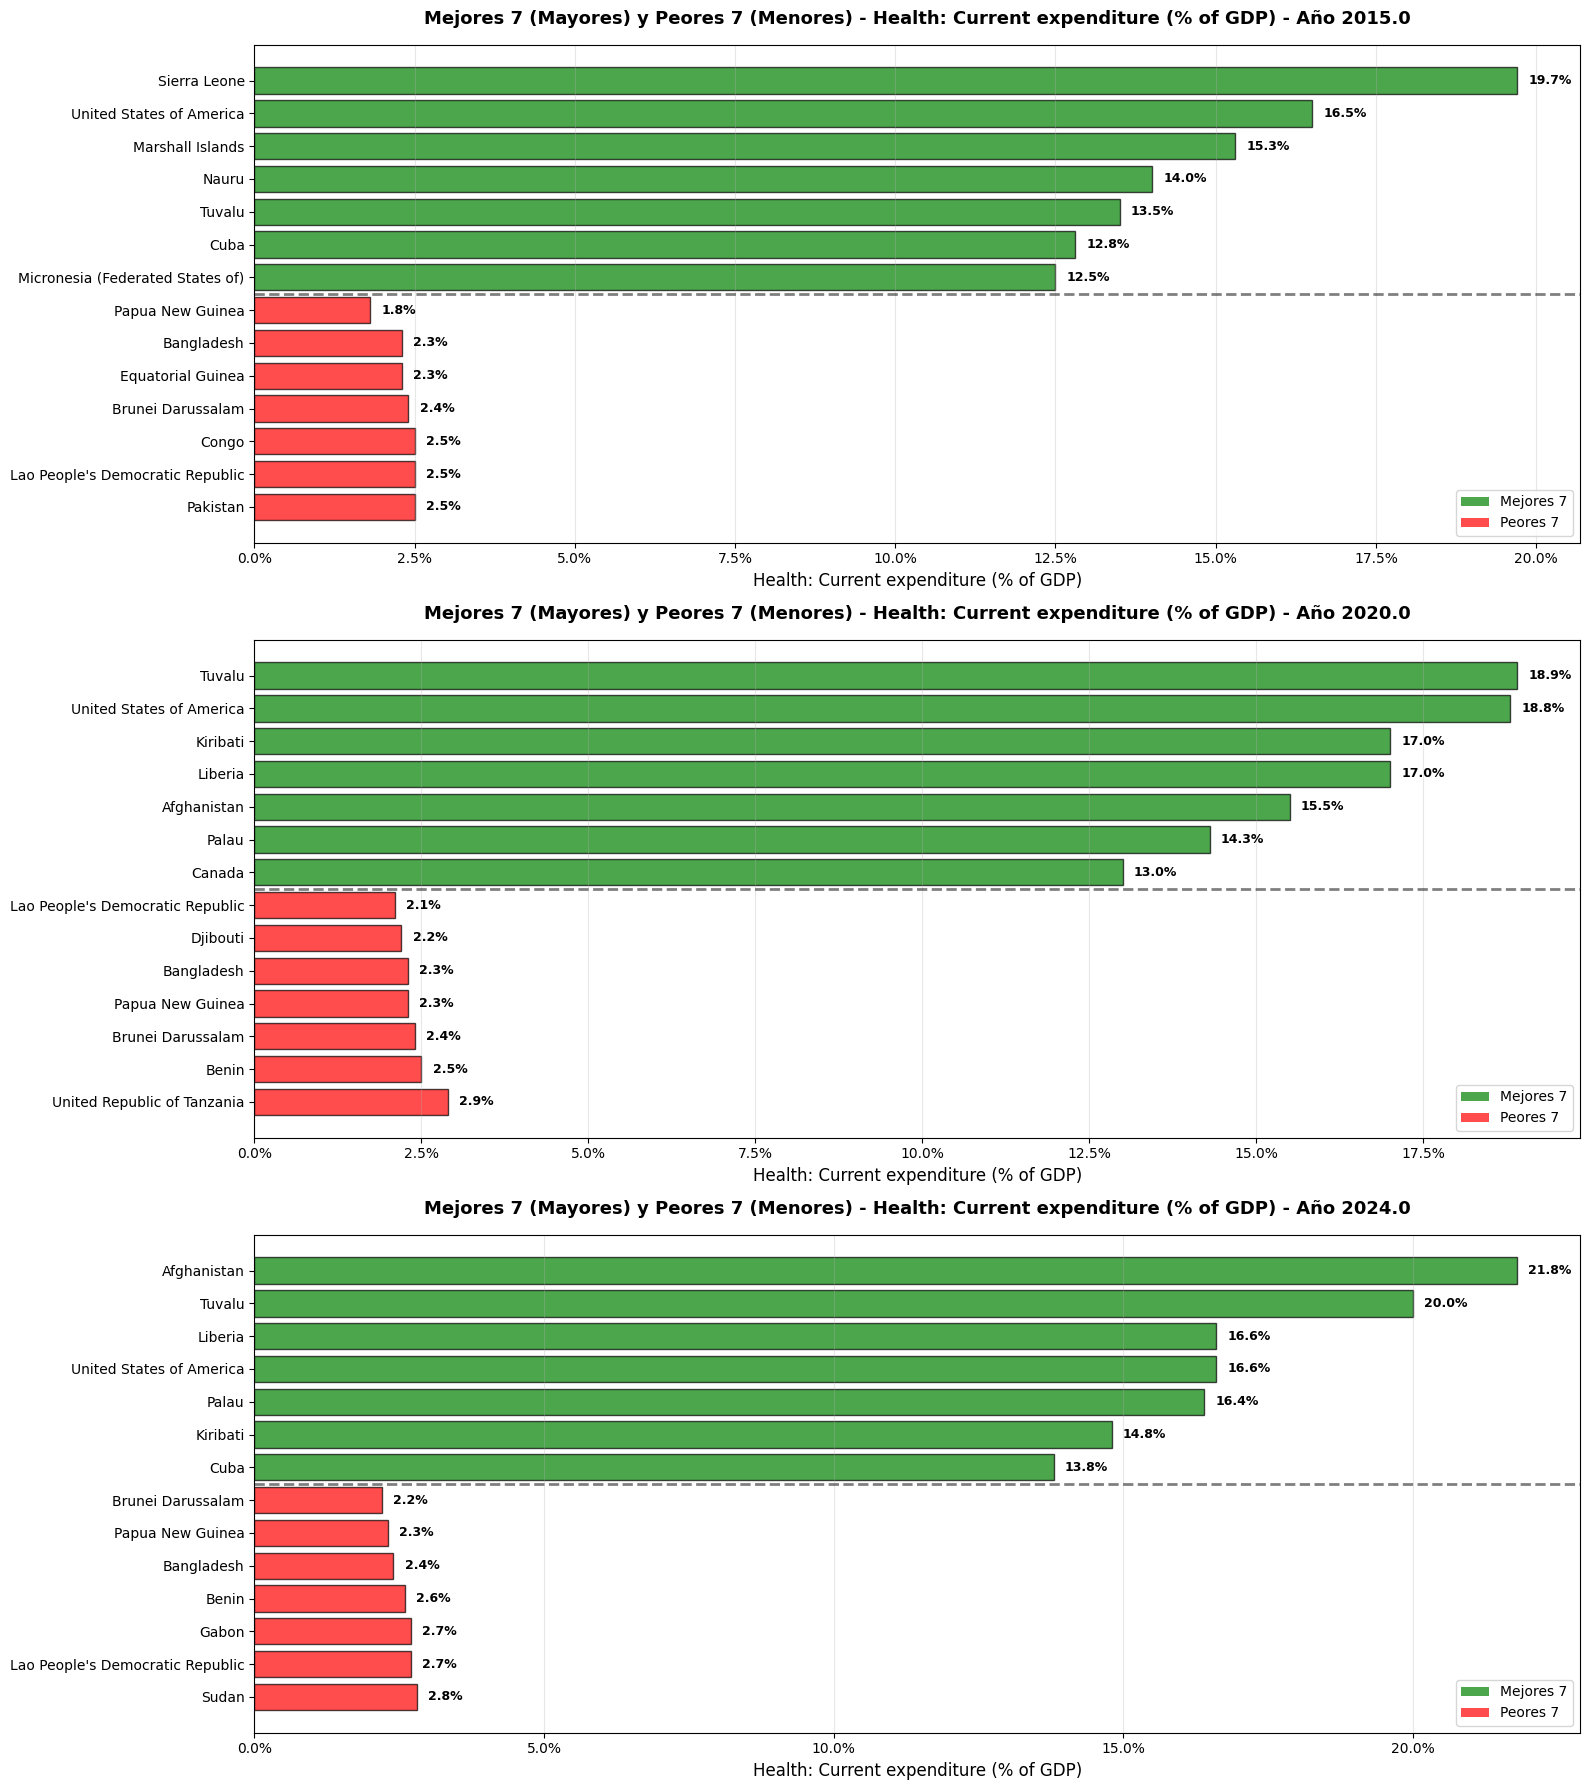

In [67]:
# VISUALIZACIÓN DE TODAS LAS KEY VARIABLES POR AÑO - TOP 7 Y WORST 7
print("📊 CREANDO VISUALIZACIONES DE TODAS LAS VARIABLES CLAVE POR AÑO")
print("="*70)

# Obtener años disponibles
available_years = sorted(df['Year'].unique())
print(f"Años disponibles: {available_years}")

viz_variables = [var for var in key_variables]
print(f"Variables a visualizar: {len(viz_variables)}")

# Configurar colores para cada año
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  

# Crear visualización para cada variable
for var_idx, variable in enumerate(viz_variables):
    print(f"\nProcesando {var_idx+1}/{len(viz_variables)}: {variable}")
    
    # Crear figura con subplots para cada año
    fig, axes = plt.subplots(len(available_years), 1, figsize=(16, 6 * len(available_years)))
    if len(available_years) == 1:
        axes = [axes]
    
    # Determinar el tipo de ordenamiento basado en la variable
    ascending_vars = [
        "Unemployment (% of labour force)",
        "Intentional homicide rate (per 100 000 pop.)"
    ]
    ascending = variable in ascending_vars
    
    for idx, year in enumerate(available_years):
        year_data = df[df['Year'] == year].copy()
        var_data = year_data.dropna(subset=[variable])
        
        if len(var_data) > 0:
            # Ordenar según el tipo de variable (menor es mejor vs mayor es mejor)
            var_sorted = var_data.sort_values(variable, ascending=False).reset_index(drop=True)
            
            # Obtener top 7 y worst 7
            if ascending:  # Para variables donde menor es mejor
                best_7 = var_data.nsmallest(7, variable)  # Menores valores (mejores)
                worst_7 = var_data.nlargest(7, variable)  # Mayores valores (peores)
                title_prefix = "Mejores 7 (Menores) y Peores 7 (Mayores)"
            else:  # Para variables donde mayor es mejor
                best_7 = var_data.nlargest(7, variable)  # Mayores valores (mejores)
                worst_7 = var_data.nsmallest(7, variable)  # Menores valores (peores)
                title_prefix = "Mejores 7 (Mayores) y Peores 7 (Menores)"
            
            # Combinar best y worst con separador visual
            combined_countries = pd.concat([best_7, worst_7]).reset_index(drop=True)
            combined_values = combined_countries[variable].tolist()
            combined_labels = combined_countries['Country'].tolist()
            
            # Crear colores: verde para mejores, rojo para peores
            bar_colors = ['green'] * 7 + ['red'] * 7
            
            # Crear gráfico de barras horizontal
            bars = axes[idx].barh(range(len(combined_countries)), 
                                 combined_values, 
                                 color=bar_colors, alpha=0.7, edgecolor='black')
            
            # Configurar etiquetas del eje Y (países)
            axes[idx].set_yticks(range(len(combined_countries)))
            axes[idx].set_yticklabels(combined_labels, fontsize=10)
            
            # Invertir el eje Y para que los mejores estén arriba
            axes[idx].invert_yaxis()
            
            # Agregar valores en las barras y rankings
            for i, (bar, value, country) in enumerate(zip(bars, combined_values, combined_labels)):
                width = bar.get_width()
                
                # Formato específico según la variable
                if "%" in variable:
                    value_text = f'{value:.1f}%'
                elif "per 1 000" in variable or "per 100 000" in variable:
                    value_text = f'{value:.2f}'
                elif "Gigajoules" in variable:
                    value_text = f'{value:.1f} GJ'
                elif "years" in variable or "average" in variable:
                    value_text = f'{value:.1f} años'
                else:
                    value_text = f'{value:.2f}'
                
                # Posición del texto del valor
                text_x = width + (max(combined_values) - min(combined_values)) * 0.01
                axes[idx].text(text_x, bar.get_y() + bar.get_height()/2,
                              value_text, ha='left', va='center', fontsize=9, fontweight='bold')
            
            # Agregar línea separadora visual entre mejores y peores
            axes[idx].axhline(y=6.5, color='black', linestyle='--', alpha=0.5, linewidth=2)
            
            # Personalizar el gráfico
            axes[idx].set_xlabel(variable, fontsize=12)
            axes[idx].set_title(f'{title_prefix} - {variable} - Año {year}', 
                               fontsize=13, fontweight='bold', pad=15)
            axes[idx].grid(True, alpha=0.3, axis='x')
            
            # Agregar leyenda
            from matplotlib.patches import Patch
            legend_elements = [Patch(facecolor='green', alpha=0.7, label='Mejores 7'),
                             Patch(facecolor='red', alpha=0.7, label='Peores 7')]
            axes[idx].legend(handles=legend_elements, loc='lower right', fontsize=10)
            
            # Formato del eje X específico para cada variable
            if "%" in variable:
                axes[idx].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}%'))
            elif "Gigajoules" in variable:
                axes[idx].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f} GJ'))
            elif "years" in variable or "average" in variable:
                axes[idx].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}'))
            else:
                axes[idx].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.2f}'))
        
        else:
            # Si no hay datos para ese año
            axes[idx].text(0.5, 0.5, f'Sin datos disponibles para {year}', 
                          transform=axes[idx].transAxes, ha='center', va='center',
                          fontsize=14, bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))
            axes[idx].set_title(f'{variable} - Año {year} (Sin datos)', fontsize=14)
    
    plt.tight_layout()
    
    # Guardar cada visualización con nombre específico
    safe_filename = variable.replace('/', '_').replace('(', '').replace(')', '').replace(' ', '_').replace('-', '_')
    plt.savefig(f"../src/visualization/{safe_filename}_top7_worst7_by_year.png", 
                dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()



## GDP analysis

In [68]:
df['gdp_class'] = pd.qcut(df["GDP per capita (current US$)"],
                                q=4,
                                labels=False,
                                duplicates='drop')

📊 ANÁLISIS DE INTERACCIONES ENTRE VARIABLES POR CLASE GDP

Creando 6 scatter plots para mostrar interacciones...
Procesando scatter plot 1: Life expectancy at birth - average vs Health: Physicians (per 1 000 pop.)
Procesando scatter plot 2: GDP per capita (current US$) vs Life expectancy at birth - average
Procesando scatter plot 3: Health: Current expenditure (% of GDP) vs Health: Physicians (per 1 000 pop.)
Procesando scatter plot 4: GDP per capita (current US$) vs Health: Current expenditure (% of GDP)
Procesando scatter plot 5: Life expectancy at birth - average vs Intentional homicide rate (per 100 000 pop.)
Procesando scatter plot 6: GDP per capita (current US$) vs Unemployment (% of labour force)


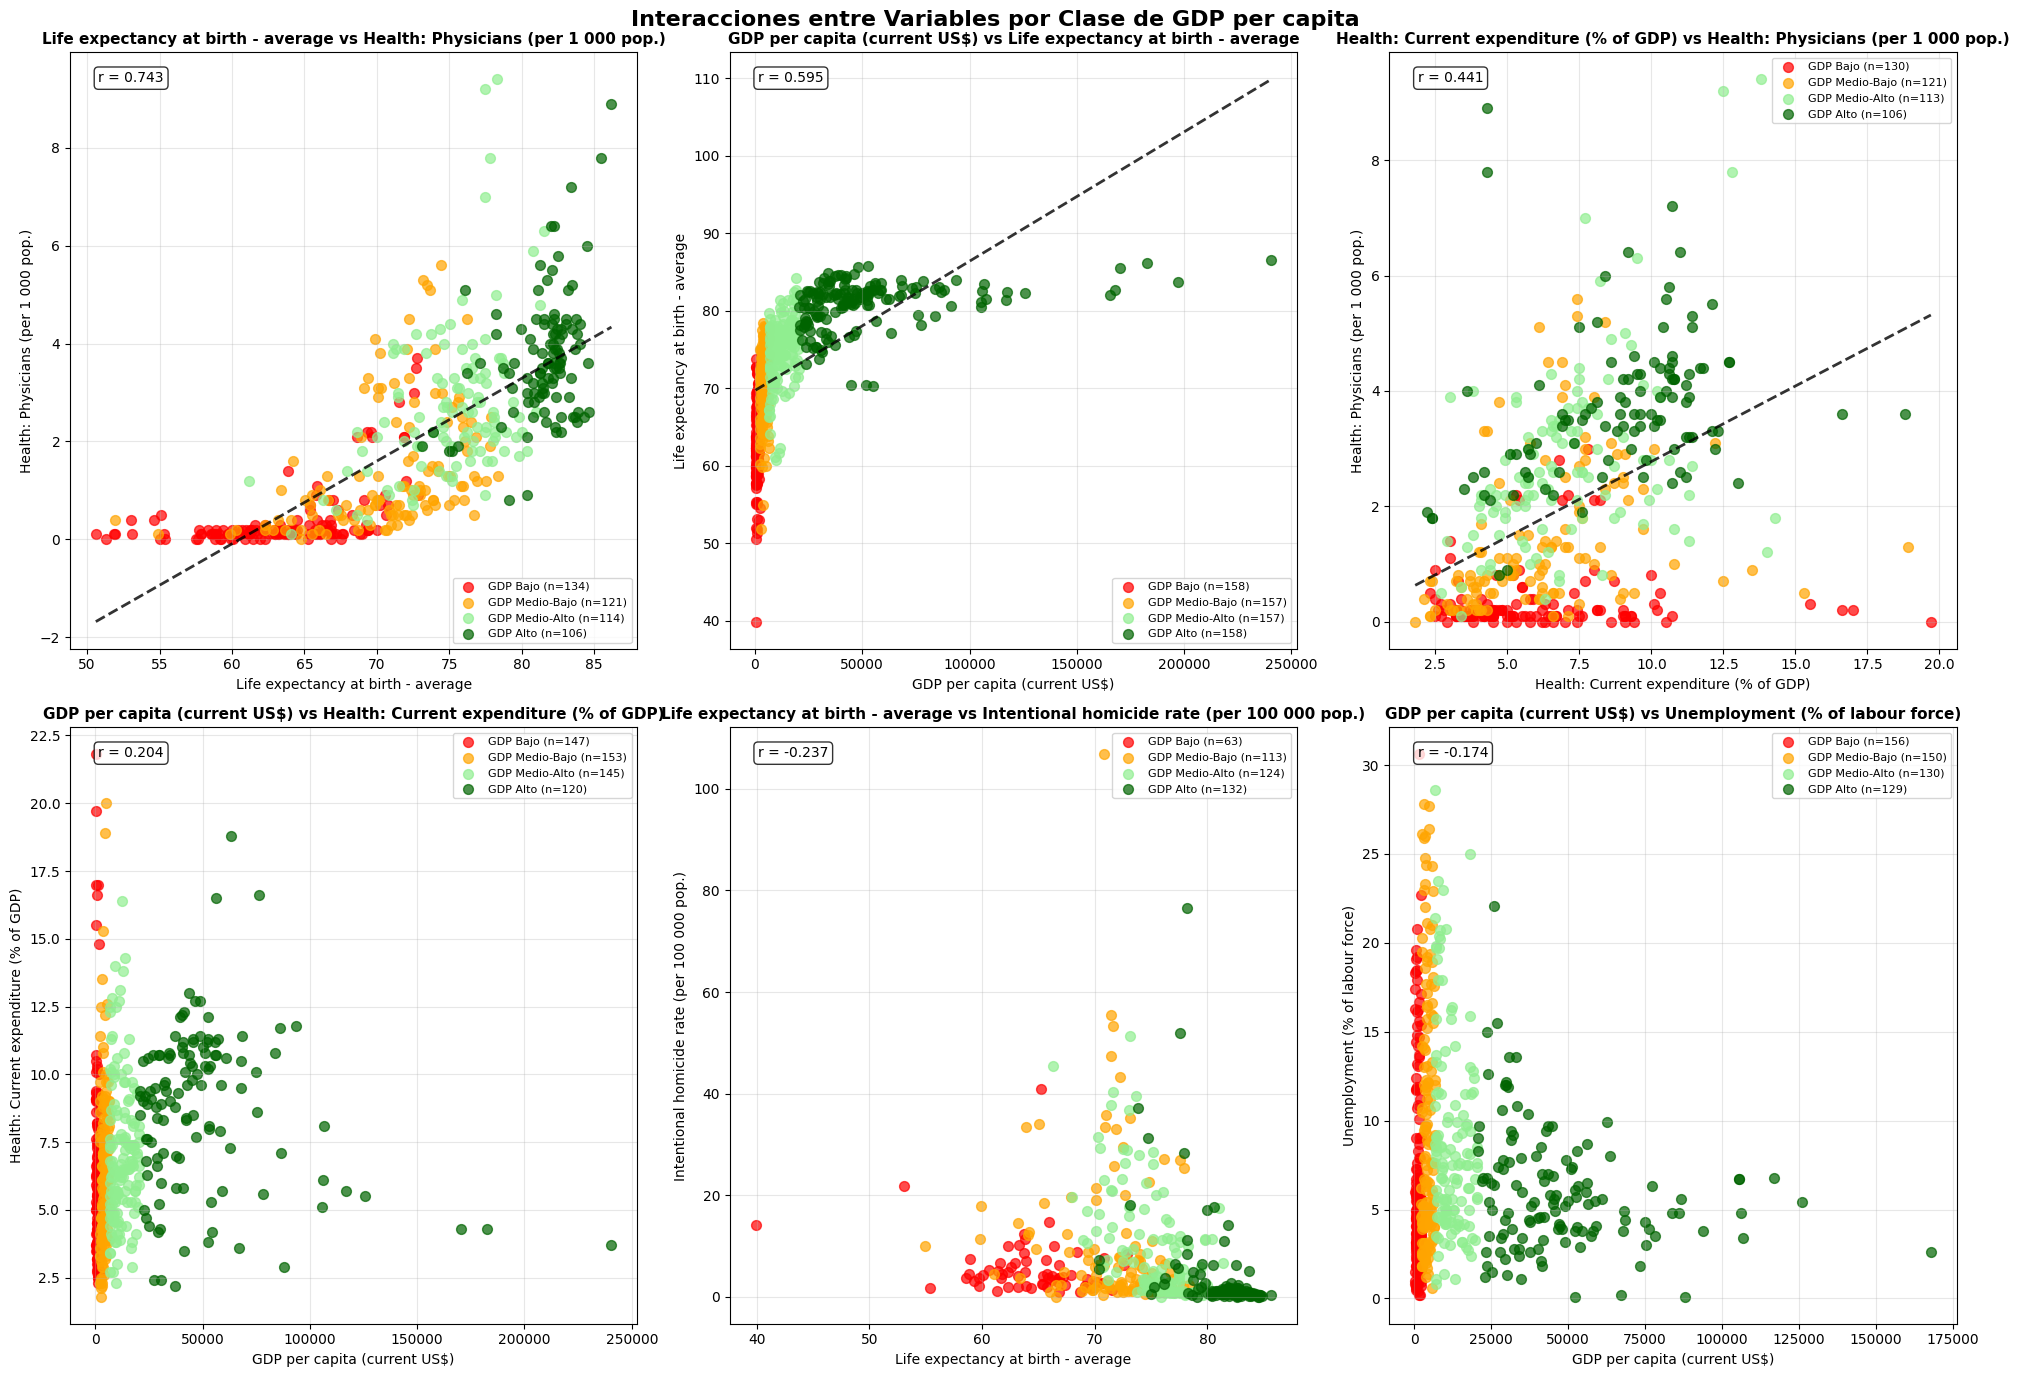

In [69]:
# SCATTER PLOTS PARA ANÁLISIS DE INTERACCIONES ENTRE VARIABLES POR GDP CLASS
print("📊 ANÁLISIS DE INTERACCIONES ENTRE VARIABLES POR CLASE GDP")
print("="*70)

# Mapear clases numéricas a etiquetas descriptivas
class_labels = {0: 'GDP Bajo', 1: 'GDP Medio-Bajo', 2: 'GDP Medio-Alto', 3: 'GDP Alto'}
df['gdp_class_label'] = df['gdp_class'].map(class_labels)

# Variables más relevantes para scatter plots basadas en correlaciones con GDP
scatter_variables = [
    # Variables con alta correlación con GDP (de tu análisis anterior)
    ("Life expectancy at birth - average", "Health: Physicians (per 1 000 pop.)"),
    ("GDP per capita (current US$)", "Life expectancy at birth - average"),
    ("Health: Current expenditure (% of GDP)", "Health: Physicians (per 1 000 pop.)"),
    ("GDP per capita (current US$)", "Health: Current expenditure (% of GDP)"),
    ("Life expectancy at birth - average", "Intentional homicide rate (per 100 000 pop.)"),
    ("GDP per capita (current US$)", "Unemployment (% of labour force)")
]

print(f"\nCreando {len(scatter_variables)} scatter plots para mostrar interacciones...")

# Configurar la figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
axes = axes.flatten()

# Colores para las clases GDP
colors = ['red', 'orange', 'lightgreen', 'darkgreen']
class_colors = {i: colors[i] for i in range(4)}

for idx, (var_x, var_y) in enumerate(scatter_variables):
    print(f"Procesando scatter plot {idx+1}: {var_x} vs {var_y}")
    
    # Filtrar datos válidos para ambas variables
    valid_data = df[[var_x, var_y, 'gdp_class', 'gdp_class_label', 'Country']].dropna()

    for gdp_class in sorted(valid_data['gdp_class'].unique()):
        if pd.notna(gdp_class):
            class_data = valid_data[valid_data['gdp_class'] == gdp_class]
            axes[idx].scatter(class_data[var_x], class_data[var_y], 
                            c=colors[int(gdp_class)], alpha=0.7, s=50,
                            label=f'{class_labels[gdp_class]} (n={len(class_data)})')
    
    # Personalizar el gráfico
    axes[idx].set_xlabel(var_x, fontsize=10)
    axes[idx].set_ylabel(var_y, fontsize=10)
    axes[idx].set_title(f'{var_x} vs {var_y}', fontsize=11, fontweight='bold')
    axes[idx].legend(fontsize=8, loc='best')
    axes[idx].grid(True, alpha=0.3)
    
    # Calcular y mostrar correlación general
    correlation = valid_data[var_x].corr(valid_data[var_y])
    axes[idx].text(0.05, 0.95, f'r = {correlation:.3f}', 
                    transform=axes[idx].transAxes, fontsize=10,
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Línea de tendencia general
    if abs(correlation) > 0.3:  # Solo si hay correlación moderada
        z = np.polyfit(valid_data[var_x], valid_data[var_y], 1)
        p = np.poly1d(z)
        x_trend = np.linspace(valid_data[var_x].min(), valid_data[var_x].max(), 100)
        axes[idx].plot(x_trend, p(x_trend), "k--", alpha=0.8, linewidth=2)

plt.suptitle('Interacciones entre Variables por Clase de GDP per capita', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig("../src/visualization/gdp_class_interactions_scatter.png", 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

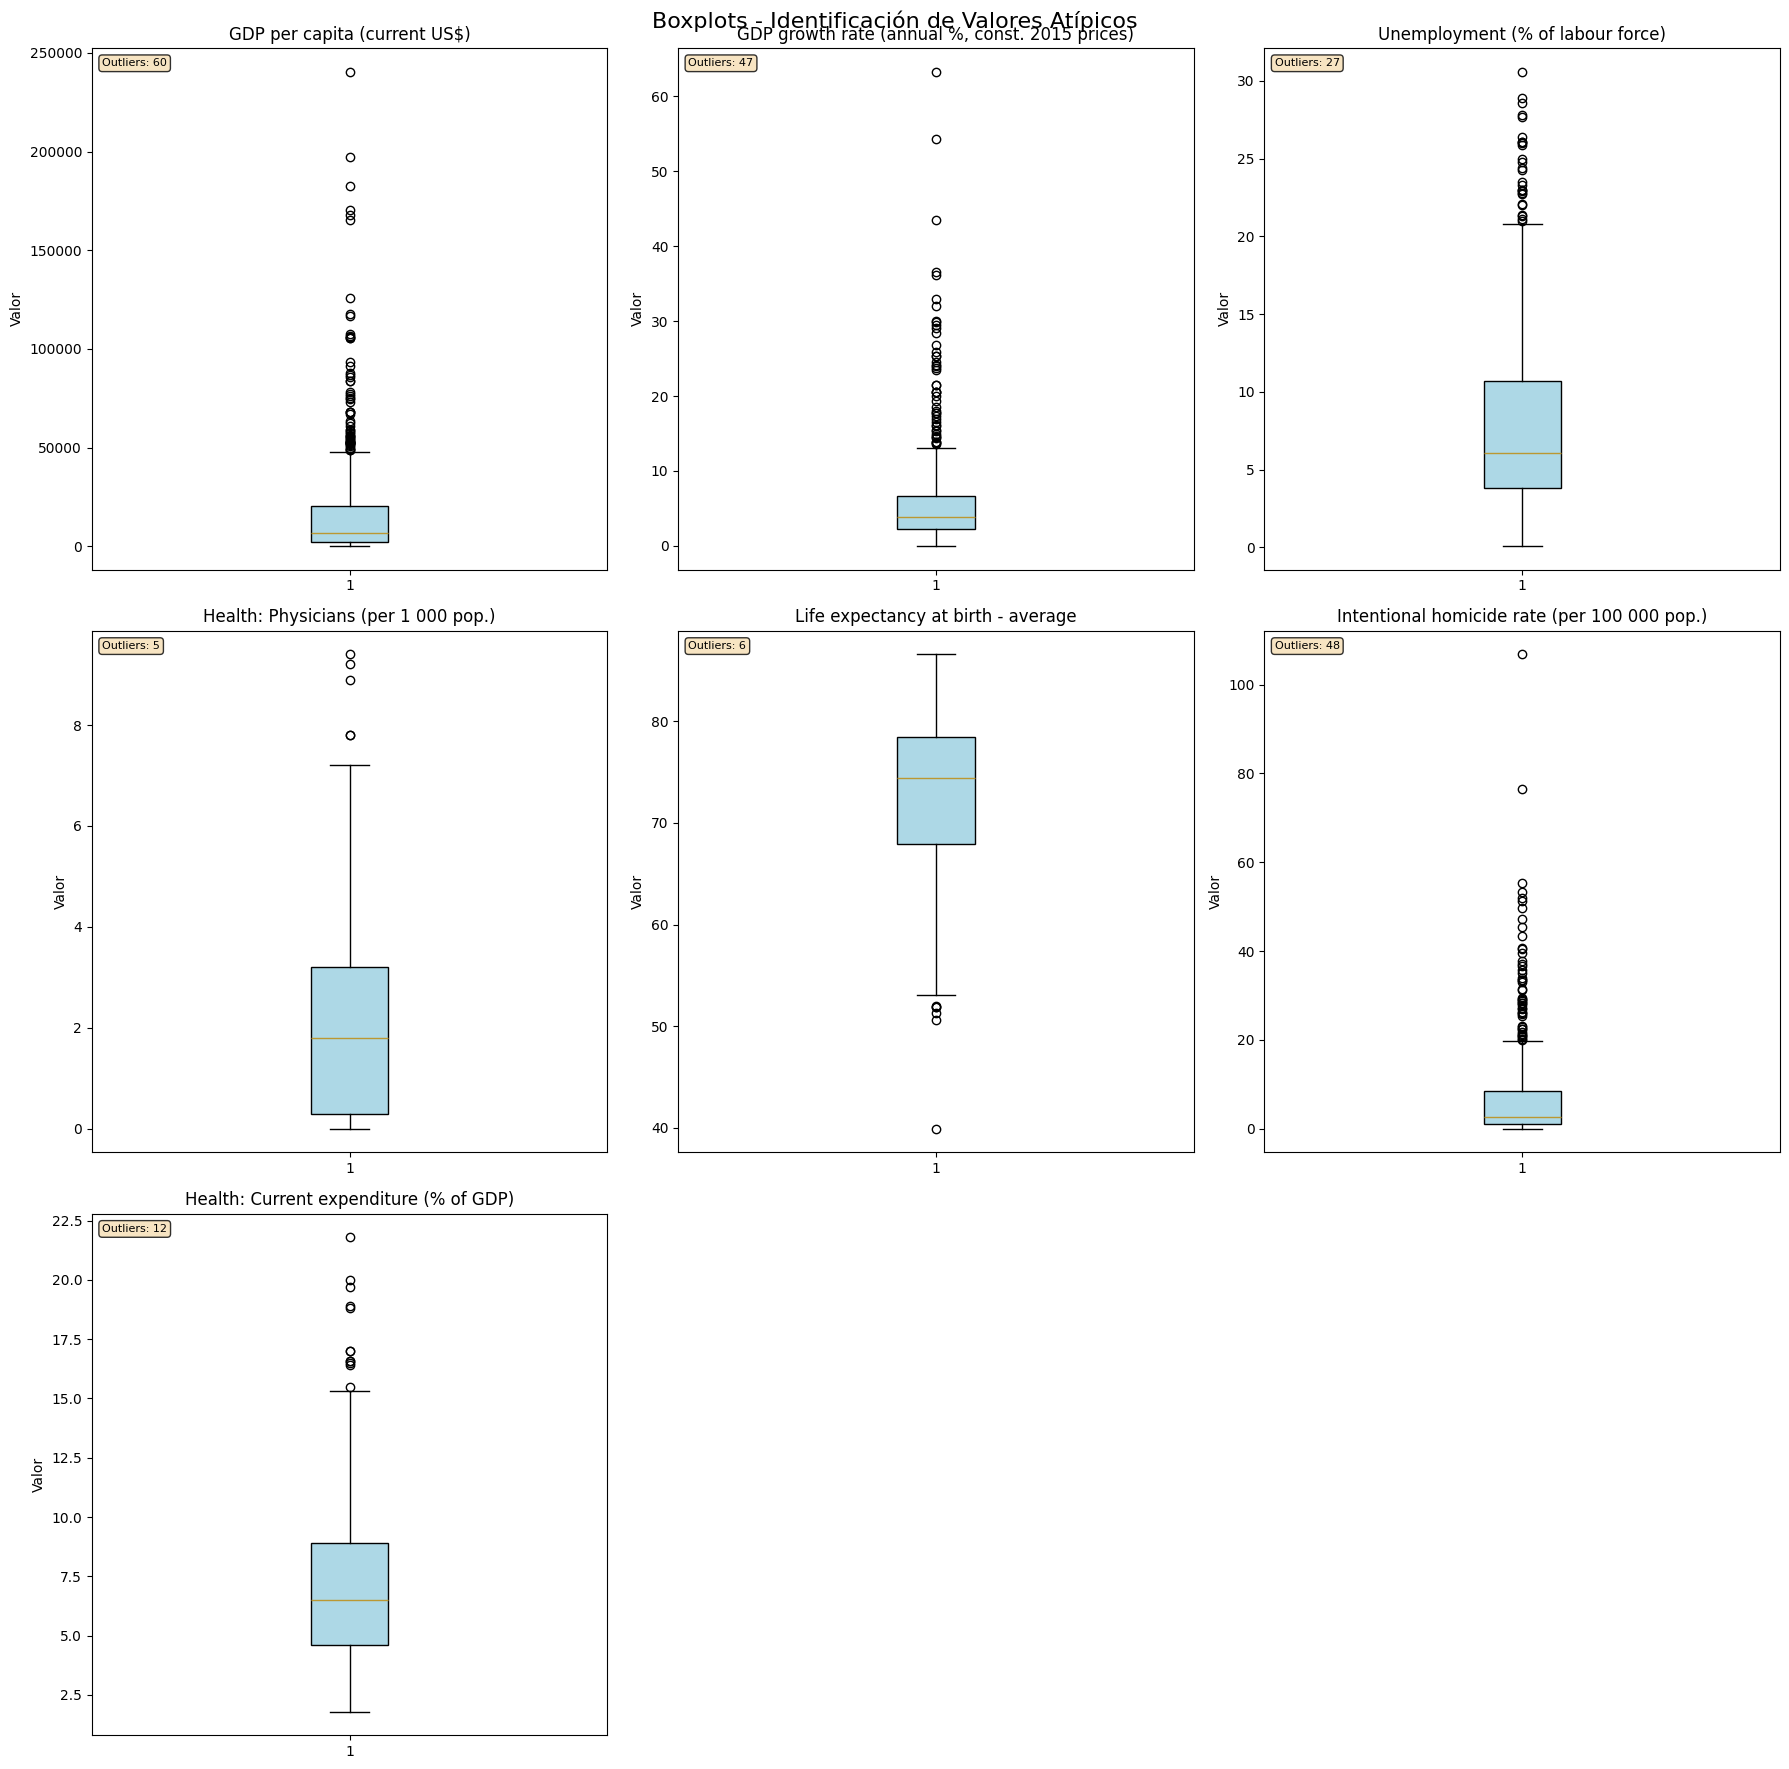

In [70]:
# Boxplots para identificar outliers
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
fig.suptitle('Boxplots - Identificación de Valores Atípicos', fontsize=16)

for i, var in enumerate(key_variables):
    row = i // n_cols
    col = i % n_cols
    
    # Filtrar valores no nulos
    data = df[var].dropna()
    
    if len(data) > 0:
        box_plot = axes[row, col].boxplot(data, patch_artist=True)
        box_plot['boxes'][0].set_facecolor('lightblue')
        axes[row, col].set_title(f'{var}')
        axes[row, col].set_ylabel('Valor')
        
        # Calcular y mostrar estadísticas de outliers
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        
        # Añadir texto con información de outliers
        axes[row, col].text(0.02, 0.98, f'Outliers: {len(outliers)}', 
                           transform=axes[row, col].transAxes, 
                           verticalalignment='top', fontsize=8,
                           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    else:
        axes[row, col].text(0.5, 0.5, 'Sin datos', transform=axes[row, col].transAxes, 
                           ha='center', va='center')
        axes[row, col].set_title(f'{var}\n(Sin datos)')

# Ocultar subplots vacíos
for i in range(len(key_variables), n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.savefig("../src/visualization/key_variables_boxplot.png", 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## 3. Análisis de Correlaciones

In [85]:
general_info = ['Country', 'Capital city', 'Exchange rate (per US$)',
       'National currency', 'Pop. density (per km2, 2024)',
       'Population (000, 2024)', 'Region', 'Sex ratio (m per 100 f)',
       'Surface area (km2)', 'UN membership date', 'Capital_city_pop'
       ]

social_indicators = ['Country', 'Year', 'Education: Government expenditure (% of GDP)',
       'Fertility rate, total (live births per woman)',
       'Health: Current expenditure (% of GDP)',
       'Health: Physicians (per 1 000 pop.)',
       'Intentional homicide rate (per 100 000 pop.)',
       'Population growth rate (average annual %)',
       'Refugees and others of concern to UNHCR (000)',
       'Seats held by women in national parliaments (%)',
       'Under five mortality rate (per 1000 live births)',
       'Urban population (% of total population)',
       #'Urban population growth rate (average annual %)',
       "Education: Primary gross enrol. ratio - average",
       "Education: Primary gross enrol. brecha",
       #'Education: Primary gross enrol. ratio - Female (per 100 pop.)',
       #'Education: Primary gross enrol. ratio - Male (per 100 pop.)',
       #'Education: Primary gross enrol. ratio - Female/Education: Primary gross enrol. ratio - Male Ratio',
       "Education: Upper Sec. gross enrol. ratio - average",
       "Education: Upper Sec. gross enrol brecha",
       #'Education: Upper Sec. gross enrol. ratio - Female (per 100 pop.)',
       #'Education: Upper Sec. gross enrol. ratio - Male (per 100 pop.)',
       #'Education: Upper Sec. gross enrol. ratio - Female/Education: Upper Sec. gross enrol. ratio - Male Ratio',
       "Education: Lower Sec. gross enrol. ratio - average",
       "Education: Lower Sec. gross enrol brecha",
       #'Education: Lower Sec. gross enrol. ratio - Female (per 100 pop.)',
       #'Education: Lower Sec. gross enrol. ratio - Male (per 100 pop.)',
       #'Education: Lower Sec. gross enrol. ratio - Female/Education: Lower Sec. gross enrol. ratio - Male Ratio',
       #'International migrant stock (000)',
       'International migrant stock (% of total pop.)',
       'International migrant stock/International migrant stock Ratio',
       #'Life expectancy at birth - Female (years)',
       #'Life expectancy at birth - Male (years)',
       "Life expectancy at birth - average",
       #'Life expectancy at birth - Female/Life expectancy at birth - Male Ratio',
       'Population age distribution - 0-14 years (%)',
       'Population age distribution - 60+ years (%)',
       #'Population age distribution - 0-14 years/Population age distribution - 60+ years Ratio'
       ]

economic_indicators = ['Country', 'Year', 'Agricultural production index (2014-2016=100)',
       'Balance of payments, current account (million US$)',
       'CPI: Consumer Price Index (2010=100)',
       'Economy: Agriculture (% of Gross Value Added)',
       'Economy: Industry (% of Gross Value Added)',
       'Economy: Services and other activity (% of GVA)',
       'Employment in agriculture (% of employed)',
       'Employment in industry (% of employed)',
       'Employment in services (% employed)',
       'GDP growth rate (annual %, const. 2015 prices)',
       'GDP per capita (current US$)',
       'GDP: Gross domestic product (million current US$)',
       'International trade: balance (million current US$)',
       'International trade: exports (million current US$)',
       'International trade: imports (million current US$)',
       'Unemployment (% of labour force)',
       'Labour force participation rate - Female (per 100 pop.)',
       'Labour force participation rate - Male (per 100 pop.)',
       #'Labour force participation rate - Female/Labour force participation rate - Male Ratio'
       ]

env_infrastructure_indicators = ['Country', 'Year', 'Energy production, primary (Petajoules)',
       'Energy supply per capita (Gigajoules)',
       'Forested area (% of land area)',
       'Important sites for terrestrial biodiversity protected (%)',
       'Individuals using the Internet (per 100 inhabitants)',
       'Net Official Development Assist. disbursed (% of GNI)',
       'Net Official Development Assist. received (% of GNI)',
       'Research & Development expenditure (% of GDP)',
       'Threatened species (number)',
       'Tourist/visitor arrivals at national borders (000)',
       'CO2 emission estimates - Total (million tons)',
       'CO2 emission estimates - Per capita (tons per capita)',
       #'CO2 emission estimates - Total/CO2 emission estimates - Per capita Ratio',
       'Pop. using safely managed drinking water - Urban (%)',
       'Pop. using safely managed drinking water - Rural (%)',
       #'Pop. using safely managed drinking water - Urban/Pop. using safely managed drinking water - Rural Ratio',
       'Pop. using safely managed sanitation - Urban (%)',
       'Pop. using safely managed sanitation - Rural (%)',
       #'Pop. using safely managed sanitation - Urban/Pop. using safely managed sanitation - Rural Ratio'
       ]

In [86]:
# ANÁLISIS DE CORRELACIÓN POR CATEGORÍAS - USANDO DF EXISTENTE
print("🔍 ANÁLISIS DE CORRELACIÓN POR CATEGORÍAS DE VARIABLES")
print("="*70)

# Función para crear matriz de correlación por categoría
def analyze_category_correlation(df, var_list, category_name, save_name):
    print(f"\n{'='*60}")
    print(f"📊 ANÁLISIS: {category_name.upper()}")
    print(f"{'='*60}")
    
    # Filtrar variables que existen en el dataset
    available_vars = [var for var in var_list if var in df.columns]
    print(f"Variables disponibles de la lista: {len(available_vars)}/{len(var_list)}")
    
    if len(available_vars) == 0:
        print("❌ No hay variables disponibles de esta categoría")
        return None, None
    
    # Seleccionar solo variables numéricas
    numeric_vars = df[available_vars].select_dtypes(include=[np.number]).columns.tolist()
    print(f"Variables numéricas encontradas: {len(numeric_vars)}")
    
    if len(numeric_vars) < 2:
        print("❌ Insuficientes variables numéricas para matriz de correlación")
        return None, None
    
    # Mostrar variables numéricas con calidad de datos
    print(f"\n📋 VARIABLES NUMÉRICAS INCLUIDAS:")
    print("-" * 50)
    missing_stats = df[numeric_vars].isnull().sum() / len(df) * 100
    for i, var in enumerate(numeric_vars, 1):
        missing_pct = missing_stats[var]
        quality = "🟢" if missing_pct <= 5 else "🟡" if missing_pct <= 15 else "🟠" if missing_pct <= 30 else "🔴"
        print(f"{i:2d}. {var:<45} {quality} ({missing_pct:.1f}% faltantes)")
    
    # Calcular matriz de correlación
    print(f"\n🔄 Calculando matriz de correlación...")
    corr_matrix = df[numeric_vars].corr()
    
    # Crear visualización
    plt.figure(figsize=(max(12, len(numeric_vars)), max(10, len(numeric_vars))))
    
    # Crear máscara para la mitad superior
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Heatmap
    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=True, 
                cmap='RdBu_r', 
                center=0,
                square=True,
                fmt='.2f',
                cbar_kws={"shrink": .8},
                annot_kws={'size': max(6, min(10, 80//len(numeric_vars)))})  # Ajustar tamaño texto
    
    plt.title(f'Matriz de Correlación - {category_name}\n' + 
              f'({len(numeric_vars)} variables numéricas)', 
              fontsize=14, pad=20)
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(rotation=0, fontsize=9)
    plt.tight_layout()
    
    # Guardar visualización
    plt.savefig(f"../src/visualization/correlation_matrix_{save_name}.png", 
                dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
    
    # Análisis de correlaciones significativas
    correlation_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            var1 = corr_matrix.columns[i]
            var2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]
            if not np.isnan(corr_value):
                correlation_pairs.append({
                    'Variable_1': var1,
                    'Variable_2': var2,
                    'Correlacion': corr_value,
                    'Correlacion_Abs': abs(corr_value)
                })
    
    corr_df = pd.DataFrame(correlation_pairs)
    corr_df = corr_df.sort_values('Correlacion_Abs', ascending=False)
    
    # Correlaciones significativas (|r| >= 0.3)
    significant_corr = corr_df[corr_df['Correlacion_Abs'] >= 0.3]
    
    print(f"\n📊 RESUMEN DE CORRELACIONES:")
    print(f"  • Total pares analizados: {len(corr_df)}")
    print(f"  • Correlaciones significativas (|r|≥0.3): {len(significant_corr)}")
    
    if len(significant_corr) > 0:
        # Estadísticas por fuerza
        very_strong = len(significant_corr[significant_corr['Correlacion_Abs'] >= 0.8])
        strong = len(significant_corr[(significant_corr['Correlacion_Abs'] >= 0.6) & 
                                    (significant_corr['Correlacion_Abs'] < 0.8)])
        moderate = len(significant_corr[(significant_corr['Correlacion_Abs'] >= 0.4) & 
                                      (significant_corr['Correlacion_Abs'] < 0.6)])
        weak = len(significant_corr[(significant_corr['Correlacion_Abs'] >= 0.3) & 
                                  (significant_corr['Correlacion_Abs'] < 0.4)])
        
        print(f"  🔴 Muy fuertes (|r|≥0.8):     {very_strong:>3}")
        print(f"  🟠 Fuertes (0.6≤|r|<0.8):     {strong:>3}")
        print(f"  🟡 Moderadas (0.4≤|r|<0.6):   {moderate:>3}")
        print(f"  🔵 Débiles (0.3≤|r|<0.4):     {weak:>3}")
        
        print(f"\n🔥 TOP 10 CORRELACIONES MÁS FUERTES:")
        print("-" * 85)
        for idx, row in significant_corr.head(10).iterrows():
            strength = "🔴" if abs(row['Correlacion']) >= 0.8 else "🟠" if abs(row['Correlacion']) >= 0.6 else "🟡" if abs(row['Correlacion']) >= 0.4 else "🔵"
            print(f"{row['Variable_1']:<35} ↔ {row['Variable_2']:<35} | r = {row['Correlacion']:+.3f} {strength}")
    
    else:
        print("  ❌ No se encontraron correlaciones significativas")
        # Mostrar las más altas aunque sean débiles
        print(f"\n🔍 TOP 5 CORRELACIONES MÁS ALTAS:")
        print("-" * 85)
        for idx, row in corr_df.head(5).iterrows():
            print(f"{row['Variable_1']:<35} ↔ {row['Variable_2']:<35} | r = {row['Correlacion']:+.3f}")
    
    
    return corr_matrix, corr_df

print("\n🚀 INICIANDO ANÁLISIS POR CATEGORÍAS...")
print("="*70)

🔍 ANÁLISIS DE CORRELACIÓN POR CATEGORÍAS DE VARIABLES

🚀 INICIANDO ANÁLISIS POR CATEGORÍAS...



📊 ANÁLISIS: INFORMACIÓN GENERAL
Variables disponibles de la lista: 11/11
Variables numéricas encontradas: 6

📋 VARIABLES NUMÉRICAS INCLUIDAS:
--------------------------------------------------
 1. Exchange rate (per US$)                       🟢 (0.4% faltantes)
 2. Pop. density (per km2, 2024)                  🟢 (0.9% faltantes)
 3. Population (000, 2024)                        🟢 (0.9% faltantes)
 4. Sex ratio (m per 100 f)                       🟢 (0.9% faltantes)
 5. Surface area (km2)                            🟢 (2.6% faltantes)
 6. Capital_city_pop                              🟢 (0.4% faltantes)

🔄 Calculando matriz de correlación...


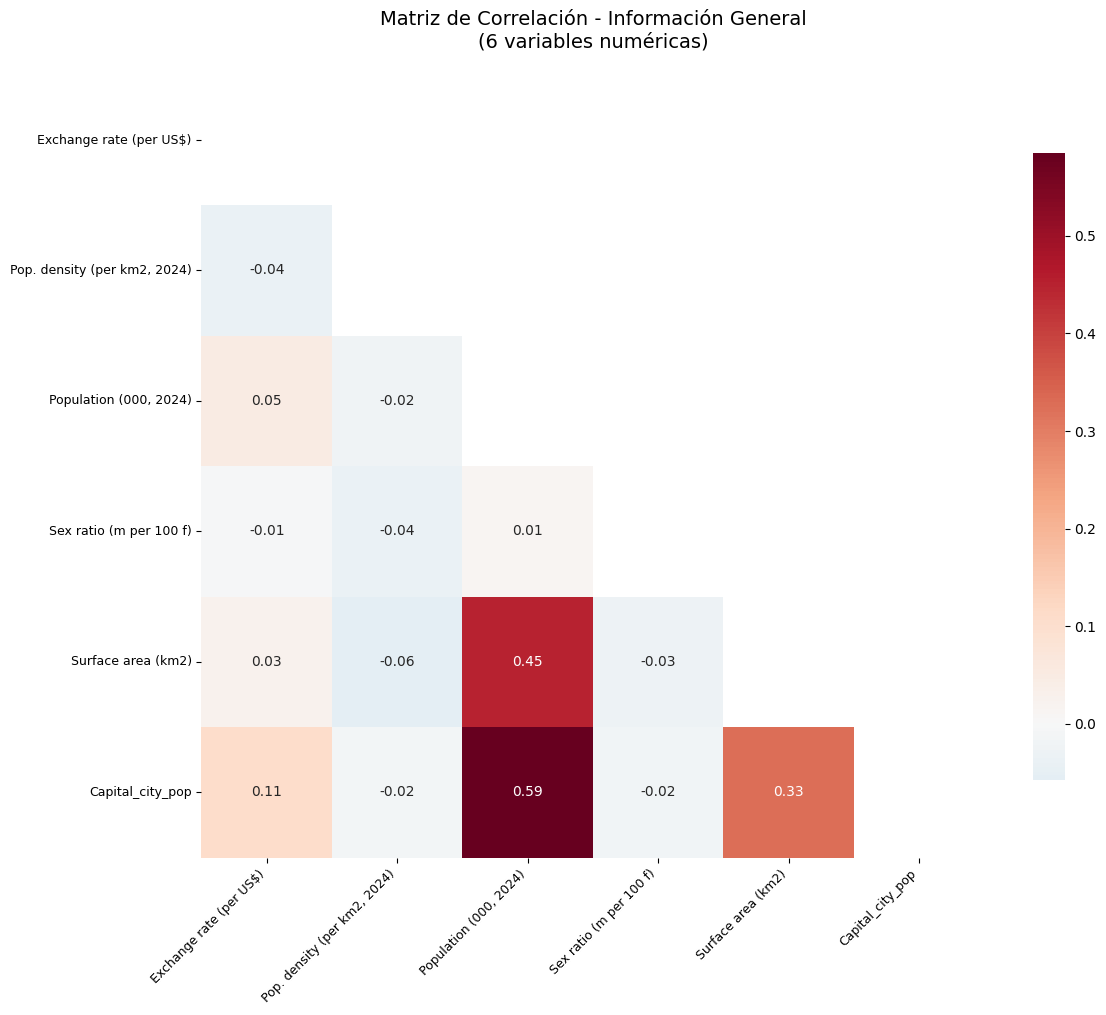


📊 RESUMEN DE CORRELACIONES:
  • Total pares analizados: 15
  • Correlaciones significativas (|r|≥0.3): 3
  🔴 Muy fuertes (|r|≥0.8):       0
  🟠 Fuertes (0.6≤|r|<0.8):       0
  🟡 Moderadas (0.4≤|r|<0.6):     2
  🔵 Débiles (0.3≤|r|<0.4):       1

🔥 TOP 10 CORRELACIONES MÁS FUERTES:
-------------------------------------------------------------------------------------
Population (000, 2024)              ↔ Capital_city_pop                    | r = +0.585 🟡
Population (000, 2024)              ↔ Surface area (km2)                  | r = +0.448 🟡
Surface area (km2)                  ↔ Capital_city_pop                    | r = +0.329 🔵


In [87]:
# 1. ANÁLISIS DE INFORMACIÓN GENERAL
general_corr_matrix, general_corr_df = analyze_category_correlation(
    df, 
    general_info, 
    "Información General", 
    "general_info"
)


📊 ANÁLISIS: INDICADORES SOCIALES
Variables disponibles de la lista: 22/23
Variables numéricas encontradas: 21

📋 VARIABLES NUMÉRICAS INCLUIDAS:
--------------------------------------------------
 1. Year                                          🟢 (0.0% faltantes)
 2. Education: Government expenditure (% of GDP)  🔴 (34.1% faltantes)
 3. Fertility rate, total (live births per woman) 🟢 (0.9% faltantes)
 4. Health: Current expenditure (% of GDP)        🟠 (18.4% faltantes)
 5. Health: Physicians (per 1 000 pop.)           🔴 (31.8% faltantes)
 6. Intentional homicide rate (per 100 000 pop.)  🔴 (35.8% faltantes)
 7. Population growth rate (average annual %)     🟢 (0.9% faltantes)
 8. Refugees and others of concern to UNHCR (000) 🟠 (19.0% faltantes)
 9. Seats held by women in national parliaments (%) 🟠 (17.5% faltantes)
10. Under five mortality rate (per 1000 live births) 🟢 (0.9% faltantes)
11. Urban population (% of total population)      🔴 (33.3% faltantes)
12. Education: Primary gross enro

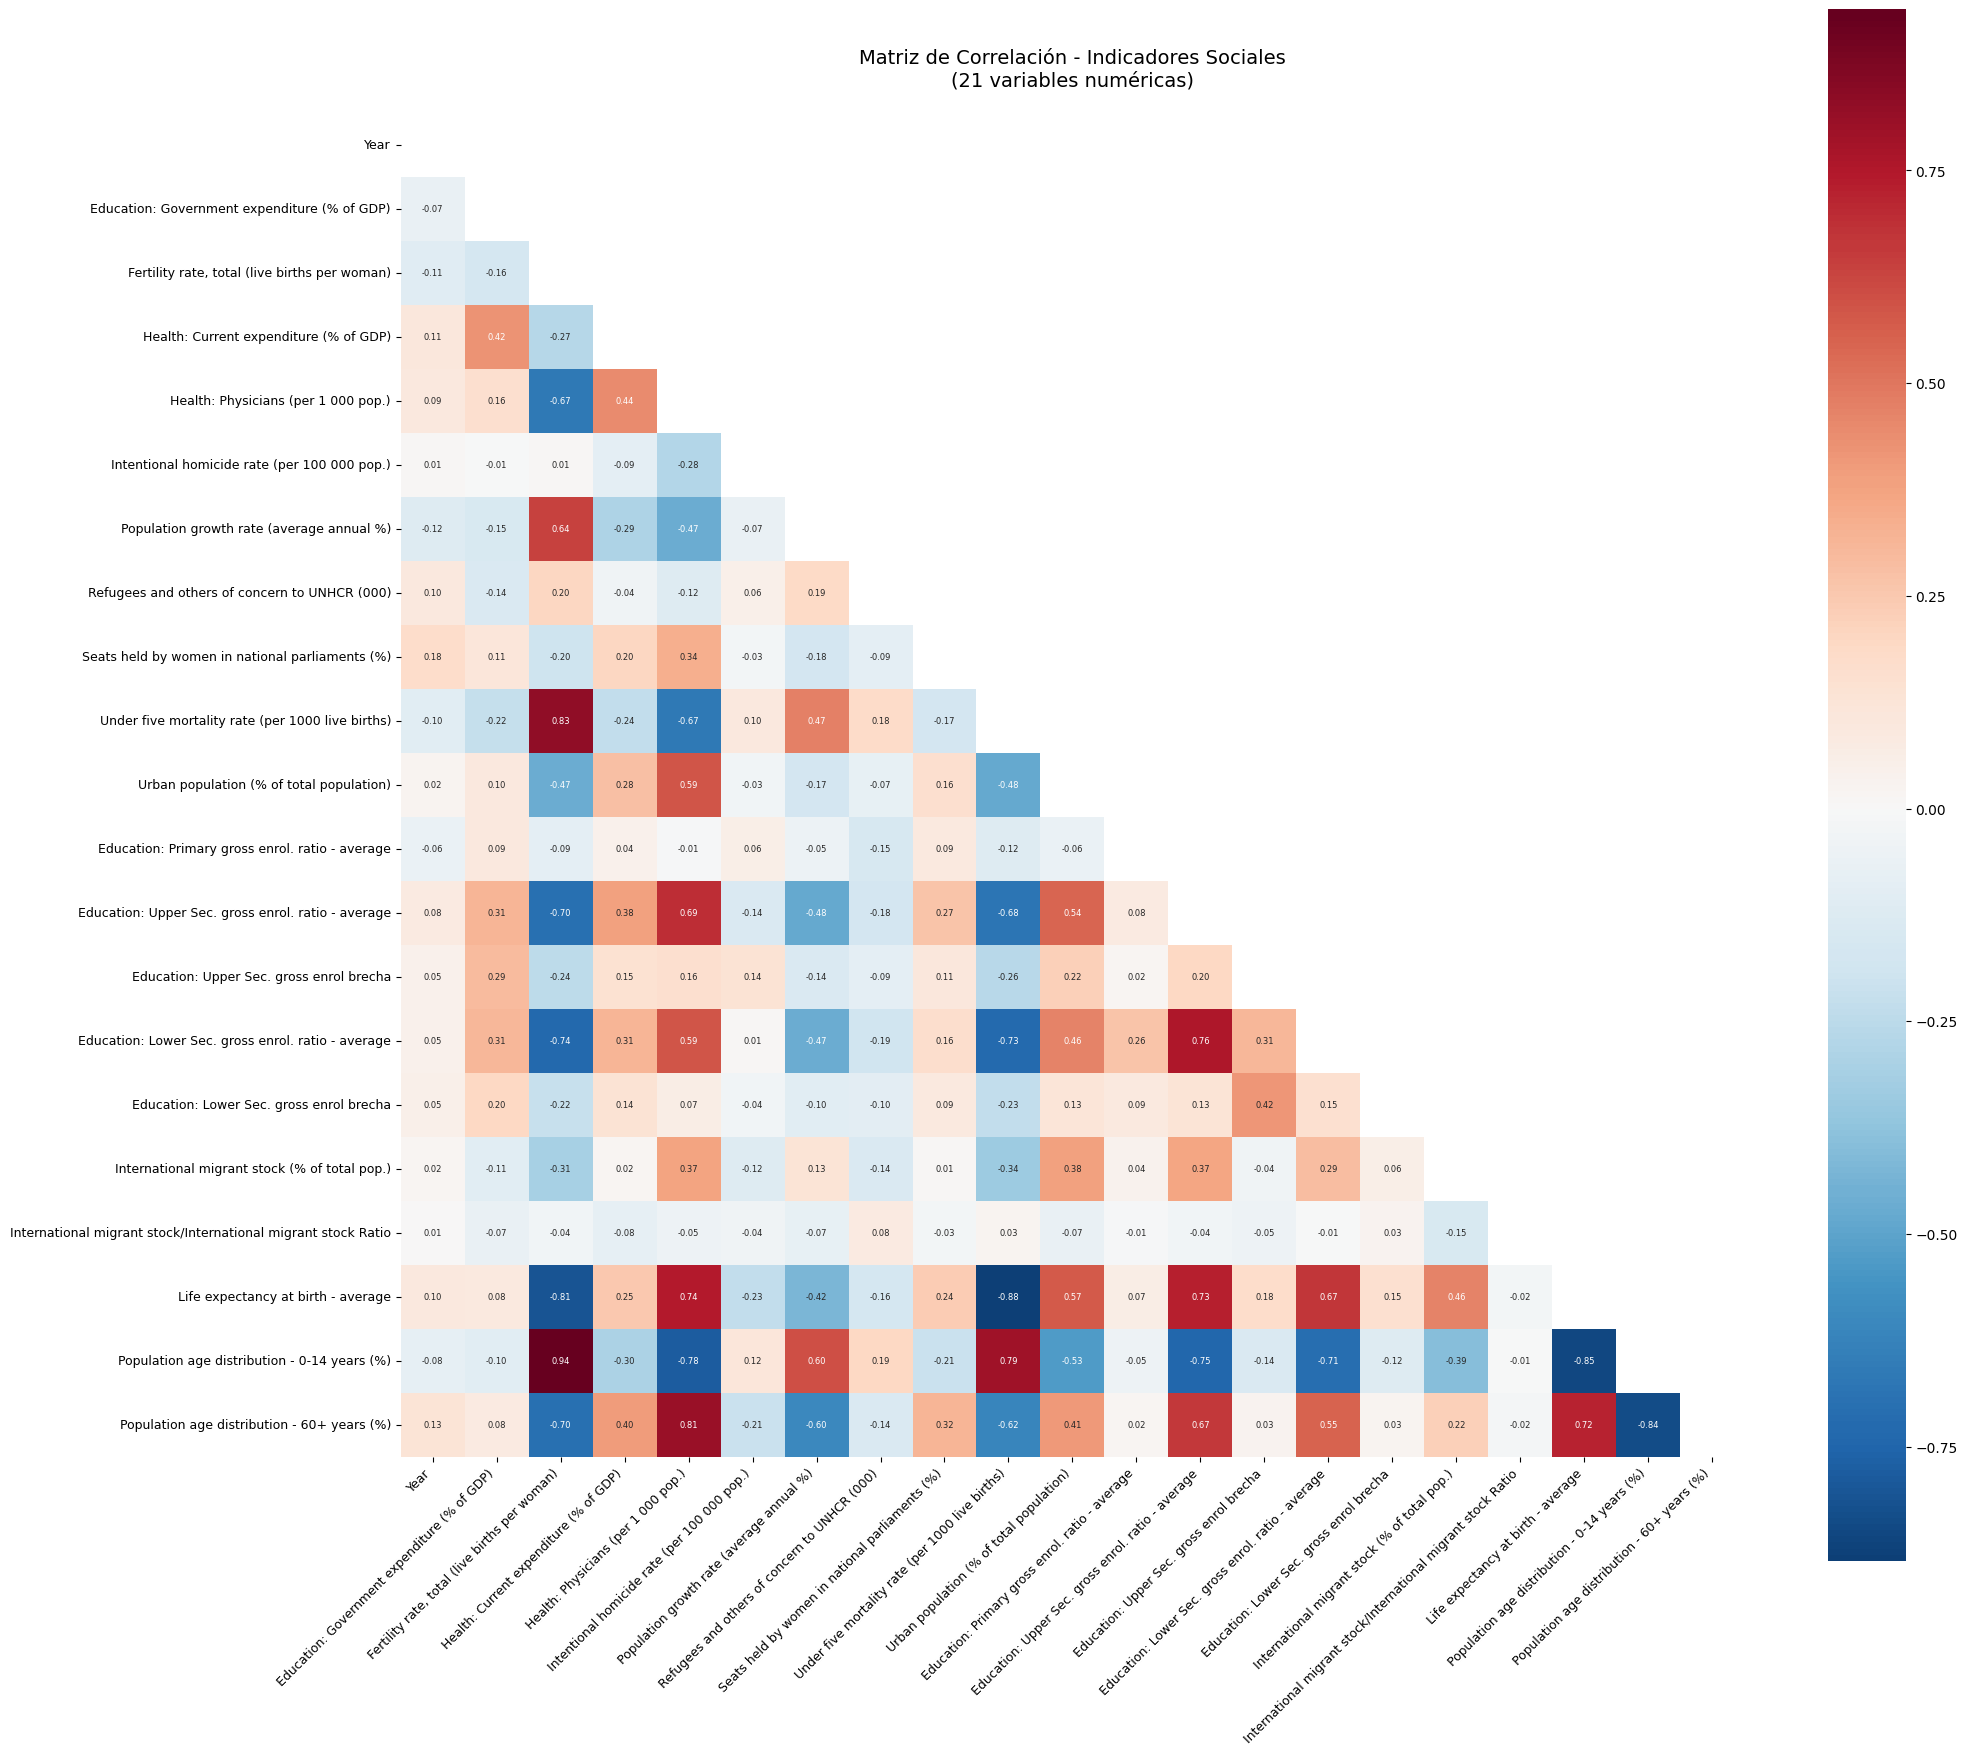


📊 RESUMEN DE CORRELACIONES:
  • Total pares analizados: 210
  • Correlaciones significativas (|r|≥0.3): 62
  🔴 Muy fuertes (|r|≥0.8):       7
  🟠 Fuertes (0.6≤|r|<0.8):      22
  🟡 Moderadas (0.4≤|r|<0.6):    19
  🔵 Débiles (0.3≤|r|<0.4):      14

🔥 TOP 10 CORRELACIONES MÁS FUERTES:
-------------------------------------------------------------------------------------
Fertility rate, total (live births per woman) ↔ Population age distribution - 0-14 years (%) | r = +0.939 🔴
Under five mortality rate (per 1000 live births) ↔ Life expectancy at birth - average  | r = -0.884 🔴
Life expectancy at birth - average  ↔ Population age distribution - 0-14 years (%) | r = -0.850 🔴
Population age distribution - 0-14 years (%) ↔ Population age distribution - 60+ years (%) | r = -0.841 🔴
Fertility rate, total (live births per woman) ↔ Under five mortality rate (per 1000 live births) | r = +0.829 🔴
Health: Physicians (per 1 000 pop.) ↔ Population age distribution - 60+ years (%) | r = +0.809 🔴
Fertil

In [88]:
# 2. ANÁLISIS DE INDICADORES SOCIALES
social_corr_matrix, social_corr_df = analyze_category_correlation(
    df, 
    social_indicators, 
    "Indicadores Sociales", 
    "social_indicators"
)


📊 ANÁLISIS: INDICADORES ECONÓMICOS
Variables disponibles de la lista: 20/20
Variables numéricas encontradas: 19

📋 VARIABLES NUMÉRICAS INCLUIDAS:
--------------------------------------------------
 1. Year                                          🟢 (0.0% faltantes)
 2. Agricultural production index (2014-2016=100) 🟡 (14.7% faltantes)
 3. Balance of payments, current account (million US$) 🟠 (19.3% faltantes)
 4. CPI: Consumer Price Index (2010=100)          🟠 (15.8% faltantes)
 5. Economy: Agriculture (% of Gross Value Added) 🟡 (10.8% faltantes)
 6. Economy: Industry (% of Gross Value Added)    🟡 (9.5% faltantes)
 7. Economy: Services and other activity (% of GVA) 🟡 (9.5% faltantes)
 8. Employment in agriculture (% of employed)     🟠 (17.0% faltantes)
 9. Employment in industry (% of employed)        🟠 (16.8% faltantes)
10. Employment in services (% employed)           🟠 (16.8% faltantes)
11. GDP growth rate (annual %, const. 2015 prices) 🟡 (9.5% faltantes)
12. GDP per capita (current 

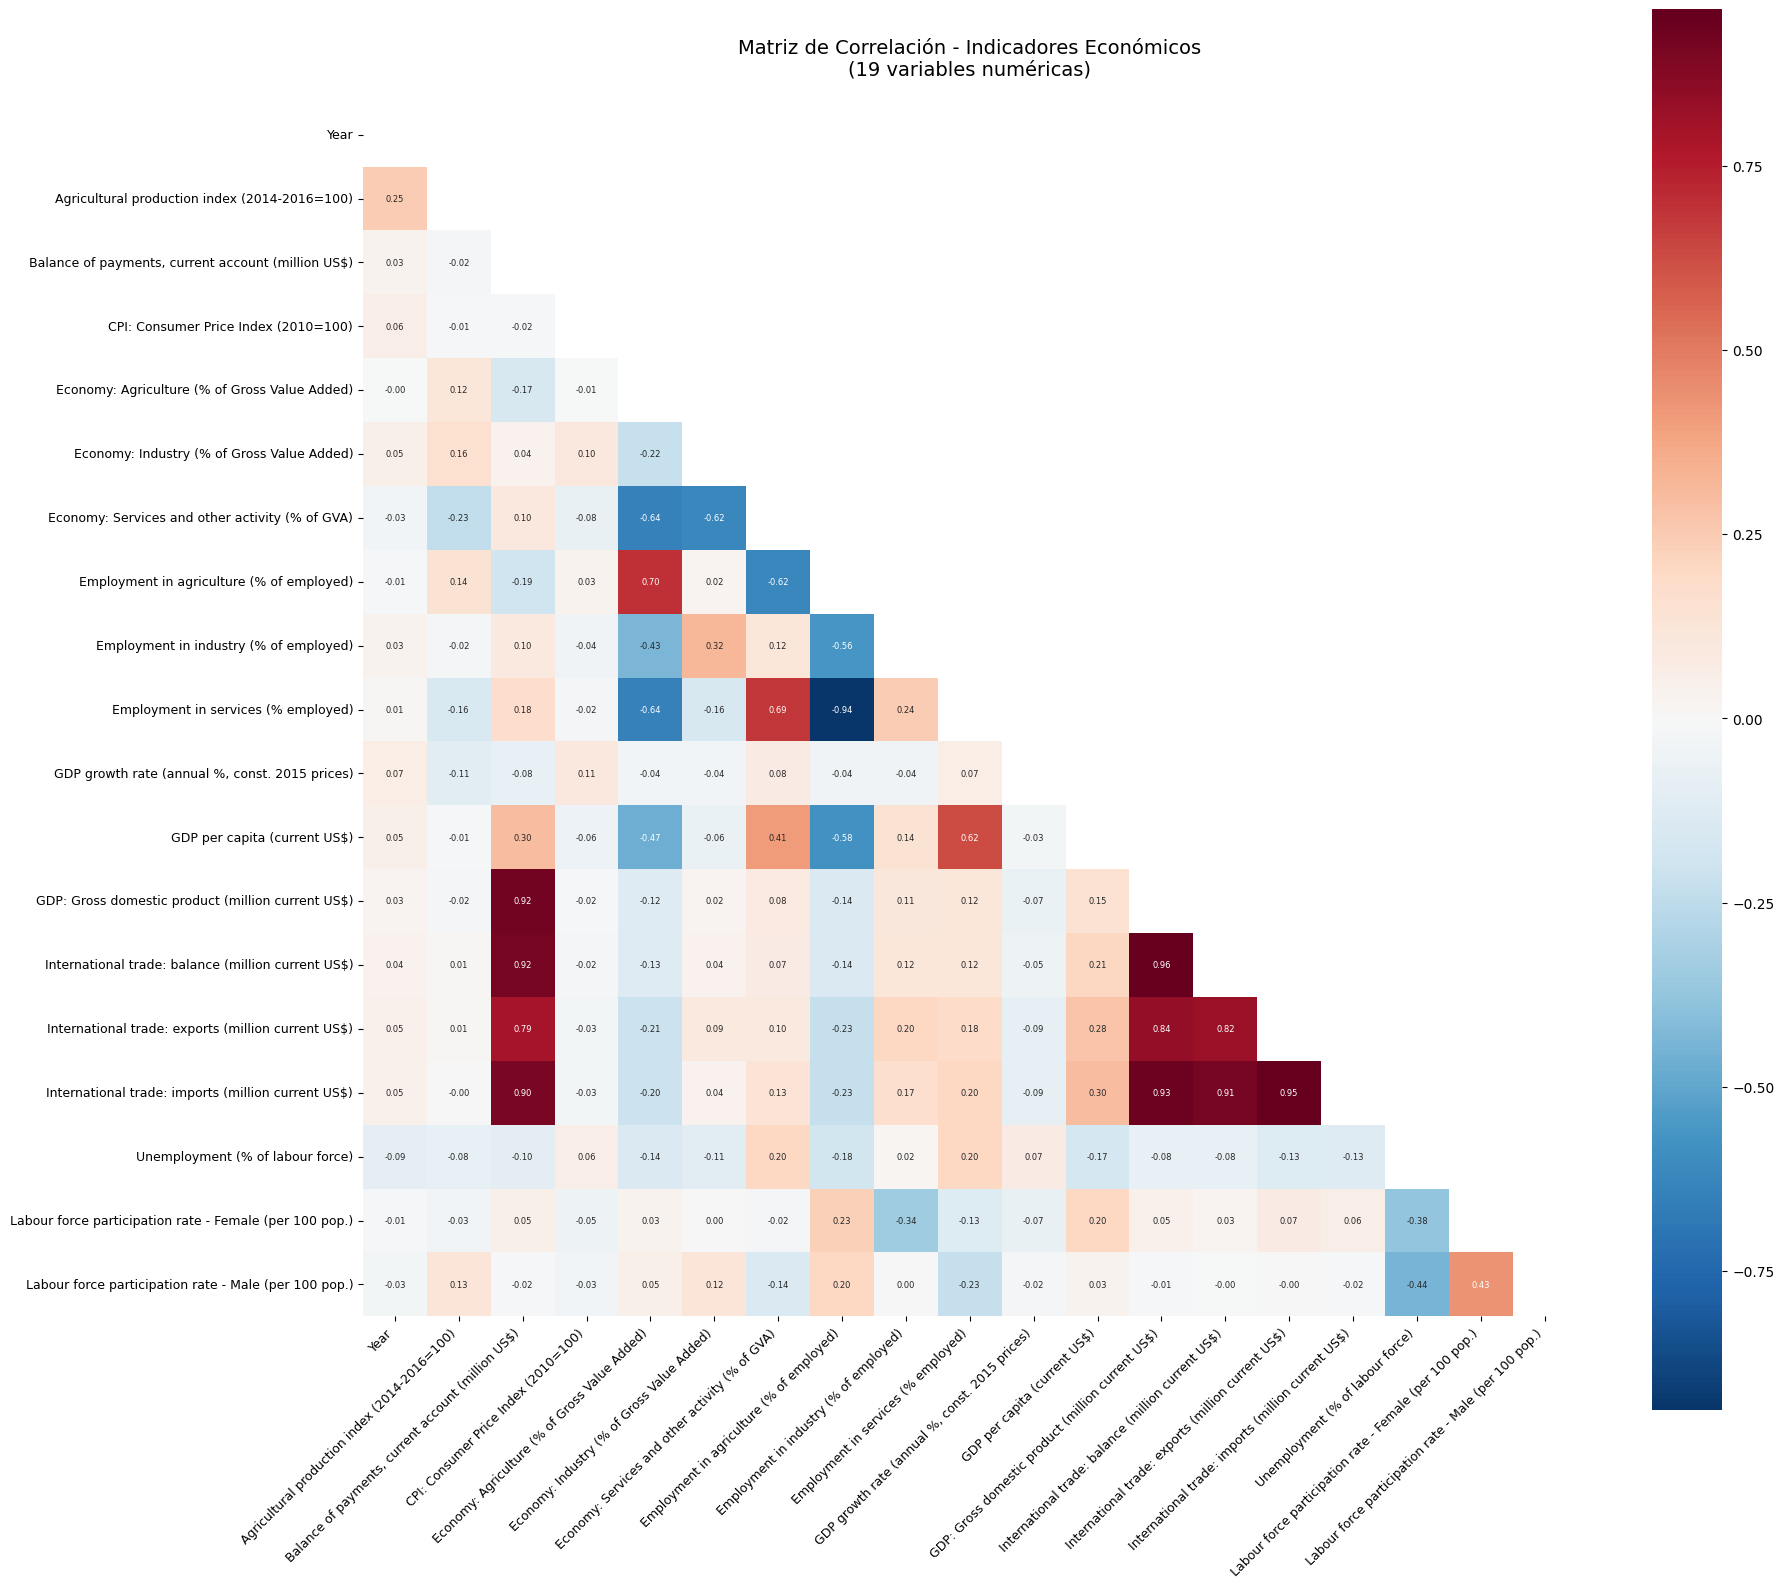


📊 RESUMEN DE CORRELACIONES:
  • Total pares analizados: 171
  • Correlaciones significativas (|r|≥0.3): 28
  🔴 Muy fuertes (|r|≥0.8):      10
  🟠 Fuertes (0.6≤|r|<0.8):       8
  🟡 Moderadas (0.4≤|r|<0.6):     7
  🔵 Débiles (0.3≤|r|<0.4):       3

🔥 TOP 10 CORRELACIONES MÁS FUERTES:
-------------------------------------------------------------------------------------
GDP: Gross domestic product (million current US$) ↔ International trade: balance (million current US$) | r = +0.962 🔴
International trade: exports (million current US$) ↔ International trade: imports (million current US$) | r = +0.948 🔴
Employment in agriculture (% of employed) ↔ Employment in services (% employed) | r = -0.938 🔴
GDP: Gross domestic product (million current US$) ↔ International trade: imports (million current US$) | r = +0.935 🔴
Balance of payments, current account (million US$) ↔ GDP: Gross domestic product (million current US$) | r = +0.922 🔴
Balance of payments, current account (million US$) ↔ Internat

In [75]:
# 3. ANÁLISIS DE INDICADORES ECONÓMICOS
economic_corr_matrix, economic_corr_df = analyze_category_correlation(
    df, 
    economic_indicators, 
    "Indicadores Económicos", 
    "economic_indicators"
)


📊 ANÁLISIS: INDICADORES AMBIENTALES E INFRAESTRUCTURA
Variables disponibles de la lista: 18/18
Variables numéricas encontradas: 17

📋 VARIABLES NUMÉRICAS INCLUIDAS:
--------------------------------------------------
 1. Year                                          🟢 (0.0% faltantes)
 2. Energy production, primary (Petajoules)       🟡 (5.7% faltantes)
 3. Energy supply per capita (Gigajoules)         🟢 (4.0% faltantes)
 4. Forested area (% of land area)                🟢 (0.9% faltantes)
 5. Important sites for terrestrial biodiversity protected (%) 🟢 (2.6% faltantes)
 6. Individuals using the Internet (per 100 inhabitants) 🟡 (12.5% faltantes)
 7. Net Official Development Assist. disbursed (% of GNI) 🔴 (82.6% faltantes)
 8. Net Official Development Assist. received (% of GNI) 🔴 (42.5% faltantes)
 9. Research & Development expenditure (% of GDP) 🔴 (54.3% faltantes)
10. Threatened species (number)                   🟢 (0.4% faltantes)
11. Tourist/visitor arrivals at national borders (000)

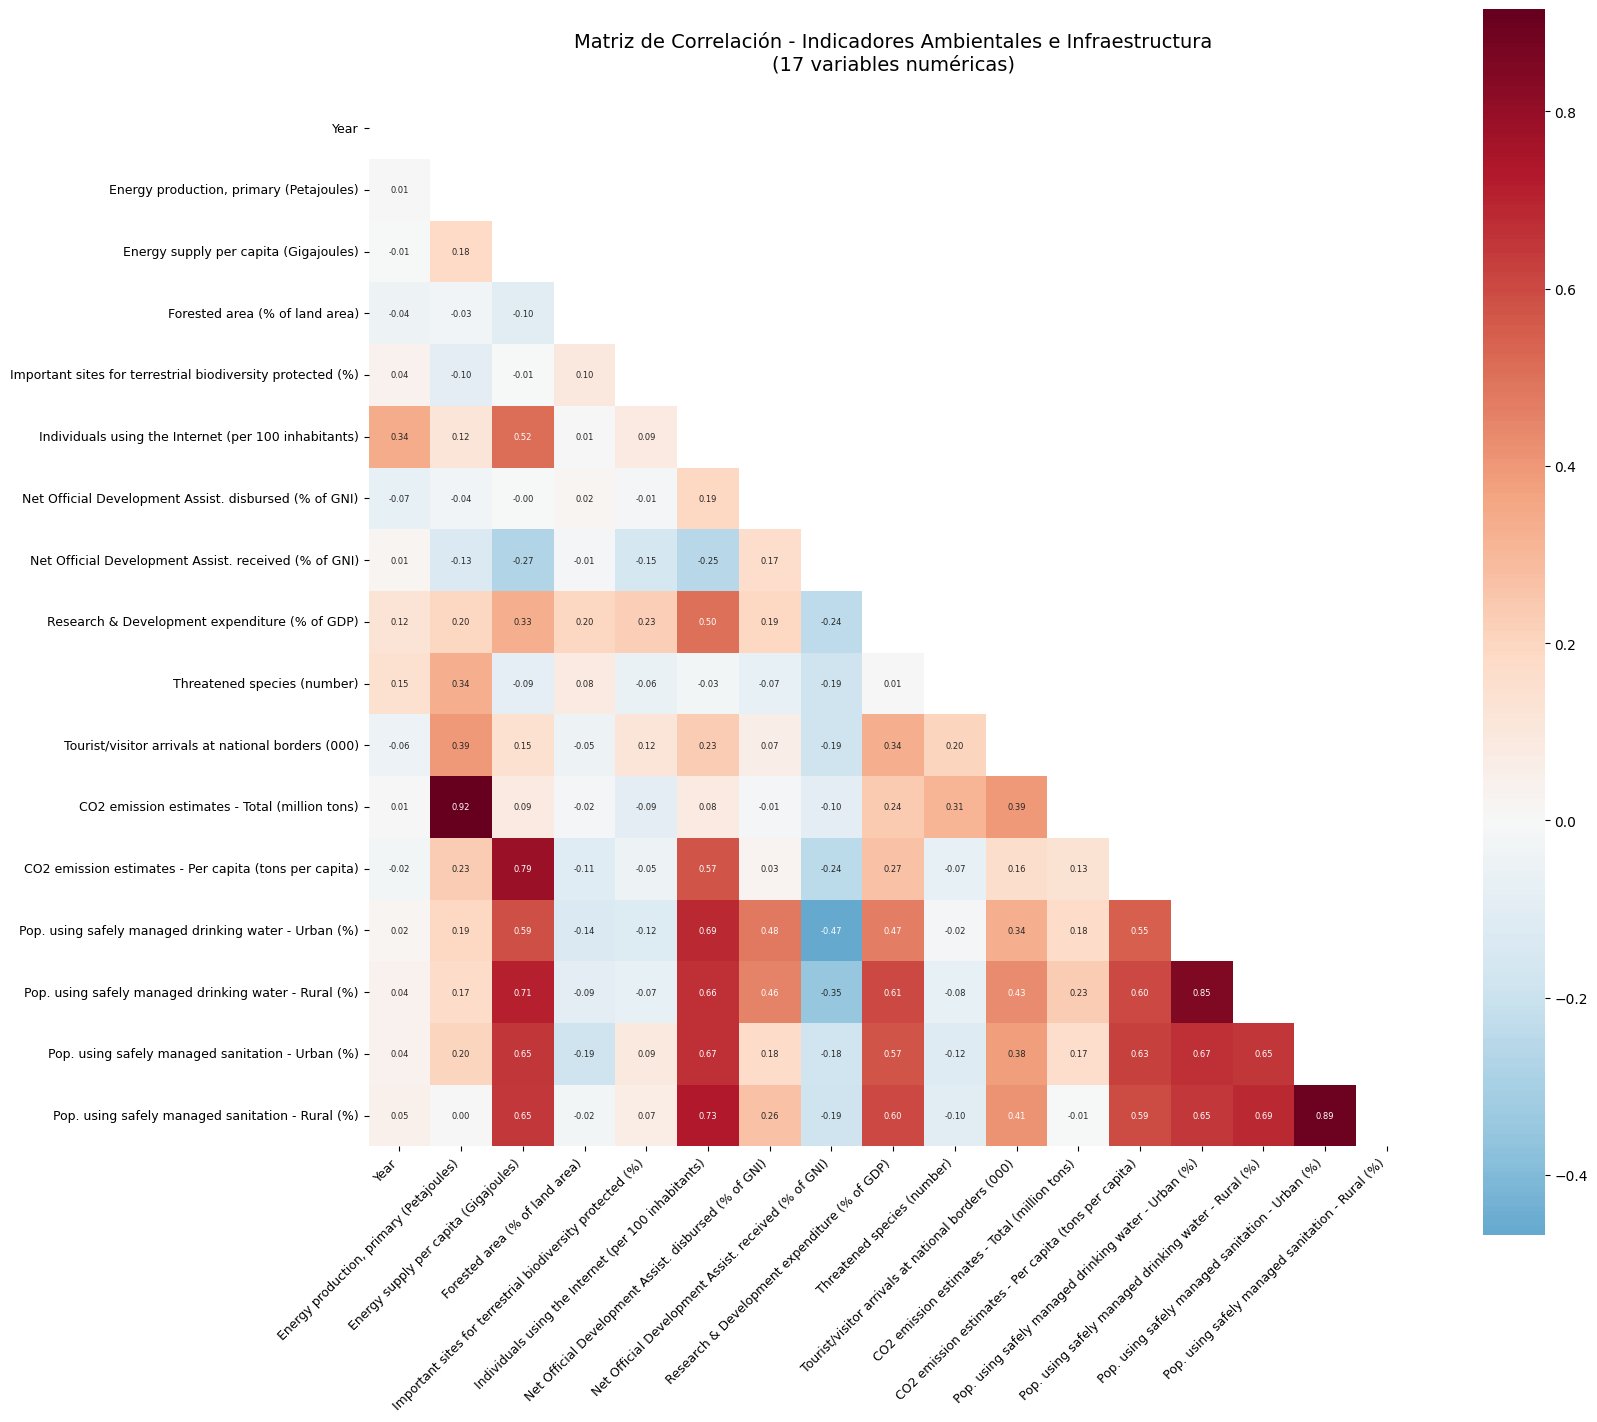


📊 RESUMEN DE CORRELACIONES:
  • Total pares analizados: 136
  • Correlaciones significativas (|r|≥0.3): 42
  🔴 Muy fuertes (|r|≥0.8):       3
  🟠 Fuertes (0.6≤|r|<0.8):      16
  🟡 Moderadas (0.4≤|r|<0.6):    13
  🔵 Débiles (0.3≤|r|<0.4):      10

🔥 TOP 10 CORRELACIONES MÁS FUERTES:
-------------------------------------------------------------------------------------
Energy production, primary (Petajoules) ↔ CO2 emission estimates - Total (million tons) | r = +0.915 🔴
Pop. using safely managed sanitation - Urban (%) ↔ Pop. using safely managed sanitation - Rural (%) | r = +0.895 🔴
Pop. using safely managed drinking water - Urban (%) ↔ Pop. using safely managed drinking water - Rural (%) | r = +0.852 🔴
Energy supply per capita (Gigajoules) ↔ CO2 emission estimates - Per capita (tons per capita) | r = +0.790 🟠
Individuals using the Internet (per 100 inhabitants) ↔ Pop. using safely managed sanitation - Rural (%) | r = +0.732 🟠
Energy supply per capita (Gigajoules) ↔ Pop. using safely ma

In [76]:
# 4. ANÁLISIS DE INDICADORES AMBIENTALES E INFRAESTRUCTURA
env_infra_corr_matrix, env_infra_corr_df = analyze_category_correlation(
    df, 
    env_infrastructure_indicators, 
    "Indicadores Ambientales e Infraestructura", 
    "env_infrastructure"
)

In [77]:
# RESUMEN COMPARATIVO DE TODAS LAS CATEGORÍAS
print("\n" + "="*80)
print("📋 RESUMEN COMPARATIVO DE CORRELACIONES POR CATEGORÍA")
print("="*80)

# Recopilar resultados de todas las categorías
categories_results = [
    ("Información General", general_corr_matrix, general_corr_df),
    ("Indicadores Sociales", social_corr_matrix, social_corr_df),
    ("Indicadores Económicos", economic_corr_matrix, economic_corr_df),
    ("Indicadores Ambientales e Infraestructura", env_infra_corr_matrix, env_infra_corr_df)
]

# Crear tabla resumen
summary_data = []
for category_name, corr_matrix, corr_df in categories_results:
    if corr_matrix is not None and corr_df is not None:
        # Estadísticas básicas
        n_variables = len(corr_matrix.columns)
        n_pairs = len(corr_df)
        
        # Correlaciones significativas
        significant = corr_df[corr_df['Correlacion_Abs'] >= 0.3]
        n_significant = len(significant)
        
        # Por fuerza
        very_strong = len(significant[significant['Correlacion_Abs'] >= 0.8])
        strong = len(significant[(significant['Correlacion_Abs'] >= 0.6) & 
                                (significant['Correlacion_Abs'] < 0.8)])
        moderate = len(significant[(significant['Correlacion_Abs'] >= 0.4) & 
                                 (significant['Correlacion_Abs'] < 0.6)])
        weak = len(significant[(significant['Correlacion_Abs'] >= 0.3) & 
                             (significant['Correlacion_Abs'] < 0.4)])
        
        # Correlación más fuerte
        max_corr = corr_df['Correlacion_Abs'].max() if len(corr_df) > 0 else 0
        
        summary_data.append({
            'Categoría': category_name,
            'Variables': n_variables,
            'Pares_Total': n_pairs,
            'Significativas': n_significant,
            'Muy_Fuertes': very_strong,
            'Fuertes': strong,
            'Moderadas': moderate,
            'Débiles': weak,
            'Max_Correlación': max_corr
        })
    else:
        summary_data.append({
            'Categoría': category_name,
            'Variables': 0,
            'Pares_Total': 0,
            'Significativas': 0,
            'Muy_Fuertes': 0,
            'Fuertes': 0,
            'Moderadas': 0,
            'Débiles': 0,
            'Max_Correlación': 0
        })

# Crear DataFrame resumen
summary_df = pd.DataFrame(summary_data)

print("\n📊 TABLA RESUMEN:")
print("-" * 120)
print(f"{'Categoría':<35} {'Vars':<5} {'Pares':<6} {'Signif':<7} {'M.Fuerte':<9} {'Fuerte':<7} {'Moder':<6} {'Débil':<6} {'Max |r|':<8}")
print("-" * 120)

for _, row in summary_df.iterrows():
    print(f"{row['Categoría']:<35} {row['Variables']:<5} {row['Pares_Total']:<6} {row['Significativas']:<7} "
          f"{row['Muy_Fuertes']:<9} {row['Fuertes']:<7} {row['Moderadas']:<6} {row['Débiles']:<6} {row['Max_Correlación']:<8.3f}")

print("-" * 120)

# Identificar la categoría con más correlaciones fuertes
best_category = summary_df.loc[summary_df['Significativas'].idxmax(), 'Categoría']
most_strong = summary_df.loc[summary_df['Muy_Fuertes'].idxmax(), 'Categoría']

print(f"\n🏆 DESTACADOS:")
print(f"• Categoría con más correlaciones significativas: {best_category}")
print(f"• Categoría con más correlaciones muy fuertes: {most_strong}")

# Top correlaciones por categoría
print(f"\n🔥 TOP CORRELACIÓN POR CATEGORÍA:")
print("-" * 80)
for category_name, corr_matrix, corr_df in categories_results:
    if corr_df is not None and len(corr_df) > 0:
        top_corr = corr_df.iloc[0]
        print(f"{category_name:<35}: r = {top_corr['Correlacion']:+.3f}")
        print(f"  {top_corr['Variable_1']} ↔ {top_corr['Variable_2']}")
    else:
        print(f"{category_name:<35}: Sin correlaciones disponibles")

print(f"\n📁 ARCHIVOS GUARDADOS EN src/visualization/:")
print("  • general_info_correlation_matrix.png")
print("  • social_indicators_correlation_matrix.png") 
print("  • economic_indicators_correlation_matrix.png")
print("  • env_infrastructure_correlation_matrix.png")

print(f"\n✅ Análisis de correlación por categorías completado")
print("="*80)


📋 RESUMEN COMPARATIVO DE CORRELACIONES POR CATEGORÍA

📊 TABLA RESUMEN:
------------------------------------------------------------------------------------------------------------------------
Categoría                           Vars  Pares  Signif  M.Fuerte  Fuerte  Moder  Débil  Max |r| 
------------------------------------------------------------------------------------------------------------------------
Información General                 6     15     3       0         0       2      1      0.585   
Indicadores Sociales                19    171    60      7         22      18     13     0.939   
Indicadores Económicos              19    171    28      10        8       7      3      0.962   
Indicadores Ambientales e Infraestructura 17    136    42      3         16      13     10     0.915   
------------------------------------------------------------------------------------------------------------------------

🏆 DESTACADOS:
• Categoría con más correlaciones significativas: Indi

## 4. Análisis de Series de Tiempo

Países seleccionados para análisis temporal: ['United States of America', 'China', 'Germany', 'Brazil', 'India']
Grupo 1: 4 variables
Grupo 2: 3 variables


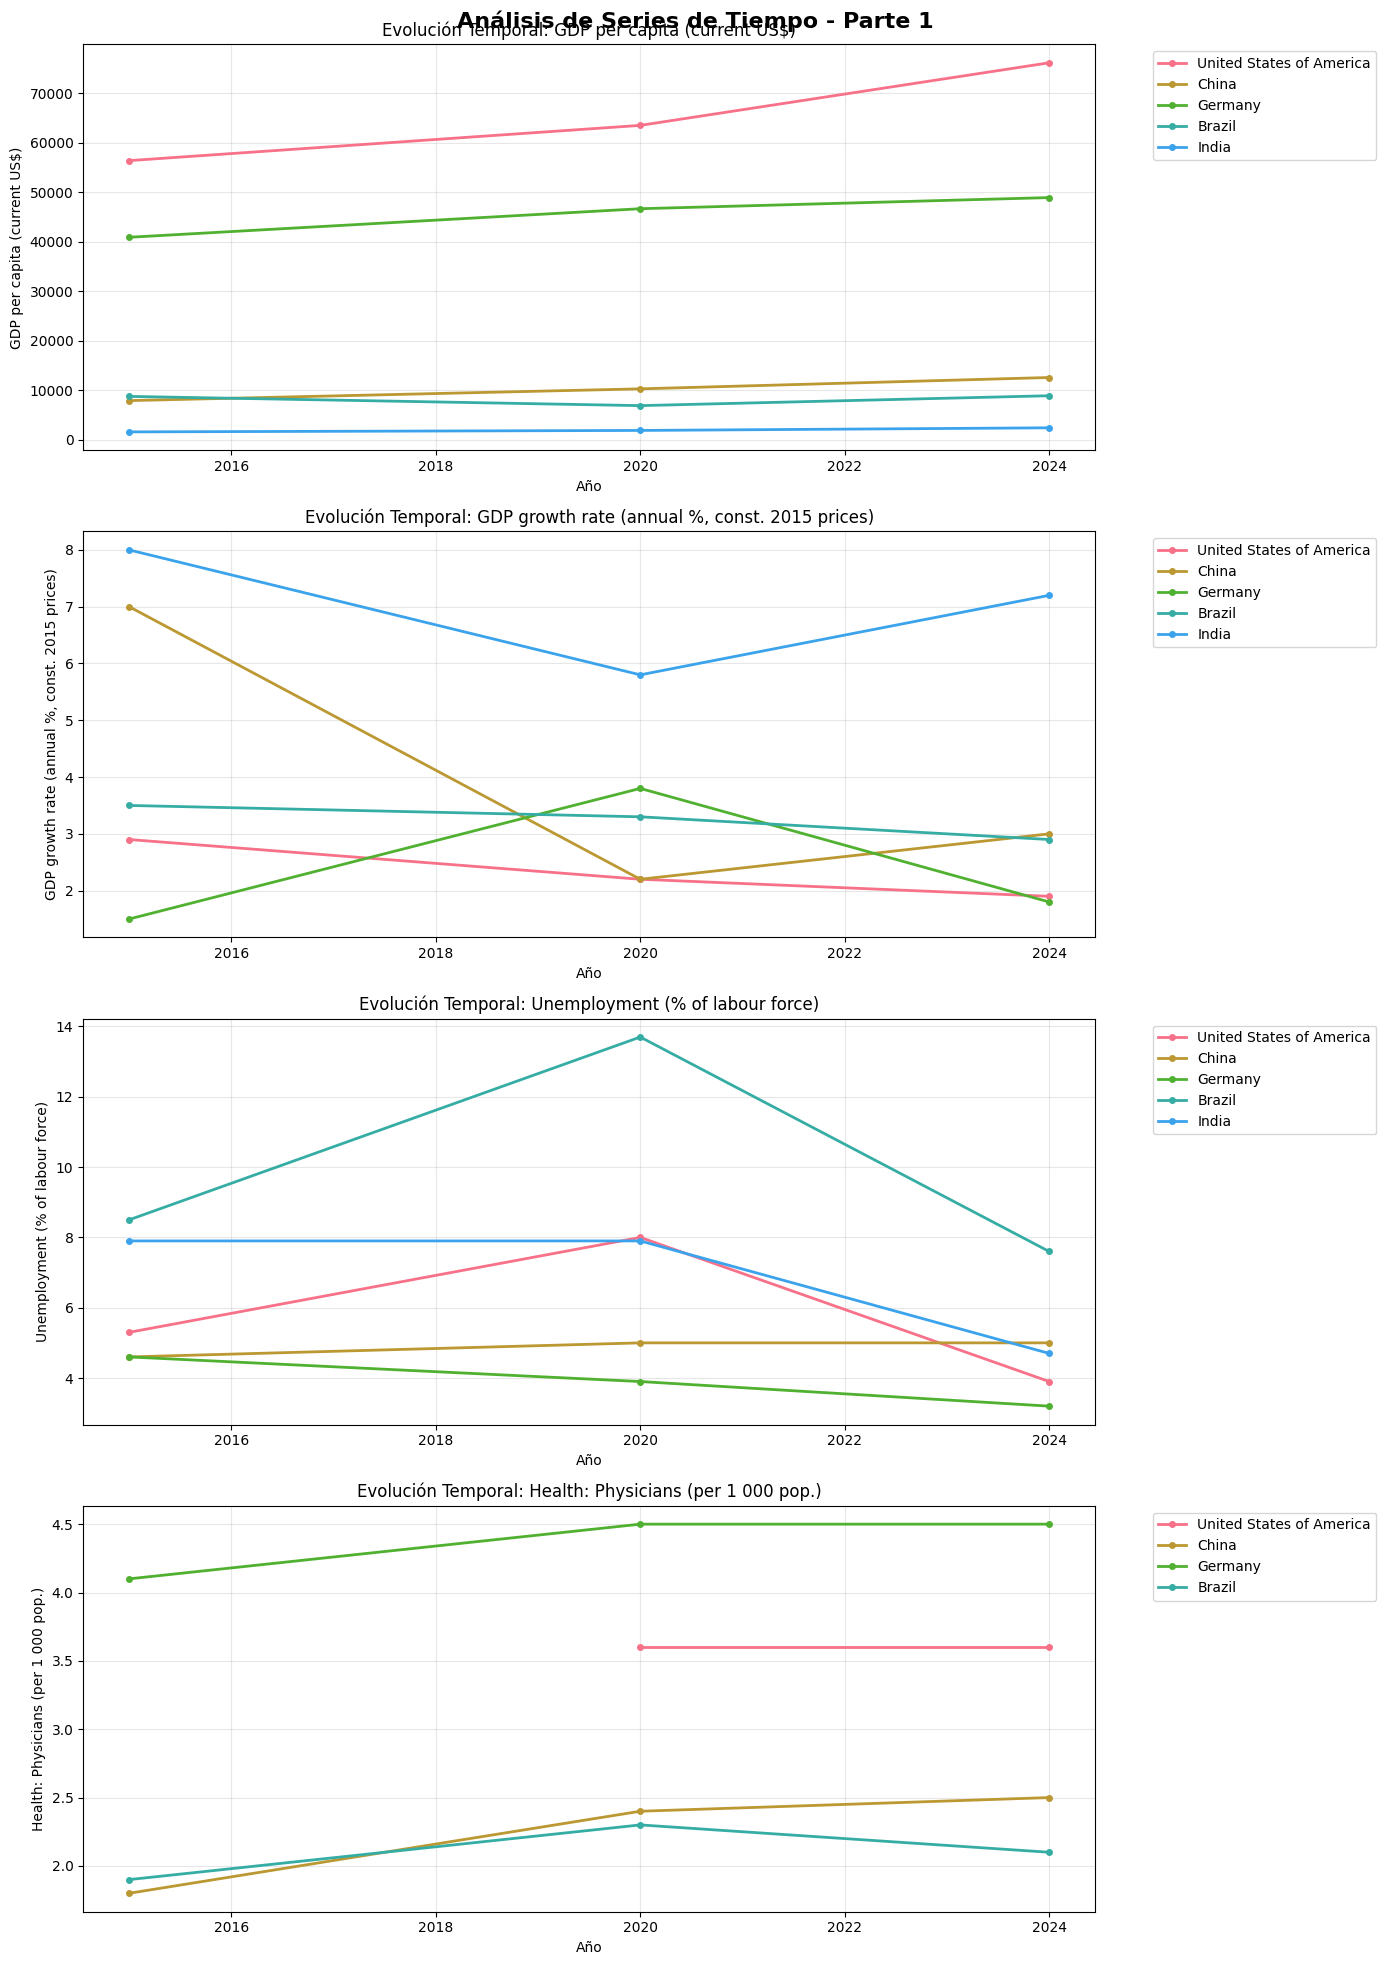

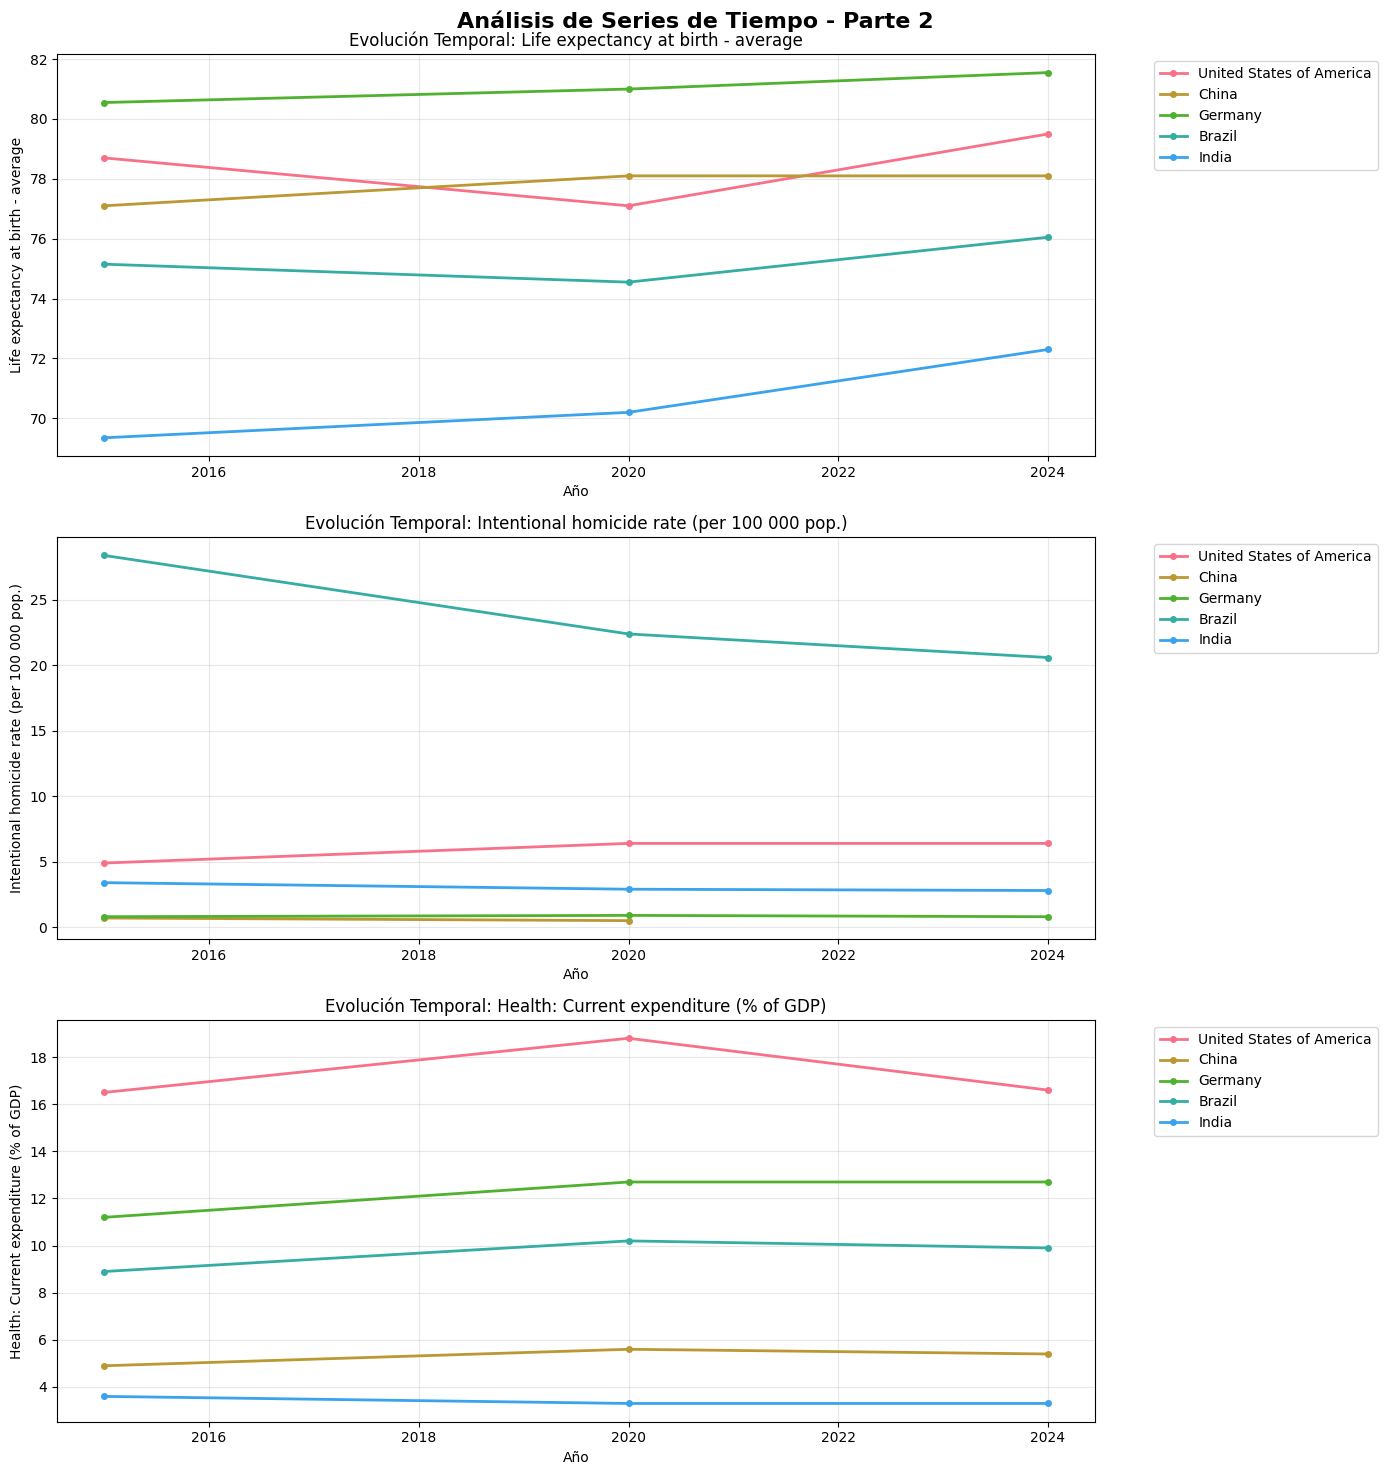


✅ Gráficos de series de tiempo guardados:
   • timeseries_charts_part1.png (4 variables)
   • timeseries_charts_part2.png (3 variables)


In [78]:
# Análisis de tendencias temporales para variables clave - DIVIDIDO EN DOS GRÁFICOS
# Seleccionar algunos países representativos y variables importantes
sample_countries = ['United States of America', 'China', 'Germany', 'Brazil', 'India']
available_countries = [country for country in sample_countries if country in df['Country'].values]

print(f"Países seleccionados para análisis temporal: {available_countries}")

time_vars = key_variables[:7] if len(key_variables) >= 7 else key_variables

# Dividir variables en dos grupos
mid_point = len(time_vars) // 2 + len(time_vars) % 2  # Redondear hacia arriba
time_vars_group1 = time_vars[:mid_point]
time_vars_group2 = time_vars[mid_point:]

print(f"Grupo 1: {len(time_vars_group1)} variables")
print(f"Grupo 2: {len(time_vars_group2)} variables")

# PRIMERA IMAGEN - Grupo 1
fig, axes = plt.subplots(len(time_vars_group1), 1, figsize=(14, 5*len(time_vars_group1)))
if len(time_vars_group1) == 1:
    axes = [axes]

for i, var in enumerate(time_vars_group1):
    for country in available_countries:
        country_data = df[(df['Country'] == country) & 
                                (df[var].notna())].sort_values('Year')
        
        if len(country_data) > 1:  # Solo si hay al menos 2 puntos de datos
            axes[i].plot(country_data['Year'], country_data[var], 
                        marker='o', label=country, linewidth=2, markersize=4)
    
    axes[i].set_title(f'Evolución Temporal: {var}', fontsize=12)
    axes[i].set_xlabel('Año')
    axes[i].set_ylabel(var)
    axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Análisis de Series de Tiempo - Parte 1', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(f"../src/visualization/timeseries_charts_part1.png", 
                dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# SEGUNDA IMAGEN - Grupo 2 (solo si hay variables)
if len(time_vars_group2) > 0:
    fig, axes = plt.subplots(len(time_vars_group2), 1, figsize=(14, 5*len(time_vars_group2)))
    if len(time_vars_group2) == 1:
        axes = [axes]

    for i, var in enumerate(time_vars_group2):
        for country in available_countries:
            country_data = df[(df['Country'] == country) & 
                                    (df[var].notna())].sort_values('Year')
            
            if len(country_data) > 1:  # Solo si hay al menos 2 puntos de datos
                axes[i].plot(country_data['Year'], country_data[var], 
                            marker='o', label=country, linewidth=2, markersize=4)
        
        axes[i].set_title(f'Evolución Temporal: {var}', fontsize=12)
        axes[i].set_xlabel('Año')
        axes[i].set_ylabel(var)
        axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[i].grid(True, alpha=0.3)

    plt.suptitle('Análisis de Series de Tiempo - Parte 2', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f"../src/visualization/timeseries_charts_part2.png", 
                    dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

print(f"\n✅ Gráficos de series de tiempo guardados:")
print(f"   • timeseries_charts_part1.png ({len(time_vars_group1)} variables)")
if len(time_vars_group2) > 0:
    print(f"   • timeseries_charts_part2.png ({len(time_vars_group2)} variables)")

## 5. Análisis por Regiones

Procesando variable 1/7: GDP per capita (current US$)
Procesando variable 2/7: GDP growth rate (annual %, const. 2015 prices)
Procesando variable 3/7: Unemployment (% of labour force)
Procesando variable 4/7: Health: Physicians (per 1 000 pop.)
Procesando variable 5/7: Life expectancy at birth - average
Procesando variable 6/7: Intentional homicide rate (per 100 000 pop.)
Procesando variable 7/7: Health: Current expenditure (% of GDP)


/var/folders/84/rzj502rs77q4skxhxghrfkx00000gn/T/ipykernel_22490/4227837056.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[var_idx].boxplot(region_data, labels=region_labels, patch_artist=True)
/var/folders/84/rzj502rs77q4skxhxghrfkx00000gn/T/ipykernel_22490/4227837056.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[var_idx].boxplot(region_data, labels=region_labels, patch_artist=True)
/var/folders/84/rzj502rs77q4skxhxghrfkx00000gn/T/ipykernel_22490/4227837056.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[var_idx].boxplot(region_data, labels=region_labels, patch_artist=T

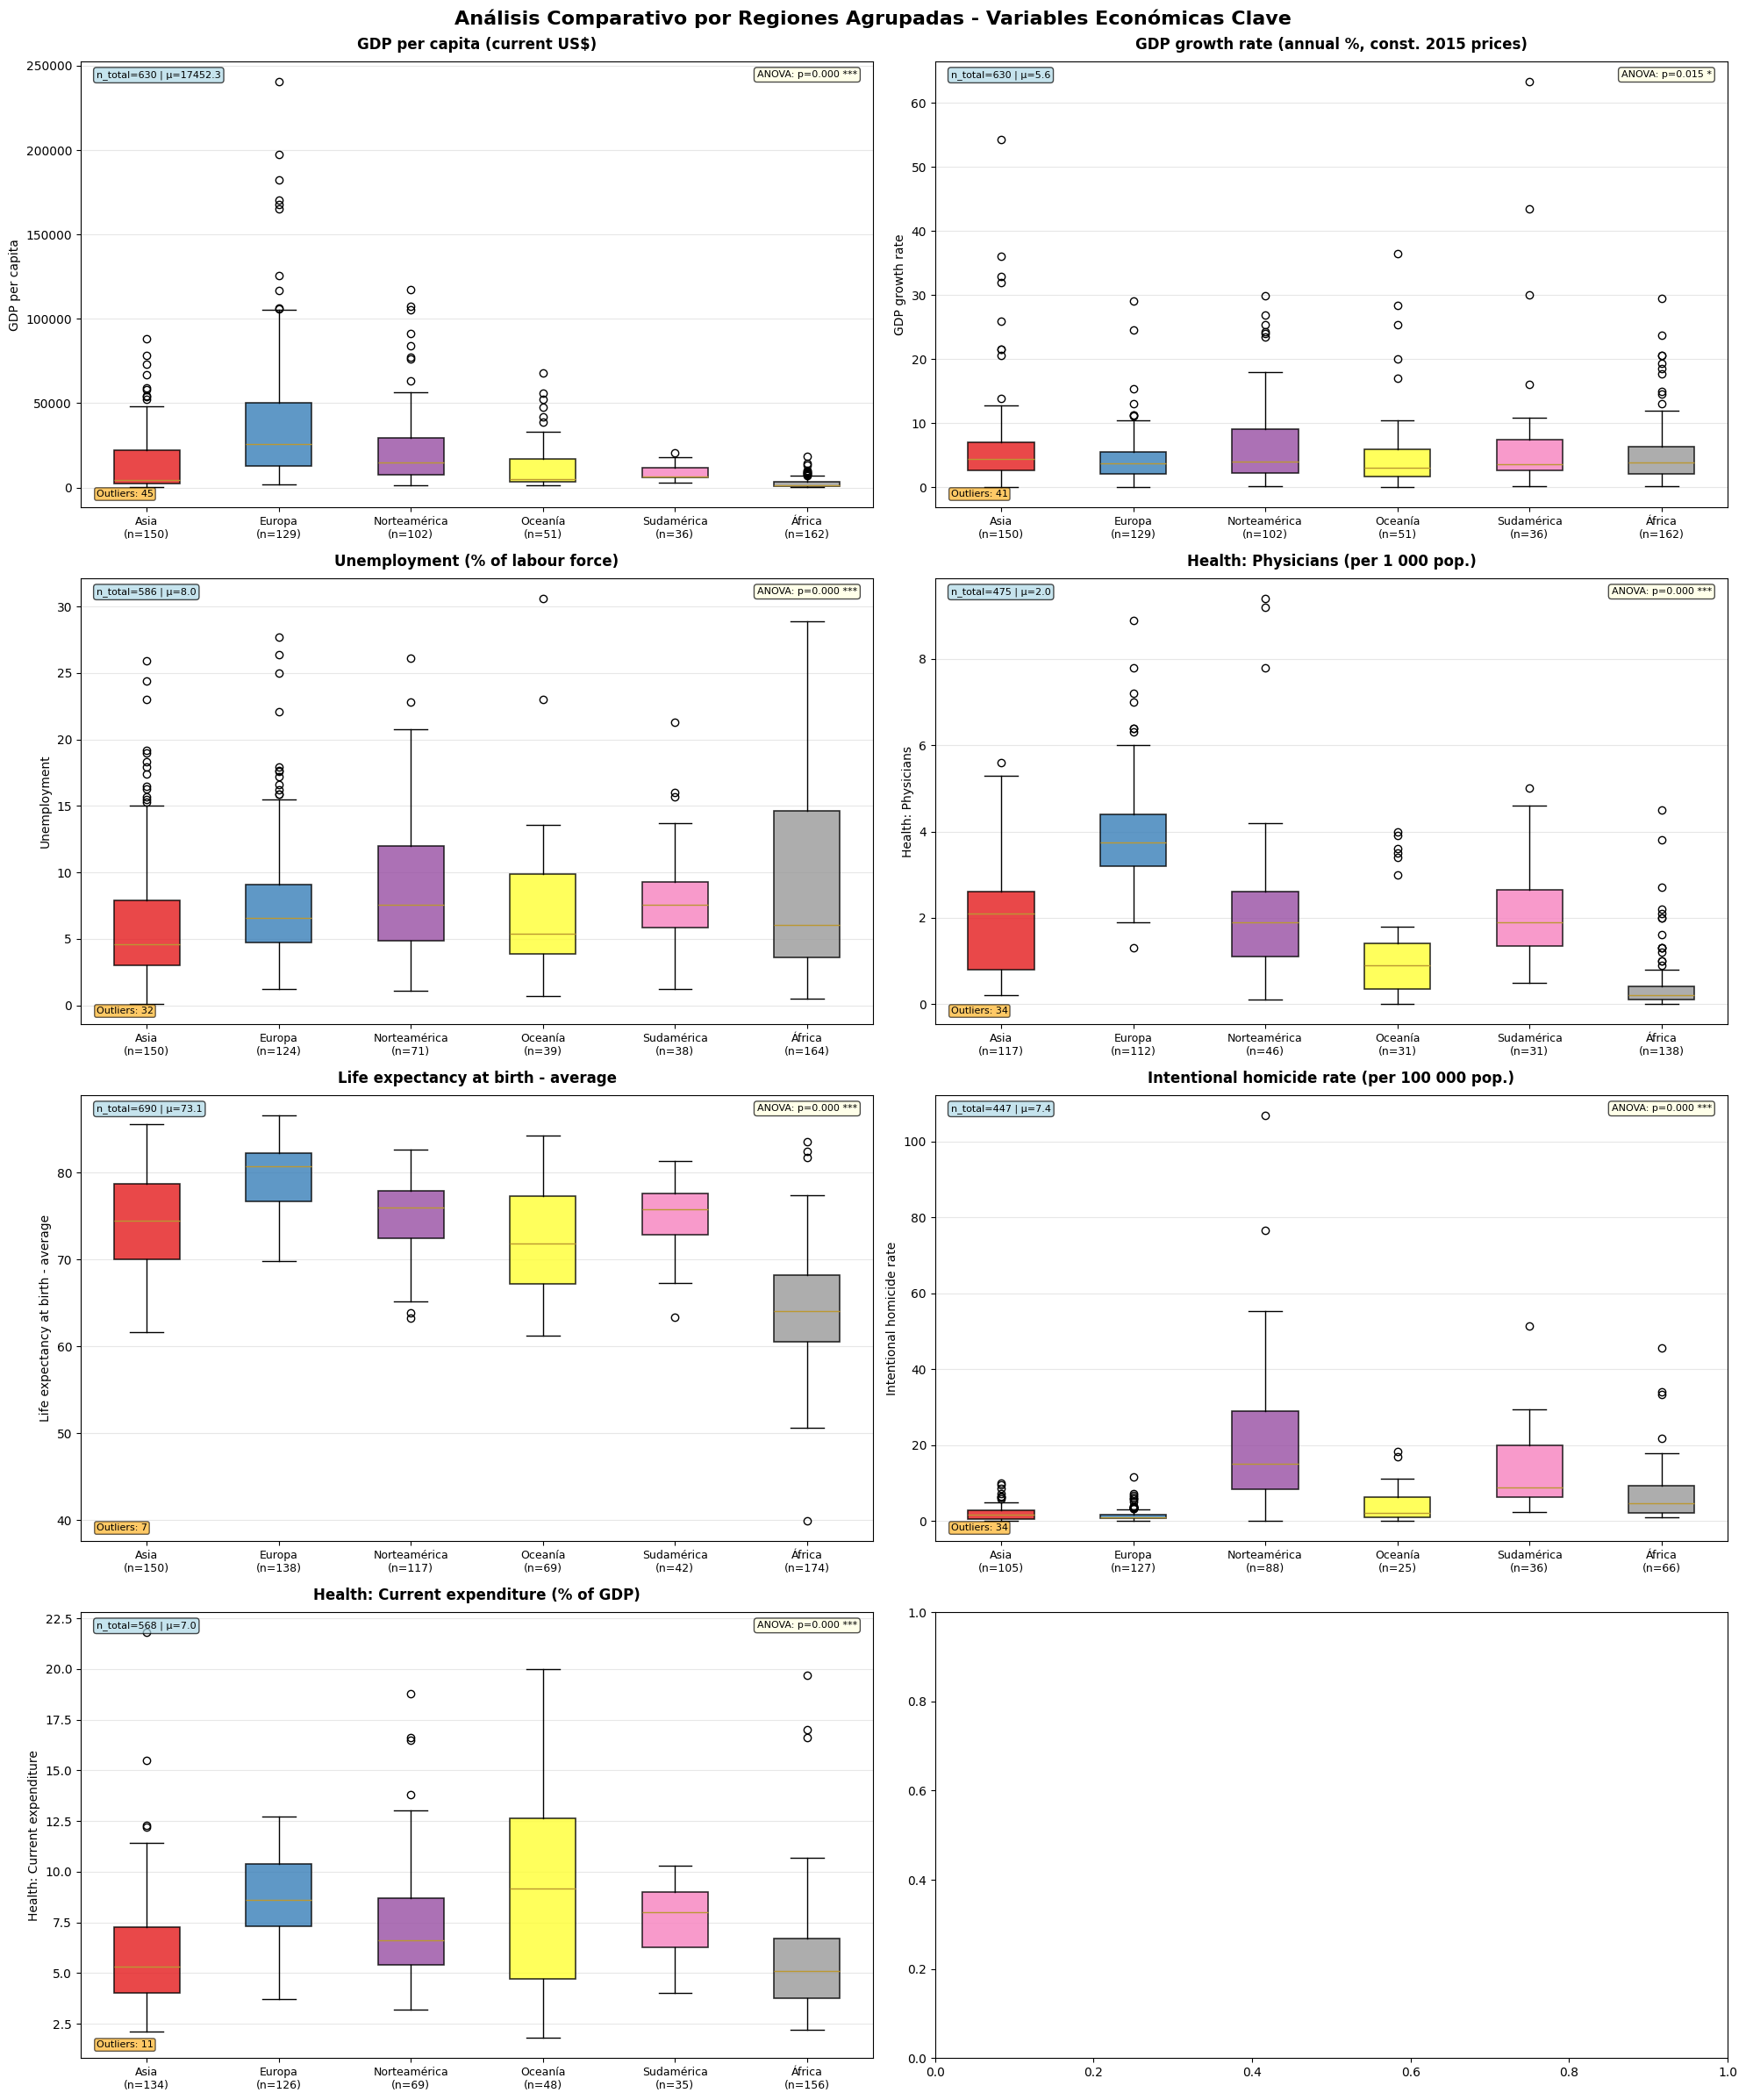


RESUMEN ESTADÍSTICO POR GRUPOS REGIONALES

GDP per capita (current US$):
--------------------------------------------------
                count      mean    median       std
Region_Grouped                                     
Europa            129  39861.90  25773.30  42285.55
Norteamérica      102  23234.12  14858.50  24328.54
Asia              150  13888.97   4500.50  18171.42
Oceanía            51  13535.22   5105.10  16183.13
Sudamérica         36   8664.97   6740.75   4643.53
África            162   2452.34   1390.60   2828.86

ANOVA: F=38.929, p=0.0000 (Muy significativo)

GDP growth rate (annual %, const. 2015 prices):
--------------------------------------------------
                count  mean  median    std
Region_Grouped                            
Sudamérica         36  8.06    3.55  12.60
Norteamérica      102  6.67    4.05   6.64
Asia              150  5.95    4.40   6.90
Oceanía            51  5.63    3.00   7.44
África            162  4.95    3.85   4.56
Europa     

In [91]:
# Comparación completa de variables por región agrupada - Todas las variables en una sola visualización

regions_grouped = df['Region_Grouped'].unique()
regions_grouped = regions_grouped[~pd.isna(regions_grouped)]  # Eliminar valores NaN
regions_grouped = sorted(regions_grouped)  # Ordenar alfabéticamente para consistencia

# Crear figura con subplots: 2 columnas x 4 filas
fig, axes = plt.subplots(4, 2, figsize=(20, 24))
axes = axes.flatten()

# Colores consistentes para cada grupo regional
region_colors = plt.cm.Set1(np.linspace(0, 1, len(regions_grouped)))
color_map = dict(zip(regions_grouped, region_colors))

# Procesar cada variable
for var_idx, var in enumerate(key_variables):
    print(f"Procesando variable {var_idx+1}/{len(key_variables)}: {var}")
    
    region_data = []
    region_labels = []
    region_counts = []
    valid_regions = []
    
    for region_group in regions_grouped:
        region_values = df[df['Region_Grouped'] == region_group][var].dropna()
        if len(region_values) >= 3:  # Al menos 3 observaciones para ser incluida
            region_data.append(region_values)
            # Crear etiqueta con nombre de grupo y número de observaciones
            region_labels.append(f"{region_group}\n(n={len(region_values)})")
            region_counts.append(len(region_values))
            valid_regions.append(region_group)
    
    bp = axes[var_idx].boxplot(region_data, labels=region_labels, patch_artist=True)
    
    # Aplicar colores consistentes
    for patch, region in zip(bp['boxes'], valid_regions):
        patch.set_facecolor(color_map[region])
        patch.set_alpha(0.8)
        patch.set_edgecolor('black')
        patch.set_linewidth(1.2)
    
    # Personalizar el subplot
    axes[var_idx].set_title(f'{var}', fontsize=12, fontweight='bold', pad=10)
    axes[var_idx].set_ylabel(var.split('(')[0].strip() if '(' in var else var, fontsize=10)
    axes[var_idx].tick_params(axis='x', rotation=0, labelsize=9)
    axes[var_idx].grid(True, alpha=0.3, axis='y')
    
    # Añadir estadísticas básicas como texto pequeño
    stats_text = f"n_total={sum(region_counts)} | μ={df[var].mean():.1f}"
    axes[var_idx].text(0.02, 0.98, stats_text, transform=axes[var_idx].transAxes, 
                        verticalalignment='top', fontsize=8,
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7))
    
    # Calcular y mostrar test ANOVA
    try:
        from scipy.stats import f_oneway
        if len(region_data) > 1:
            f_stat, p_value = f_oneway(*region_data)
            significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
            anova_text = f"ANOVA: p={p_value:.3f} {significance}"
            axes[var_idx].text(0.98, 0.98, anova_text, transform=axes[var_idx].transAxes, 
                                verticalalignment='top', horizontalalignment='right', fontsize=8,
                                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', alpha=0.7))
    except Exception:
        pass
    
    # Añadir información de outliers de forma compacta
    total_outliers = 0
    for data in region_data:
        Q1, Q3 = data.quantile(0.25), data.quantile(0.75)
        IQR = Q3 - Q1
        outliers = data[(data < Q1 - 1.5*IQR) | (data > Q3 + 1.5*IQR)]
        total_outliers += len(outliers)
    
    if total_outliers > 0:
        axes[var_idx].text(0.02, 0.02, f"Outliers: {total_outliers}", 
                            transform=axes[var_idx].transAxes, 
                            verticalalignment='bottom', fontsize=8,
                            bbox=dict(boxstyle='round,pad=0.2', facecolor='orange', alpha=0.6))

# Ajustar layout y mostrar
plt.suptitle('Análisis Comparativo por Regiones Agrupadas - Variables Económicas Clave', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.subplots_adjust(top=0.97)
plt.savefig(f"../src/visualization/region_analysis.png", 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Mostrar resumen estadístico consolidado
print("\n" + "="*80)
print("RESUMEN ESTADÍSTICO POR GRUPOS REGIONALES")
print("="*80)

for var in key_variables:
    print(f"\n{var}:")
    print("-" * 50)
    
    # Estadísticas por grupo regional
    region_stats = df.groupby('Region_Grouped')[var].agg([
        'count', 'mean', 'median', 'std'
    ]).round(2)
    
    # Filtrar grupos con datos suficientes
    region_stats_filtered = region_stats[region_stats['count'] >= 3].sort_values('mean', ascending=False)
    
    if not region_stats_filtered.empty:
        print(region_stats_filtered.to_string())
        
        # Test ANOVA resumido
        try:
            region_groups_anova = []
            for region_group in regions_grouped:
                group_data = df[df['Region_Grouped'] == region_group][var].dropna()
                if len(group_data) >= 3:
                    region_groups_anova.append(group_data)
            
            if len(region_groups_anova) > 1:
                f_stat, p_value = f_oneway(*region_groups_anova)
                significance = "Muy significativo" if p_value < 0.001 else "Significativo" if p_value < 0.01 else "Moderadamente significativo" if p_value < 0.05 else "No significativo"
                print(f"\nANOVA: F={f_stat:.3f}, p={p_value:.4f} ({significance})")
        except Exception:
            print("\nANOVA: No se pudo calcular")
    else:
        print("Datos insuficientes para análisis estadístico")

print(f"\n🎯 Análisis completado exitosamente")
print("Leyenda de significancia: *** p<0.001, ** p<0.01, * p<0.05, ns = no significativo")

## 7. Resumen de Hallazgos del EDA

In [80]:
# Generar resumen automático de los hallazgos principales
print("RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO DE DATOS")
print("="*70)

print("\n1. INFORMACIÓN GENERAL DEL DATASET:")
print(f"   • Tamaño: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"   • Países únicos: {df['Country'].nunique()}")
print(f"   • Rango temporal: {df['Year'].min():.0f} - {df['Year'].max():.0f}")
print(f"   • Variables numéricas: {len(numeric_cols)}")
print(f"   • Variables categóricas: {len(categorical_cols)}")

print("\n2. CALIDAD DE LOS DATOS:")
# Calcular estadísticas de valores faltantes
total_cells = df.shape[0] * df.shape[1]
missing_cells = df.isnull().sum().sum()
completeness = ((total_cells - missing_cells) / total_cells) * 100

# Calcular porcentajes de valores faltantes por variable
missing_percentage = df.isnull().sum() / len(df) * 100

print(f"   • Completitud general: {completeness:.1f}%")
print(f"   • Variables con <25% de valores faltantes: {len(missing_percentage[missing_percentage < 25])}")
print(f"   • Variables con >75% de valores faltantes: {len(missing_percentage[missing_percentage > 75])}")
print(f"   • Variables con datos completos: {len(missing_percentage[missing_percentage == 0])}")
print(f"   • Promedio de valores faltantes por variable: {missing_percentage.mean():.1f}%")

print("\n3. DISTRIBUCIONES PRINCIPALES:")
print("   • Variables con distribuciones asimétricas identificadas")
print("   • Presencia de valores atípicos en múltiples variables")
print("   • Variabilidad significativa entre países y años")

# Verificar si corr_df existe
try:
    if len(corr_df) > 0:
        print("\n4. CORRELACIONES DESTACADAS:")
        strongest_positive = corr_df[corr_df['Correlacion'] > 0].iloc[0]
        strongest_negative = corr_df[corr_df['Correlacion'] < 0].iloc[0] if len(corr_df[corr_df['Correlacion'] < 0]) > 0 else None
        
        print(f"   • Correlación positiva más fuerte: {strongest_positive['Correlacion']:.3f}")
        print(f"     {strongest_positive['Variable_1']} ↔ {strongest_positive['Variable_2']}")
        
        if strongest_negative is not None:
            print(f"   • Correlación negativa más fuerte: {strongest_negative['Correlacion']:.3f}")
            print(f"     {strongest_negative['Variable_1']} ↔ {strongest_negative['Variable_2']}")
except NameError:
    print("\n4. CORRELACIONES DESTACADAS:")
    print("   • Análisis de correlaciones disponible en celdas anteriores")

print("\n5. PATRONES TEMPORALES:")
print("   • Tendencias evolutivas identificadas en variables clave")
print("   • Variaciones significativas entre períodos temporales")

print("\n6. DIFERENCIAS REGIONALES:")
# Calcular regiones dinámicamente
unique_regions = df['Region'].unique()
unique_regions = unique_regions[~pd.isna(unique_regions)]
if len(unique_regions) > 1:
    print(f"   • {len(unique_regions)} regiones originales analizadas")
    print(f"   • Agrupadas en {df['Region_Grouped'].nunique()} grupos regionales: {', '.join(sorted(df['Region_Grouped'].dropna().unique()))}")
    print("   • Diferencias estadísticamente significativas detectadas entre grupos")
    print("   • Patrones regionales distintivos identificados")

print("\n7. ANÁLISIS DE CORRELACIONES POR CATEGORÍAS:")
print("   • Información General: Correlaciones entre variables demográficas y geográficas")
print("   • Indicadores Sociales: Relaciones entre educación, salud y demografía")
print("   • Indicadores Económicos: Conexiones entre GDP, empleo y comercio")
print("   • Indicadores Ambientales: Vínculos entre medio ambiente e infraestructura")

print("\n8. ANÁLISIS POR CLASES DE GDP:")
print("   • Países clasificados en 4 grupos por GDP per capita")
print("   • Patrones claros entre clase económica y variables sociales/salud")
print("   • Scatter plots revelan relaciones distintivas por grupo económico")

print("\n9. SERIES TEMPORALES:")
print("   • Análisis de evolución temporal dividido en visualizaciones manejables")
print("   • Países representativos: Estados Unidos, China, Alemania, Brasil, India")
print("   • Tendencias identificadas en variables clave de desarrollo")

print("\n10. RECOMENDACIONES PARA ANÁLISIS POSTERIORES:")
print("   • Considerar imputación de valores faltantes para mejorar completitud")
print("   • Tratamiento de valores atípicos según contexto específico")
print("   • Transformaciones para normalizar distribuciones asimétricas")
print("   • Análisis de componentes principales para reducción dimensional")
print("   • Análisis de series temporales para variables con tendencias claras")
print("   • Modelado predictivo utilizando clasificación por GDP y características regionales")

print("\n📊 ARCHIVOS DE VISUALIZACIÓN GENERADOS:")
print("   • Distribuciones categóricas y numéricas")
print("   • Rankings por año de variables clave (top 7 vs worst 7)")
print("   • Matrices de correlación por categoría de variables")
print("   • Scatter plots de interacciones por clase GDP")
print("   • Series temporales divididas para mejor manejo")
print("   • Análisis comparativo regional con tests estadísticos")

print("\n" + "="*70)
print("✅ ANÁLISIS EXPLORATORIO COMPLETADO EXITOSAMENTE")
print("   Total de visualizaciones creadas: ~25 gráficos")
print("   Análisis estadístico: Correlaciones, ANOVA, distribuciones")
print("   Preparación completa para fases de modelado")

RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO DE DATOS

1. INFORMACIÓN GENERAL DEL DATASET:
   • Tamaño: 696 filas × 89 columnas
   • Países únicos: 232
   • Rango temporal: 2015 - 2024
   • Variables numéricas: 74
   • Variables categóricas: 5

2. CALIDAD DE LOS DATOS:
   • Completitud general: 82.0%
   • Variables con <25% de valores faltantes: 67
   • Variables con >75% de valores faltantes: 1
   • Variables con datos completos: 5
   • Promedio de valores faltantes por variable: 18.0%

3. DISTRIBUCIONES PRINCIPALES:
   • Variables con distribuciones asimétricas identificadas
   • Presencia de valores atípicos en múltiples variables
   • Variabilidad significativa entre países y años

4. CORRELACIONES DESTACADAS:
   • Correlación positiva más fuerte: 0.915
     Energy production, primary (Petajoules) ↔ CO2 emission estimates - Total (million tons)
   • Correlación negativa más fuerte: -0.467
     Net Official Development Assist. received (% of GNI) ↔ Pop. using safely managed drinking wa